In [1]:
!pip install transformers
!pip install sentencepiece
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

     |████████████████████████████████| 2.9 MB 5.5 MB/s 
     |████████████████████████████████| 3.3 MB 43.6 MB/s 
     |████████████████████████████████| 596 kB 48.0 MB/s 
     |████████████████████████████████| 895 kB 44.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 5.3 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


GDrive와 코랩을 연동합니다.  
path에 경로를 지정해주도록 하겠습니다.

In [3]:
path = "gdrive/My Drive"

In [4]:
#os.listdir("gdrive/My Drive/Colab Notebooks/청와대")

train 데이터와 test 데이터를 pandas dataframe 형식으로 불러오도록 하겠습니다.

In [ ]:
#### 여기부터 우리꺼

In [5]:
data = pd.read_csv('/content/educate_data.csv', encoding = 'cp949')

In [6]:
data.head()

,Column1,Column2,Column3,Column4
0,NaN,lyr_notEng_notBlack,0,label
1,0.0,여 서서 널 다려 걸어오는 너는 왜 뭐 그리 예쁜지 괜히 불안해지지 나 무심한 척해...,순수,1.0
2,1.0,또렷해져 모두 잊어버리려 지워버리려 할수록 가득해져가는 너의 빈자리 지나온 날들 너...,편안,2.0
3,4.0,너를 처음 만났던 날 밝게 웃던 네게 말 걸었던 날 우리가 된 그 여름밤 가만히 내...,편안,2.0
4,7.0,진하게 화장을 하고 예쁘게 머리를 하고 오늘도 집을 나서는 넌 예뻐 높은 구두를 신...,아찔,3.0


In [7]:
data.drop('Column3', axis = 1, inplace = True)
data.drop(0, axis = 0, inplace = True)

In [8]:
data.columns=['index','data','category']

In [9]:
data.head()

,index,data,category
1,0.0,여 서서 널 다려 걸어오는 너는 왜 뭐 그리 예쁜지 괜히 불안해지지 나 무심한 척해...,1.0
2,1.0,또렷해져 모두 잊어버리려 지워버리려 할수록 가득해져가는 너의 빈자리 지나온 날들 너...,2.0
3,4.0,너를 처음 만났던 날 밝게 웃던 네게 말 걸었던 날 우리가 된 그 여름밤 가만히 내...,2.0
4,7.0,진하게 화장을 하고 예쁘게 머리를 하고 오늘도 집을 나서는 넌 예뻐 높은 구두를 신...,3.0
5,8.0,바래다주고 오는 길 또 그새 보고 싶어서 내게 전화를 했어 나 참 안이랬었는데 너를...,1.0


In [10]:
data = data[['index','category','data']]

In [11]:
data['category']

1       1.0
2       2.0
3       2.0
4       3.0
5       1.0
       ... 
6523    0.0
6524    0.0
6525    0.0
6526    0.0
6527    0.0
Name: category, Length: 6527, dtype: object

In [12]:
data['category'] = pd.to_numeric(data['category'])
data['index'] = pd.to_numeric(data['index'])

In [13]:
data['category'] = data['category'].astype('int')
data['index'] = data['index'].astype('int')

In [14]:
train = data

In [15]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.2,random_state=7) 

In [16]:
#submission = pd.read_csv('/content/data_dic.csv')

In [17]:
#submission.drop(['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'], axis = 1, inplace = True)

In [18]:
#submission.drop(['lyr_notEng','lyr_notEng_notBlack'], axis = 1, inplace = True)

In [19]:
#test = submission[['index','lyric']]

In [20]:
#test.columns=['index', 'data']

train 데이터와 test 데이터를 전처리하도록 하겠습니다.  
특수 문자들을 제거하고, 띄어쓰기가 많은 부분만 간단히 전처리 해주도록 하겠습니다.

In [21]:
train = train.copy()
test = test.copy()

In [22]:
train['data'] = train['data'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\\n\t]+', " ", regex=True)
test['data'] = test['data'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', " ", regex=True)
train['data'] = train['data'].str.replace(r'\t+', " ", regex=True)
test['data'] = test['data'].str.replace(r'\t+', " ", regex=True)
train['data'] = train['data'].str.replace(r'[\\n]+'," ", regex=True)
test['data'] = test['data'].str.replace(r'[\\n]+'," ", regex=True)

In [23]:
train = train.reset_index()
test = test.reset_index()

train.drop('level_0', axis= 1, inplace=True)
test.drop('level_0', axis= 1, inplace=True)

In [24]:
# train.drop('level_0', axis= 1, inplace=True)
# test.drop('level_0', axis= 1, inplace=True)

전처리가 어느정도 된 것을 확인하실 수 있겠습니다.

In [ ]:
#### 여기까지####

## 토크나이징, 모델만들고 학습해보자 (실패)

토크나이저를 불러옵니다. kobert를 활용하도록 하겠습니다.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

Downloading:   0%|          | 0.00/972k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

train 데이터를 버트 인풋에 맞게 변경해줍니다.  
즉, 문장을 버트 인풋에 맞게 토큰, 마스크, 세그먼트로 변환해 주겠습니다.

In [26]:
def convert_data(data_df):
    global tokenizer
    
    SEQ_LEN = 198 #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_df)), position=0, leave=True):
        # token : 문장을 토큰화함
        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation = True, padding='max_length')
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

SEQ_LEN = 198
BATCH_SIZE = 20
# 긍부정 문장을 포함하고 있는 칼럼
DATA_COLUMN = "data"
# 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
LABEL_COLUMN = "category"



In [36]:
# train 데이터를 버트 인풋에 맞게 변환
train_x, train_y = load_data(train)
test_x, test_y = load_data(test)

100%|██████████| 6527/6527 [00:08<00:00, 738.93it/s]


In [ ]:
!pip install tensorflow_addons
import tensorflow_addons as tfa

     |████████████████████████████████| 1.1 MB 5.3 MB/s 


In [ ]:
def create_sentiment_bert():
  # 버트 pretrained 모델 로드
  model = TFBertModel.from_pretrained("bert-base-multilingual-cased", from_pt=True)
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

  bert_outputs = bert_outputs[1]
  sentiment_first = tf.keras.layers.Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02))(bert_outputs)
  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
  # 옵티마이저는 간단하게 Adam 옵티마이저 활용
  sentiment_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['sparse_categorical_accuracy'])
  return sentiment_model

## 훈련 및 성능 검증

In [ ]:
#0912 - 

In [ ]:
path = "gdrive/My Drive"


In [ ]:
# bert colab gpu 가즈아!
sentiment_model = create_sentiment_bert()
sentiment_model.fit(train_x, train_y, epochs=3, shuffle=True, batch_size=12,
                   validation_data = (test_x,test_y))
sentiment_model.save_weights(os.path.join(path,"sentiment_model.h5"))


Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

Epoch 1/3
544/544 [==============================] - 545s 968ms/step - loss: nan - sparse_categorical_accuracy: 0.5995
Epoch 2/3
544/544 [==============================] - 527s 968ms/step - loss: nan - sparse_categorical_accuracy: 0.6000
Epoch 3/3
544/544 [==============================] - 526s 968ms/step - loss: nan - sparse_categorical_accuracy: 0.6000


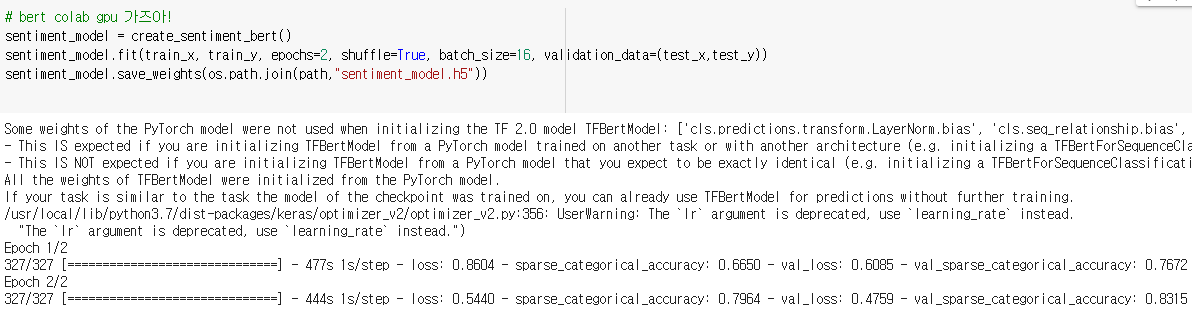

In [6]:
# 위에거는 잘못돌렸던거고 수정 후 돌렸을때

!pip install IPython 
from IPython.display import Image
Image('bert.png')

#### 이것 저것 바꿔줘봐도 이 모델로는 정확도 83%가 최선

NameError: name 'img' is not defined

우리가 훈련한 버트 모델을 적용하기 위해, Test 데이터를 버트 인풋에 맞게 변환하겠습니다.

In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []
    
    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]
SEQ_LEN = 198
DATA_COLUMN = 'data'
# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

In [ ]:
#test.drop('level_0', axis = 1, inplace= True)

In [35]:
test_set = predict_load_data(test)

NameError: ignored

test 데이터를 BERT 모형을 활용해서 카테고리(0:인권/성평등, 1:문화/예술/체육/언론, 2: 육아/교육)를 예측한 후 Dacon에 파일을 제출해 보도록 하겠습니다.  
먼저 "sample_submission.csv"라는 제출 파일을 로드하도록 하겠습니다.

In [ ]:
#submission = pd.read_csv(os.path.join(path,"sample_submission.csv"))
#submission = test[['index','category']]

In [ ]:
import shutil
if "bert" not in os.listdir():
  os.makedirs("bert")
else:
  pass

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree(path, "bert")

In [ ]:
import sys
mod = sys.modules[__name__]
#strategy = tf.distribute.experimental.TPUStrategy(resolver)
# # TPU를 활용하기 위해 context로 묶어주기
# with strategy.scope():
#   sentiment_model = create_sentiment_bert()
  
#   sentiment_model.load_weights(os.path.join("bert", "sentiment_model.h5"))
#   setattr(mod, 'model', sentiment_model)
#   setattr(mod, 'pred_', sentiment_model.predict(test_set, batch_size=1))

In [ ]:
path = "gdrive/MyDrive"

In [ ]:
sentiment_model = create_sentiment_bert()
sentiment_model.load_weights('/content/gdrive/MyDrive/sentiment_model.h5')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

In [ ]:
# 만약 TPU를 사용하지 않는다면
sentiment_model = create_sentiment_bert()
  
sentiment_model.load_weights('/content/gdrive/MyDrive/sentiment_model.h5')
setattr(mod, 'model', sentiment_model)
setattr(mod, 'pred_', sentiment_model.predict(test_set, batch_size=1))

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already

버트 모형에서 예측 결과를 평균해주는 함수를 정의합니다.

In [ ]:
def mean_answer_label(*preds):
  preds_sum = np.zeros(preds[0].shape[0])
  for pred in preds:
    preds_sum += np.argmax(pred, axis=-1)
  return np.round(preds_sum/len(preds), 0).astype(int)

In [ ]:
submission['category'] = mean_answer_label(pred_)

In [ ]:
#submission.to_csv(os.path.join(path, "제출.csv"), index=False)

## 버트 모델 다른걸로 학습해보자..

### 여기서는 SKT에서 나온 KOBERT 사용

In [74]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data,test_size=0.2,random_state=7) 

In [76]:
train = train.reset_index()
test = test.reset_index()

train.drop('level_0', axis= 1, inplace=True)
test.drop('level_0', axis= 1, inplace=True)

In [77]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 198,
    "monologg/kobert-lm": 198,
    "monologg/distilkobert": 198
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def get_vocab(self):
        return dict(self.token2idx, **self.added_tokens_encoder)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A KoBERT sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A KoBERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [28]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

Downloading:   0%|          | 0.00/363k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/76.0k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'KoBertTokenizer'.


In [78]:
def convert_data(data_df):
    global tokenizer
    
    SEQ_LEN = 198 #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_df))):
        # token : 문장을 토큰화함
        token = tokenizer.encode(data_df[DATA_COLUMN][i], truncation=True, padding='max_length', max_length=SEQ_LEN)
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

SEQ_LEN = 198
BATCH_SIZE = 32
# 긍부정 문장을 포함하고 있는 칼럼
DATA_COLUMN = "data"
# 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
LABEL_COLUMN = "category"

# train 데이터를 버트 인풋에 맞게 변환
train_x, train_y = load_data(train)

100%|██████████| 5221/5221 [00:07<00:00, 717.34it/s]


In [79]:
test_x, test_y = load_data(test)

100%|██████████| 1306/1306 [00:01<00:00, 705.05it/s]


In [80]:
from keras.preprocessing import sequence
from keras.utils import np_utils
# 학습 데이터 크기 일정하게 지정

# 원핫 인코딩
train_y = np_utils.to_categorical(train_y) # one_hot으로 변형
test_y = np_utils.to_categorical(test_y) # one_hot으로 변형

In [53]:
model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
# 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
# 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [54]:
bert_outputs = bert_outputs[1]

In [81]:
# Rectified Adam 옵티마이저 사용
!pip install tensorflow_addons
import tensorflow_addons as tfa
# 총 batch size * 4 epoch = 2344 * 4
opt = tfa.optimizers.RectifiedAdam(lr=5.0e-5, total_steps = 2344*2, 
                                   warmup_proportion=0.1, min_lr=1e-5, 
                                   epsilon=1e-08, clipnorm=1.0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [82]:
sentiment_drop = tf.keras.layers.Dropout(0.5)(bert_outputs)
sentiment_first = tf.keras.layers.Dense(4, activation='softmax', 
                                        kernel_initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02))(sentiment_drop)
sentiment_model_2 = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
sentiment_model_2.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ['accuracy'])

In [83]:
sentiment_model_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 198)]        0                                            
__________________________________________________________________________________________________
input_masks (InputLayer)        [(None, 198)]        0                                            
__________________________________________________________________________________________________
input_segment (InputLayer)      [(None, 198)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 92186880    input_word_ids[0][0]             
                                                                 input_masks[0][0]          

In [84]:
sentiment_model_2.fit(train_x, train_y, epochs=2, shuffle=True, batch_size=16
                      ,validation_data=(test_x, test_y))

Epoch 1/2
327/327 [==============================] - 558s 1s/step - loss: 0.8241 - accuracy: 0.7462 - val_loss: 0.3609 - val_accuracy: 0.8982
Epoch 2/2
327/327 [==============================] - 486s 1s/step - loss: 0.3427 - accuracy: 0.8993 - val_loss: 0.3811 - val_accuracy: 0.8897


### 학습완료. 예측해서 저장까지 해보자

In [85]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []
    
    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, truncation=True, padding='max_length')
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

In [86]:
test_set = predict_load_data(test)

100%|██████████| 1306/1306 [00:01<00:00, 702.78it/s]


In [87]:
test_set

[array([[   2,  517,    0, ..., 1096, 7405,    3],
        [   2, 1434, 4891, ..., 1936, 3742,    3],
        [   2, 1457, 6983, ...,  517, 6425,    3],
        ...,
        [   2,  517, 6618, ..., 6198, 1434,    3],
        [   2, 2145, 5330, ..., 7096, 3093,    3],
        [   2, 3419, 7086, ..., 6116, 2643,    3]]),
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 0],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [88]:
preds = sentiment_model_2.predict(test_set)

In [89]:
preds

array([[0.25763553, 0.37310153, 0.309163  , 0.06009996],
       [0.03668962, 0.02267487, 0.9282099 , 0.01242563],
       [0.5003449 , 0.09307336, 0.37547114, 0.03111057],
       ...,
       [0.9680171 , 0.01434486, 0.01305549, 0.00458251],
       [0.9845259 , 0.00565412, 0.00634746, 0.00347244],
       [0.9835277 , 0.00528969, 0.0074909 , 0.00369175]], dtype=float32)

In [90]:
# 우리가 훈련한 모델을 F1 SCORE를 바탕으로 성능 측정
# F1 SCORE는 precision과 recall을 가중평균하여 계산합니다
# recall은 (모델이 TRUE라고 판정한 것의 숫자)/(전체 TRUE의 숫자)
# precision은 (진짜 TRUE) / (모델이 TRUE라고 판정한 것의 숫자)

In [92]:
test

,index,category,data
0,4446,1,쌩얼 화장 같은 건 안 해 눈이 부셔 광채 마치 오드리 햅번 요즘 길거릴 걷다 보면...
1,1171,2,내 품에 니가 처음 들어왔을 때 맑은 너의 눈망울 날 볼 때 새근대던 너의 숨소리 ...
2,4961,0,너와 만나며 하고 싶은 일 하나 둘 셋 넷 적어보니 너무 많아 하루 이틀 아니 일년...
3,5099,1,도통 잠이 오질 않아 대체 지금 몇 시인 걸까 여가 어딘지 또 내가 누군지 답 없는...
4,230,2,이미 내 눈빛이 말하잖아 너를 원하고 또 원한다고 우리의 속삭임은 붉은색 숫자가 붙...
...,...,...,...
1301,8894,0,그때 난 몰랐어 손 놓으면 끝나는 줄 알았어 사소한 잘못이 날 끝으로 떠밀었어 차라...
1302,6050,2,할 말이 있는 듯한 눈동자를 하고서 내 앞에 서 있는 너 내 앞에 서 있는 너 흐려...
1303,6276,0,솔직하게 말해줘 전부 다 설명해 매일 밤 너 뭐해 왜 또 연락이 안돼 피곤하단 핑계...
1304,10904,0,뭐가 그렇게 고민이 많은지 그녀가 좋으면 좋다고 말해봐 이미 사랑하고 있다는 것쯤 ...


In [94]:

from sklearn.metrics import classification_report
y_true = test['category']
y_true = np_utils.to_categorical(y_true) # one_hot으로 변형
# F1 Score 확인
print(classification_report(y_true, np.round(preds,0)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       784
           1       0.91      0.77      0.83       215
           2       0.89      0.73      0.80       209
           3       0.98      0.65      0.79        98

   micro avg       0.90      0.88      0.89      1306
   macro avg       0.92      0.78      0.84      1306
weighted avg       0.90      0.88      0.89      1306
 samples avg       0.88      0.88      0.88      1306



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [95]:
import logging
tf.get_logger().setLevel(logging.ERROR)

### 예측을 해보자!

In [171]:
# 예측을 해봅시다!
def sentence_convert_data(data):
    global tokenizer
    tokens, masks, segments = [], [], []
    token = tokenizer.encode(data, max_length=SEQ_LEN, truncation=True, padding='max_length')
    
    num_zeros = token.count(0) 
    mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros 
    segment = [0]*SEQ_LEN

    tokens.append(token)
    segments.append(segment)
    masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]

def movie_evaluation_predict(sentence):
    data_x = sentence_convert_data(sentence)
    predict = sentiment_model_2.predict(data_x)
    predict_value = np.ravel(predict)
    predict_answer = np.round(predict_value,0).tolist()
    
    print(predict_answer)

    if predict_answer[0] == 1.0:
      #print("슬픔가사입니다." )
      result = '슬픔'
    elif predict_answer[1] == 1.0:
      #print("행복가사입니다.")
      result = '행복'
    elif predict_answer[2] == 1.0:
      #print("편안한가사입니다.")
      result = '편안'
    elif predict_answer[3] == 1.0:
      #print("유혹가사입니다.")
      result = '유혹'
    else :
      result = '분류안됨'
    return result

In [172]:
test.loc[6,'data']

'아무런 계획 없이 오늘은 거릴 걸어 난 눈부신 아침 햇살 내 맘을 설레게 해 수 많은 사람들이 가득한 거릴 걸으며 수줍은 아이처럼 자꾸만 웃음이 나 매일 같은 날들이지만 너로 인해서 달라졌어 난 반복되는 하루하루가 여행 같이 설레여 너와 함께면 나는 어디라도 좋아 수줍는 하지만 보여주고 싶은 내 맘 너만 있으면 세상 어디라도 좋아 너의 그 환한 미소가 하늘이 준 선물 같아 널 만난 그날부터 난 점점 너를 닮아가 해맑은 웃음짓는 너의 그 미소까지 매일 같은 날들이지만 너로 인해서 달라졌어 난 반복되는 하루하루가 여행같이 설레여 너와 함께면 나는 어디라도 좋아 수줍는 하지만 보여주고 싶은 내 맘 너만 있으면 세상 어디라도 좋아 이미 넌 알고 있잖아 세상이 내게 준 선물 너란 걸 어제 같은 오늘이지만 내 맘 속에는 네가 있에 변해가고 있어 내 모습 하나부터 열까지 너와 함께면 나는 어디라도 좋아 수줍는 하지만 보여주고 싶은 내 맘 너만 있으면 이미 넌 알고 있잖아 세상이 내게 준 선물 함께면 나는 어디라도 좋아 있으면'

In [173]:
movie_evaluation_predict("쌩얼 화장 같은 건 안 해 눈이 부셔 광채 마치 오드리 햅번 요즘 길거릴 걷다 보면 가끔 화장도 안 한 여자들이 보여 반쯤 꾸며진 한 옷차림 난 저게 진짜 명품 같애 내가 더 만족스러워 가끔 한 고딩들에 어울리지 않는 화장이 포인트래 가끔 어디 한구석에 박아논 두 개 진실 혹은 거짓 자꾸 의심만 드네 누군간 화장이 예의래 이딴 사상이 만든 겉치레에 속 빈 배추에다 값을 요구하는 김치들 성공의 잣대는 고철 덩어리지 남의 시선 따윈 버려 얼굴에 몸매도 준수한데 뭘 바라지도 않어 니가 진짜야 쌩얼 화장 같은 건 안 해 눈이 부셔 광채 마치 오드리 햅번 피부에 뭘 발랐는지 광채가 나 여자가 봐도 부러운지 산책하다 마주친 여자들의 시선 단체관람 태양도 너만 비추네 그림 한 채 같아 오늘 산책처럼 도심 데이트에도 걍 진짜 편안하게 날 맞이해 줘 아무렇게나 입어도 이쁜데 괜히 한 번쯤은 혹하게 꾸며 주는 센스쟁이 난 사람 냄새에 더 환장해 에 눈치 못챌 얕은 화장에 명품 없이도 내겐 빛나 보이는 걸 딴 남자한테는 너무 높아 보이는 벽 아무래도 제대로 씌였네 뭘 해도 전부 내겐 귀엽네 난 골빈 놈들처럼 너가 연봉 얼마 벌든 관심 없어 돈보단 마음이야 뭐든 쌩얼 화장 같은 건 안 해 눈이 부셔 광채 마치 오드리 햅번 옷이 날개긴 해도 가끔이지 다 벗은 속은 그저 속빈 깡통이지 월급 반 이상에다 혹은 엄카지 그게 자랑인 듯 남한테 사치를 요구하지 넌 된장 발라먹은 걔들과는 달라 가끔은 또 환장하게 꾸밀 줄도 알어 남한테 과한 요구도 하지 않아 남자의 집안이나 연봉 따윈 신경 안 써 쌩얼 화장 같은 건 안 해 눈이 부셔 광채 마치 오드리 햅번 ")

[0.0, 0.0, 0.0, 0.0]


'분류안됨'

In [174]:
movie_evaluation_predict("""내 품에 니가 처음 들어왔을 때 맑은 너의 눈망울 날 볼 때 
새근대던 너의 숨소리 보드라운 핑크빛 젤리 내 발걸음에 맞춰서 매일 같이 걷던 너와 나 
가끔은 아직도 너의 냄새가 그리워 어딜 가도 항상 느껴졌던 신발을 벗으면 너가 달려 올 것만 같은데 
텅빈 공간 속 너무 고요하만 해 저 방문을 열고 나가면 너를 볼 수 있을까 항상 그 자리에 있었는데 
나만 보고 있었는데 저 방문을 열고 나가면 너를 볼 수 있을까 이젠 너를 볼 수 없지만 다시 본다면 
나를 반겨줘 아무것도 모르는 표정으로 나를 바라볼 때 너무 사랑스러워 이런 넘치는 행복함을 내게 
안겨줬는데 이제 너는 없네 너무 따뜻했던 너의 작은 심장 영원할 것 같던 너와 나의 만남 이제 아픔 
없는 곳으로 떠나 시간이 지난 뒤에 우리 다시 만나 가끔은 아직도 너의 냄새가 그리워 어딜 가도 항상 
느껴졌던 신발을 벗으면 너가 달려 올 것만 같은데 너가 아직도 내겐 살아 숨 쉬는데 저 방문을 열고 나가면 
너를 볼 수 있을까 항상 그 자리에 있었는데 나만 보고 있었는데 저 방문을 열고 나가면 너를 볼 수 있을까 
이젠 너를 볼 수 없지만 다시 본다면 나를 반겨줘 시간이 지나도 우리 함께 한 날을 영원히 잊지 못해 나 사실은 
너무 보고 싶은데 무지개 너머로 맘껏 뛰고 있을까 내게 와줘서 너무 고마웠어 저 방문을 열고 나가면 
너를 볼 수 있을까 항상 그 자리에 있었는데 나만 보고 있었는데 저 방문을 열고 나가면 너를 볼 수 있을까 이젠 너를 볼 수 없지만 다시 본다면 나를 반겨줘""")

[0.0, 0.0, 1.0, 0.0]


'편안'

In [175]:
movie_evaluation_predict("너와 만나며 하고 싶은 일 하나 둘 셋 넷 적어보니 너무 많아 하루 이틀 아니 일년 이년 아니 십 년이 지나도 너와 걸으면서 산이든 바다든 어디든지 다니며 손잡고 널 갖고 있는 나를 자랑하고 싶어 언제까지가 될지 모르겠어 그땐 아마 네가 날 밀어내거나 삶이 다하거나 아름다운 널 사랑한 내가 부족하지 않게 함께 있어줘서 내게 분에 넘치게 날 사랑해준 너에게 아름다운 너에게 많이 주고픈데 그게 잘 안돼 맘은 앞서는데 자꾸 서툴게 돼 내가 더 잘할게 몸으로 맘으로 너와 함께 겪으며 배우고 느끼고 네 모든 걸 공감하고 싶어 어떤 것도 너라면 놓을 수 있어 아름다운 널 사랑한 내가 부족하지 않게 함께 있어줘서 내게 분에 넘치게 날 사랑해준 너에게 아름다운 너에게 불이 꺼지고 붉어지는 얼굴 둘 그리고 반짝이는 그녀 눈빛 이제까지 나 다려왔던 밤이라 해봤자 별 없는 차가운 하늘 보며 널 다린 불침번 너 뒤척이며 어떤 꿈을 꾸는 표정 예쁜척하지 않아도 강아지같이 안아주고 싶어 나 잠시라도 너없는 상상을 하면 눈물이 나올 것 같아서 생각하고 싶지 않아 아름다운 너를 만나 나를 완전하게 해 내가 부족하지 않게 함께 있어줘서 내게 분에 넘치게 날 사랑해준 너에게 아름다운 너에게")

[1.0, 0.0, 0.0, 0.0]


'슬픔'

In [176]:
movie_evaluation_predict("도통 잠이 오질 않아 대체 지금 몇 시인 걸까 여가 어딘지 또 내가 누군지 답 없는 미로에 갇힌 것 같아 따뜻한 네 말투도 남겨진 사소한 네 습관도 자꾸만 아프게 날 찔러 이러다 미칠 것만 같아 날 떠나지 말아줘 난 너밖에 없었는데 흔적 없이 사라진 달콤했던 너와의 까만 밤 너의 미소 첫 입맞춤 아무것도 지워지질 않아 뜬 눈으로 매일 밤 너를 꿈꾼다 매일 같은 새벽이야 대체 얼마나 가야 할까 돌고 또 돌아서 또 너란 종점에 언제쯤 무뎌질 수 있을까 차가운 새벽 공 흐릿한 달빛만이 채워진 어두운 공간에 남겨진 내 모습 미칠 것만 같아 날 떠나지 말아 줘 난 너밖에 없었는데 항상 네가 있던 곳에 나 혼자 남겨진 까만 밤 운명이라 믿어왔던 시간들이 자꾸 날 괴롭혀 뜬 눈으로 매일 밤 너를 꿈꾼다")

[0.0, 1.0, 0.0, 0.0]


'행복'

In [177]:
movie_evaluation_predict("이미 내 눈빛이 말하잖아 너를 원하고 또 원한다고 우리의 속삭임은 붉은색 숫자가 붙었어 레드 틴트 적당히 작은 입술 이제는 허락해줘 가만히 있어줘 다가갈게 내 손은 너의 허릴 감을래 너를 느끼고 너의 밤 밤 밤을 가지고 싶어 갖고 싶어 너를 느끼고 너의 밤 밤 밤을 가지고 싶어 갖고 싶어 이미 우린 눈을 감았잖아 숨이 멎을 것만 같아 빈 잔을 채우고 빈자릴 채우고 화장은 지우지 않아도 되 안고 싶어 우린 좀 바쁘니까 전화는 필요없지 오늘밤은 예쁜 너의 두 눈을 감아줘 오렌지 조명과 널 위한 음악 잔잔하게 스며드는 너의 온가 아랫 입술 깨무는 모습 소리 높여 날 부르는 니 목소리가 너를 느끼고 너의 밤 밤 밤을 가지고 싶어 갖고 싶어 너를 느끼고 너의 밤 밤 밤을 가지고 싶어 갖고 싶어 갖고 싶어 갖고 싶어 해 뜰때까지 밤 깊어가지 눈을 맞추고 입을 맞춰 너를 느끼고 너의 밤 밤 밤을 가지고 싶어 갖고 싶어 너를 느끼고 너의 밤 밤 밤을 가지고 싶어 갖고 싶어 너를 느끼고 너의 밤 밤 밤을 가지고 싶어 갖고 싶어 너를 느끼고 너의 밤 밤 밤을 가지고 싶어")

[0.0, 0.0, 1.0, 0.0]


'편안'

In [178]:
movie_evaluation_predict("""다시 시작한다고 해도 처음으로 갈 순 없겠지 또 다른 후회속에 
우린 서로에게 눈물될테니 쁨이 전부였을때 아끼지 못했던 사랑은 슬픔이 전부가 되어 이별로 
돌아오니까 그리움만 남겨진 사랑을 우린 나눠 가져야겠지 억해줘 너는 나를 잊어도 나는 널 잊을 순 없을꺼야
 가끔 난 날 위로 하곤 해 너의 빈자리 작아지게 이제야 조금 알 것 같아 아끼지 못했던 사랑을 쁨이 전부였을때
  아끼지 못했던 사랑은 슬픔이 전부가 되어 이별로 돌아오니까 그리움만 남겨진 사랑을 우린 나눠 가져야겠지 억해줘 
  너는 나를 잊어도 나는 널 잊을 순 없을꺼야 너를 원망하는 일은 없을꺼야 이별의 원인은 내게서 비롯됐으니까
   난 지금 꿈을 꾸고 있다고 생각할꺼야 언젠간 그 꿈에서 깨어나겠지만 억해줘 억해줘 너는 나를 잊어도 너는 나를 잊어도 나는 널 잊을 순 없을꺼야""")

[1.0, 0.0, 0.0, 0.0]


'슬픔'

In [179]:
movie_evaluation_predict("""아무런 계획 없이 오늘은 거릴 걸어 난 눈부신 아침 햇살 내 맘을 설레게 해 
수 많은 사람들이 가득한 거릴 걸으며 수줍은 아이처럼 자꾸만 웃음이 나 매일 같은 날들이지만 너로 인해서 달라졌어 
난 반복되는 하루하루가 여행 같이 설레여 너와 함께면 나는 어디라도 좋아 수줍는 하지만 보여주고 싶은 내 맘 
너만 있으면 세상 어디라도 좋아 너의 그 환한 미소가 하늘이 준 선물 같아 널 만난 그날부터 난 점점 너를 닮아가 
해맑은 웃음짓는 너의 그 미소까지 매일 같은 날들이지만 너로 인해서 달라졌어 난 반복되는 하루하루가 여행같이 설레여 
너와 함께면 나는 어디라도 좋아 수줍는 하지만 보여주고 싶은 내 맘 너만 있으면 세상 어디라도 좋아 이미 넌 알고 있잖아 
세상이 내게 준 선물 너란 걸 어제 같은 오늘이지만 내 맘 속에는 네가 있에 변해가고 있어 내 모습 하나부터 열까지 너와 함께면 
나는 어디라도 좋아 수줍는 하지만 보여주고 싶은 내 맘 너만 있으면 이미 넌 알고 있잖아 세상이 내게 준 선물 함께면 나는 어디라도 좋아 있으면""")

[0.0, 1.0, 0.0, 0.0]


'행복'

In [180]:
pred_data = submission['lyric']

In [181]:
from tqdm import tqdm as tq

#### 예측값을 데이터로
- 4가지로 분류된 값중 0.5를 넘는 값이 있다면 해당 감정으로 분류.
- 0.5를 넘는 값이 없어 애매하게 분류된다면 '분류안됨' 으로 저장

In [182]:
emotion_list = []
for i in tq(range(len(pred_data))):
  emotion = movie_evaluation_predict(pred_data[i])
  emotion_list.append(emotion)

  0%|          | 2/12529 [00:00<30:09,  6.92it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  0%|          | 4/12529 [00:00<29:53,  6.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 6/12529 [00:00<30:40,  6.80it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 8/12529 [00:01<29:50,  6.99it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  0%|          | 10/12529 [00:01<30:15,  6.90it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 12/12529 [00:01<30:31,  6.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 14/12529 [00:02<30:15,  6.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 16/12529 [00:02<29:57,  6.96it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  0%|          | 18/12529 [00:02<30:16,  6.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 20/12529 [00:02<30:17,  6.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 22/12529 [00:03<29:57,  6.96it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  0%|          | 24/12529 [00:03<29:55,  6.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 26/12529 [00:03<29:34,  7.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 28/12529 [00:04<30:16,  6.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 30/12529 [00:04<30:01,  6.94it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 32/12529 [00:04<30:04,  6.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 34/12529 [00:04<30:36,  6.81it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  0%|          | 36/12529 [00:05<30:58,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 38/12529 [00:05<30:38,  6.80it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  0%|          | 40/12529 [00:05<30:13,  6.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 42/12529 [00:06<30:02,  6.93it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 44/12529 [00:06<31:03,  6.70it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  0%|          | 46/12529 [00:06<30:26,  6.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 48/12529 [00:06<30:22,  6.85it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  0%|          | 50/12529 [00:07<30:32,  6.81it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 52/12529 [00:07<30:30,  6.81it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  0%|          | 54/12529 [00:07<29:41,  7.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 56/12529 [00:08<30:30,  6.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 58/12529 [00:08<29:57,  6.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  0%|          | 60/12529 [00:08<30:50,  6.74it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  0%|          | 62/12529 [00:09<30:41,  6.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  1%|          | 64/12529 [00:09<30:31,  6.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 66/12529 [00:09<30:24,  6.83it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  1%|          | 68/12529 [00:09<30:04,  6.91it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  1%|          | 70/12529 [00:10<30:18,  6.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 72/12529 [00:10<30:01,  6.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 74/12529 [00:10<29:41,  6.99it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  1%|          | 76/12529 [00:11<29:37,  7.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 78/12529 [00:11<30:32,  6.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 80/12529 [00:11<29:56,  6.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 82/12529 [00:11<29:46,  6.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 84/12529 [00:12<30:21,  6.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 86/12529 [00:12<30:15,  6.85it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  1%|          | 88/12529 [00:12<30:21,  6.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 90/12529 [00:13<30:18,  6.84it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 92/12529 [00:13<30:28,  6.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 94/12529 [00:13<29:58,  6.91it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  1%|          | 96/12529 [00:13<29:56,  6.92it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 98/12529 [00:14<31:14,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 100/12529 [00:14<30:37,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 102/12529 [00:14<30:46,  6.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 104/12529 [00:15<29:48,  6.95it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 106/12529 [00:15<30:18,  6.83it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 108/12529 [00:15<30:03,  6.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 110/12529 [00:16<30:54,  6.70it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  1%|          | 112/12529 [00:16<30:40,  6.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 114/12529 [00:16<31:05,  6.65it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 116/12529 [00:16<30:29,  6.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 118/12529 [00:17<30:16,  6.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 120/12529 [00:17<30:25,  6.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 122/12529 [00:17<30:35,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 124/12529 [00:18<29:53,  6.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 126/12529 [00:18<30:29,  6.78it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 128/12529 [00:18<30:29,  6.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 130/12529 [00:19<30:40,  6.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 132/12529 [00:19<30:09,  6.85it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  1%|          | 134/12529 [00:19<29:59,  6.89it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  1%|          | 136/12529 [00:19<30:45,  6.71it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 138/12529 [00:20<30:39,  6.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 140/12529 [00:20<30:49,  6.70it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 142/12529 [00:20<30:41,  6.73it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  1%|          | 144/12529 [00:21<30:45,  6.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  1%|          | 146/12529 [00:21<30:44,  6.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 148/12529 [00:21<30:56,  6.67it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 150/12529 [00:21<30:20,  6.80it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 152/12529 [00:22<30:46,  6.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 154/12529 [00:22<30:41,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|          | 156/12529 [00:22<30:12,  6.83it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 158/12529 [00:23<30:27,  6.77it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 160/12529 [00:23<31:15,  6.60it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 162/12529 [00:23<30:36,  6.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 164/12529 [00:24<30:43,  6.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 166/12529 [00:24<31:16,  6.59it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 168/12529 [00:24<31:23,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  1%|▏         | 170/12529 [00:24<30:46,  6.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  1%|▏         | 172/12529 [00:25<30:28,  6.76it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 174/12529 [00:25<30:01,  6.86it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 176/12529 [00:25<30:37,  6.72it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 178/12529 [00:26<30:17,  6.80it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 180/12529 [00:26<30:29,  6.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 182/12529 [00:26<30:25,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 184/12529 [00:27<30:57,  6.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  1%|▏         | 186/12529 [00:27<31:34,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 188/12529 [00:27<30:50,  6.67it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 190/12529 [00:27<30:24,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 192/12529 [00:28<31:01,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 194/12529 [00:28<31:00,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 196/12529 [00:28<31:23,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 198/12529 [00:29<30:33,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 200/12529 [00:29<31:03,  6.61it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 202/12529 [00:29<30:23,  6.76it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 204/12529 [00:30<30:20,  6.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 206/12529 [00:30<30:54,  6.65it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 208/12529 [00:30<30:52,  6.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 210/12529 [00:30<30:42,  6.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 212/12529 [00:31<30:03,  6.83it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 214/12529 [00:31<31:17,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  2%|▏         | 216/12529 [00:31<30:56,  6.63it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 218/12529 [00:32<30:31,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 220/12529 [00:32<30:58,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 222/12529 [00:32<30:54,  6.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 224/12529 [00:33<30:20,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 226/12529 [00:33<30:30,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  2%|▏         | 228/12529 [00:33<31:18,  6.55it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  2%|▏         | 230/12529 [00:34<31:39,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 232/12529 [00:34<30:40,  6.68it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 234/12529 [00:34<30:57,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  2%|▏         | 236/12529 [00:34<30:47,  6.65it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 238/12529 [00:35<30:53,  6.63it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  2%|▏         | 240/12529 [00:35<30:58,  6.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 242/12529 [00:35<30:54,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 244/12529 [00:36<30:45,  6.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 246/12529 [00:36<30:50,  6.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 248/12529 [00:36<30:47,  6.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 250/12529 [00:37<31:33,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 252/12529 [00:37<30:53,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  2%|▏         | 254/12529 [00:37<31:29,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 256/12529 [00:37<30:17,  6.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 258/12529 [00:38<30:15,  6.76it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 260/12529 [00:38<29:50,  6.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 262/12529 [00:38<30:23,  6.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 264/12529 [00:39<30:27,  6.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 266/12529 [00:39<30:15,  6.75it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 268/12529 [00:39<30:04,  6.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 270/12529 [00:40<30:35,  6.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 272/12529 [00:40<30:29,  6.70it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 274/12529 [00:40<30:26,  6.71it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


  2%|▏         | 276/12529 [00:40<30:04,  6.79it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 278/12529 [00:41<30:35,  6.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 280/12529 [00:41<30:05,  6.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 282/12529 [00:41<30:30,  6.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  2%|▏         | 284/12529 [00:42<30:28,  6.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 286/12529 [00:42<30:44,  6.64it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 288/12529 [00:42<30:32,  6.68it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 290/12529 [00:43<30:03,  6.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 292/12529 [00:43<30:58,  6.58it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 294/12529 [00:52<6:44:42,  1.98s/it]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 296/12529 [00:52<3:33:31,  1.05s/it]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  2%|▏         | 298/12529 [00:52<2:01:00,  1.68it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  2%|▏         | 300/12529 [00:53<1:15:18,  2.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 302/12529 [00:53<52:09,  3.91it/s]  

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 304/12529 [00:53<41:31,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 306/12529 [00:54<35:46,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 308/12529 [00:54<33:41,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 310/12529 [00:54<32:43,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  2%|▏         | 312/12529 [00:55<31:34,  6.45it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 314/12529 [00:55<30:41,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 316/12529 [00:55<31:11,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  3%|▎         | 318/12529 [00:56<31:08,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  3%|▎         | 320/12529 [00:56<30:59,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 322/12529 [00:56<30:37,  6.64it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 324/12529 [00:56<30:57,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 326/12529 [00:57<30:50,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 328/12529 [00:57<30:28,  6.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  3%|▎         | 330/12529 [00:57<31:12,  6.51it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 332/12529 [00:58<31:14,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 334/12529 [00:58<30:15,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  3%|▎         | 336/12529 [00:58<30:02,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 338/12529 [00:59<30:37,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  3%|▎         | 340/12529 [00:59<30:46,  6.60it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 342/12529 [00:59<30:58,  6.56it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 344/12529 [00:59<30:57,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  3%|▎         | 346/12529 [01:00<31:02,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 348/12529 [01:00<31:47,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 350/12529 [01:00<30:58,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 352/12529 [01:01<30:17,  6.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 354/12529 [01:01<31:07,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  3%|▎         | 356/12529 [01:01<30:47,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 358/12529 [01:02<31:01,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 360/12529 [01:02<30:39,  6.62it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  3%|▎         | 362/12529 [01:02<31:33,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 364/12529 [01:03<31:06,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 366/12529 [01:03<30:16,  6.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 368/12529 [01:03<30:40,  6.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 370/12529 [01:03<30:42,  6.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 372/12529 [01:04<30:23,  6.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 374/12529 [01:04<30:08,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 376/12529 [01:04<29:58,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 378/12529 [01:05<31:18,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 380/12529 [01:05<30:25,  6.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 382/12529 [01:05<30:30,  6.64it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 384/12529 [01:06<30:46,  6.58it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 386/12529 [01:06<31:36,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 388/12529 [01:06<31:12,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 390/12529 [01:06<31:37,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  3%|▎         | 392/12529 [01:07<30:33,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  3%|▎         | 394/12529 [01:07<31:40,  6.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 396/12529 [01:07<31:18,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  3%|▎         | 398/12529 [01:08<31:11,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  3%|▎         | 400/12529 [01:08<31:45,  6.36it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  3%|▎         | 402/12529 [01:08<31:02,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 404/12529 [01:09<31:19,  6.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 406/12529 [01:09<31:12,  6.47it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  3%|▎         | 408/12529 [01:09<31:15,  6.46it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 410/12529 [01:10<30:37,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 412/12529 [01:10<31:06,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 414/12529 [01:10<30:20,  6.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  3%|▎         | 416/12529 [01:10<31:22,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 418/12529 [01:11<31:06,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 420/12529 [01:11<30:35,  6.60it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 422/12529 [01:11<30:28,  6.62it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 424/12529 [01:12<31:09,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  3%|▎         | 426/12529 [01:12<31:47,  6.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 428/12529 [01:12<30:42,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 430/12529 [01:13<30:46,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 432/12529 [01:13<30:19,  6.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 434/12529 [01:13<29:59,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  3%|▎         | 436/12529 [01:14<29:58,  6.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  3%|▎         | 438/12529 [01:14<29:43,  6.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▎         | 440/12529 [01:14<29:52,  6.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 442/12529 [01:14<29:45,  6.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 444/12529 [01:15<30:07,  6.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 446/12529 [01:15<30:33,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▎         | 448/12529 [01:15<30:50,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 450/12529 [01:16<30:36,  6.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  4%|▎         | 452/12529 [01:16<30:29,  6.60it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▎         | 454/12529 [01:16<31:08,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 456/12529 [01:17<30:30,  6.59it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 458/12529 [01:17<31:08,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 460/12529 [01:17<30:40,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 462/12529 [01:17<30:47,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▎         | 464/12529 [01:18<31:08,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 466/12529 [01:18<31:34,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▎         | 468/12529 [01:18<30:49,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▍         | 470/12529 [01:19<31:09,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 472/12529 [01:19<31:00,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 474/12529 [01:19<30:40,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 476/12529 [01:20<30:18,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 478/12529 [01:20<31:20,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 480/12529 [01:20<30:59,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 482/12529 [01:21<29:59,  6.69it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 484/12529 [01:21<30:31,  6.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 486/12529 [01:21<30:01,  6.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 488/12529 [01:21<29:44,  6.75it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  4%|▍         | 490/12529 [01:22<29:37,  6.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 492/12529 [01:22<29:40,  6.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 494/12529 [01:22<30:19,  6.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 496/12529 [01:23<29:46,  6.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  4%|▍         | 498/12529 [01:23<30:38,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 500/12529 [01:23<29:39,  6.76it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 502/12529 [01:24<30:20,  6.61it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 504/12529 [01:24<30:11,  6.64it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 506/12529 [01:24<29:56,  6.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 508/12529 [01:24<30:13,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▍         | 510/12529 [01:25<30:07,  6.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 512/12529 [01:25<30:13,  6.63it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 514/12529 [01:25<30:34,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 516/12529 [01:26<30:21,  6.59it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 518/12529 [01:26<30:18,  6.60it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 520/12529 [01:26<30:15,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 522/12529 [01:27<30:10,  6.63it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 524/12529 [01:27<31:10,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 526/12529 [01:27<31:11,  6.42it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 528/12529 [01:28<30:22,  6.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 530/12529 [01:28<30:44,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 532/12529 [01:28<31:27,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▍         | 534/12529 [01:28<30:08,  6.63it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▍         | 536/12529 [01:29<29:39,  6.74it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▍         | 538/12529 [01:29<30:16,  6.60it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▍         | 540/12529 [01:29<30:37,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 542/12529 [01:30<30:00,  6.66it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 544/12529 [01:30<30:24,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 546/12529 [01:30<29:59,  6.66it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 548/12529 [01:31<30:05,  6.63it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 550/12529 [01:31<30:28,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 552/12529 [01:31<30:09,  6.62it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 554/12529 [01:31<29:36,  6.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 556/12529 [01:32<30:05,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  4%|▍         | 558/12529 [01:32<30:41,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  4%|▍         | 560/12529 [01:32<29:44,  6.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  4%|▍         | 562/12529 [01:33<29:08,  6.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 564/12529 [01:33<30:22,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 566/12529 [01:33<30:05,  6.63it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 568/12529 [01:34<29:50,  6.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 570/12529 [01:34<31:02,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 572/12529 [01:34<30:32,  6.52it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 574/12529 [01:35<30:11,  6.60it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  5%|▍         | 576/12529 [01:35<30:26,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  5%|▍         | 578/12529 [01:35<30:59,  6.43it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 580/12529 [01:35<30:08,  6.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 582/12529 [01:36<30:04,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 584/12529 [01:36<30:44,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  5%|▍         | 586/12529 [01:36<30:34,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 588/12529 [01:37<30:07,  6.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 590/12529 [01:37<30:46,  6.47it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 592/12529 [01:37<30:14,  6.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  5%|▍         | 594/12529 [01:38<30:19,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  5%|▍         | 596/12529 [01:38<30:15,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 598/12529 [01:38<30:16,  6.57it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 600/12529 [01:38<31:07,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 602/12529 [01:39<30:40,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  5%|▍         | 604/12529 [01:39<31:00,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 606/12529 [01:39<30:43,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 608/12529 [01:40<29:53,  6.65it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  5%|▍         | 610/12529 [01:40<30:20,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 612/12529 [01:40<29:48,  6.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 614/12529 [01:41<29:17,  6.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  5%|▍         | 616/12529 [01:41<29:16,  6.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 618/12529 [01:41<30:01,  6.61it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  5%|▍         | 620/12529 [01:42<29:33,  6.72it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 622/12529 [01:42<28:46,  6.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▍         | 624/12529 [01:42<29:48,  6.66it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  5%|▍         | 626/12529 [01:42<29:40,  6.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  5%|▌         | 628/12529 [01:43<29:12,  6.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 630/12529 [01:43<29:17,  6.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  5%|▌         | 632/12529 [01:43<29:39,  6.68it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 634/12529 [01:44<29:23,  6.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 636/12529 [01:44<29:35,  6.70it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 638/12529 [01:44<29:21,  6.75it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  5%|▌         | 640/12529 [01:44<29:02,  6.82it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 642/12529 [01:45<28:39,  6.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 644/12529 [01:45<30:10,  6.56it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  5%|▌         | 646/12529 [01:45<29:35,  6.69it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 648/12529 [01:46<29:59,  6.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 650/12529 [01:46<29:34,  6.70it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  5%|▌         | 652/12529 [01:46<29:49,  6.64it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 654/12529 [01:47<29:26,  6.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 656/12529 [01:47<29:34,  6.69it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  5%|▌         | 658/12529 [01:47<29:21,  6.74it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 660/12529 [01:47<29:19,  6.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 662/12529 [01:48<29:55,  6.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 664/12529 [01:48<32:25,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  5%|▌         | 666/12529 [01:48<31:32,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 668/12529 [01:49<32:21,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 670/12529 [01:49<31:38,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 672/12529 [01:49<31:57,  6.18it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 674/12529 [01:50<31:20,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 676/12529 [01:50<30:58,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 678/12529 [01:50<31:20,  6.30it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 680/12529 [01:51<30:57,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 682/12529 [01:51<30:53,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 684/12529 [01:51<31:00,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 686/12529 [01:52<30:44,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  5%|▌         | 688/12529 [01:52<31:27,  6.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▌         | 690/12529 [01:52<31:27,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▌         | 692/12529 [01:53<30:49,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▌         | 694/12529 [01:53<30:16,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 696/12529 [01:53<30:29,  6.47it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 698/12529 [01:53<30:03,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 700/12529 [01:54<30:06,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 702/12529 [01:54<30:26,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 704/12529 [01:54<30:04,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 706/12529 [01:55<29:42,  6.63it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 708/12529 [01:55<29:44,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 710/12529 [01:55<30:51,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 712/12529 [01:56<29:49,  6.60it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 714/12529 [01:56<29:26,  6.69it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 716/12529 [01:56<30:16,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 718/12529 [01:57<30:08,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▌         | 720/12529 [01:57<30:19,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 722/12529 [01:57<29:52,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 724/12529 [01:57<30:02,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  6%|▌         | 726/12529 [01:58<30:27,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  6%|▌         | 728/12529 [01:58<30:51,  6.38it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 730/12529 [01:58<31:06,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 732/12529 [01:59<30:12,  6.51it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 734/12529 [01:59<30:47,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 736/12529 [01:59<30:40,  6.41it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  6%|▌         | 738/12529 [02:00<30:13,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 740/12529 [02:00<30:16,  6.49it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 742/12529 [02:00<30:48,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 744/12529 [02:01<30:26,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 746/12529 [02:01<30:21,  6.47it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 748/12529 [02:01<30:46,  6.38it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  6%|▌         | 750/12529 [02:02<30:48,  6.37it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 752/12529 [02:02<30:25,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 754/12529 [02:02<30:30,  6.43it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  6%|▌         | 756/12529 [02:02<30:20,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  6%|▌         | 758/12529 [02:03<30:57,  6.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 760/12529 [02:03<30:10,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 762/12529 [02:03<29:48,  6.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▌         | 764/12529 [02:04<29:54,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 766/12529 [02:04<29:41,  6.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 768/12529 [02:04<30:30,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 770/12529 [02:05<30:34,  6.41it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  6%|▌         | 772/12529 [02:05<31:02,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 774/12529 [02:05<29:53,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 776/12529 [02:06<30:02,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▌         | 778/12529 [02:06<29:15,  6.70it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▌         | 780/12529 [02:06<29:39,  6.60it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  6%|▌         | 782/12529 [02:06<29:50,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 784/12529 [02:07<29:55,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 786/12529 [02:07<30:43,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 788/12529 [02:07<30:41,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 790/12529 [02:08<30:09,  6.49it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 792/12529 [02:08<30:00,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  6%|▋         | 794/12529 [02:08<29:50,  6.56it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  6%|▋         | 796/12529 [02:09<29:49,  6.55it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 798/12529 [02:09<29:17,  6.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 800/12529 [02:09<29:32,  6.62it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▋         | 802/12529 [02:10<30:02,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  6%|▋         | 804/12529 [02:10<30:03,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 806/12529 [02:10<29:43,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  6%|▋         | 808/12529 [02:10<29:49,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 810/12529 [02:11<29:50,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 812/12529 [02:11<31:14,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  6%|▋         | 814/12529 [02:11<30:53,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 816/12529 [02:12<30:57,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 818/12529 [02:12<31:28,  6.20it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 820/12529 [02:12<30:55,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 822/12529 [02:13<30:54,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  7%|▋         | 824/12529 [02:13<30:24,  6.42it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 826/12529 [02:13<30:22,  6.42it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  7%|▋         | 828/12529 [02:14<30:19,  6.43it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  7%|▋         | 830/12529 [02:14<30:44,  6.34it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  7%|▋         | 832/12529 [02:14<30:37,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 834/12529 [02:15<30:26,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 836/12529 [02:15<30:38,  6.36it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 838/12529 [02:15<30:38,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 840/12529 [02:16<30:43,  6.34it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  7%|▋         | 842/12529 [02:16<30:38,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 844/12529 [02:16<30:00,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 846/12529 [02:16<29:39,  6.57it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 848/12529 [02:17<29:59,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  7%|▋         | 850/12529 [02:17<30:19,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 852/12529 [02:17<29:43,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  7%|▋         | 854/12529 [02:18<30:00,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 856/12529 [02:18<30:25,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 858/12529 [02:18<30:05,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  7%|▋         | 860/12529 [02:19<30:33,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 862/12529 [02:19<30:37,  6.35it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 864/12529 [02:19<31:03,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  7%|▋         | 866/12529 [02:20<30:48,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  7%|▋         | 868/12529 [02:20<30:18,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  7%|▋         | 870/12529 [02:20<30:52,  6.29it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 872/12529 [02:21<30:47,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 874/12529 [02:21<30:16,  6.42it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  7%|▋         | 876/12529 [02:21<29:37,  6.55it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 878/12529 [02:21<29:04,  6.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 880/12529 [02:22<30:22,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  7%|▋         | 882/12529 [02:22<30:39,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  7%|▋         | 884/12529 [02:22<29:40,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 886/12529 [02:23<29:45,  6.52it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 888/12529 [02:23<30:49,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  7%|▋         | 890/12529 [02:23<29:58,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 892/12529 [02:24<29:38,  6.54it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 894/12529 [02:24<29:28,  6.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 896/12529 [02:24<29:35,  6.55it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 898/12529 [02:25<29:15,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 900/12529 [02:25<29:21,  6.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 902/12529 [02:25<29:23,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 904/12529 [02:25<29:13,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 906/12529 [02:26<30:07,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  7%|▋         | 908/12529 [02:26<29:51,  6.49it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 910/12529 [02:26<29:56,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  7%|▋         | 912/12529 [02:27<29:57,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 914/12529 [02:27<29:34,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  7%|▋         | 916/12529 [02:27<29:02,  6.67it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 918/12529 [02:28<28:34,  6.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 920/12529 [02:28<29:25,  6.57it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 922/12529 [02:28<29:22,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 924/12529 [02:29<29:45,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 926/12529 [02:29<30:24,  6.36it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  7%|▋         | 928/12529 [02:29<30:10,  6.41it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  7%|▋         | 930/12529 [02:29<29:35,  6.53it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 932/12529 [02:30<29:18,  6.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 934/12529 [02:30<29:46,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 936/12529 [02:30<29:41,  6.51it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  7%|▋         | 938/12529 [02:31<29:28,  6.55it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  8%|▊         | 940/12529 [02:31<29:43,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  8%|▊         | 942/12529 [02:31<29:48,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 944/12529 [02:32<29:17,  6.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 946/12529 [02:32<30:04,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 948/12529 [02:32<29:22,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 950/12529 [02:33<29:29,  6.54it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 952/12529 [02:33<30:24,  6.35it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  8%|▊         | 954/12529 [02:33<29:33,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  8%|▊         | 956/12529 [02:33<29:30,  6.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 958/12529 [02:34<29:27,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 960/12529 [02:34<30:22,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  8%|▊         | 962/12529 [02:34<30:05,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 964/12529 [02:35<30:02,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 966/12529 [02:35<31:30,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 968/12529 [02:35<30:04,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 970/12529 [02:36<29:57,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 972/12529 [02:36<29:51,  6.45it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 974/12529 [02:36<29:41,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 976/12529 [02:37<29:43,  6.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 978/12529 [02:37<29:32,  6.52it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 980/12529 [02:37<30:05,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  8%|▊         | 982/12529 [02:38<29:30,  6.52it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 984/12529 [02:38<29:06,  6.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  8%|▊         | 986/12529 [02:38<29:34,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 988/12529 [02:38<30:02,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 990/12529 [02:39<29:44,  6.47it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 992/12529 [02:39<29:57,  6.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 994/12529 [02:39<29:50,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 996/12529 [02:40<29:47,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 998/12529 [02:40<29:50,  6.44it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  8%|▊         | 1000/12529 [02:40<29:39,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1002/12529 [02:41<29:36,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1004/12529 [02:41<30:24,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  8%|▊         | 1006/12529 [02:41<30:14,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1008/12529 [02:42<29:45,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1010/12529 [02:42<29:13,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  8%|▊         | 1012/12529 [02:42<30:35,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1014/12529 [02:43<30:08,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1016/12529 [02:43<29:55,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1018/12529 [02:43<30:00,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 1020/12529 [02:43<29:41,  6.46it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1022/12529 [02:44<29:52,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  8%|▊         | 1024/12529 [02:44<30:09,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 1026/12529 [02:44<29:28,  6.50it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1028/12529 [02:45<29:15,  6.55it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  8%|▊         | 1030/12529 [02:45<30:16,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1032/12529 [02:45<29:45,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1034/12529 [02:46<28:54,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1036/12529 [02:46<29:56,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  8%|▊         | 1038/12529 [02:46<29:40,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1040/12529 [02:47<29:01,  6.60it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  8%|▊         | 1042/12529 [02:47<29:19,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1044/12529 [02:47<29:48,  6.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1046/12529 [02:47<29:17,  6.54it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1048/12529 [02:48<29:24,  6.51it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1050/12529 [02:48<30:38,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 1052/12529 [02:48<29:34,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1054/12529 [02:49<29:51,  6.40it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  8%|▊         | 1056/12529 [02:49<29:32,  6.47it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  8%|▊         | 1058/12529 [02:49<29:35,  6.46it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  8%|▊         | 1060/12529 [02:50<29:24,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  8%|▊         | 1062/12529 [02:50<29:34,  6.46it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  8%|▊         | 1064/12529 [02:50<29:22,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1066/12529 [02:51<29:10,  6.55it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1068/12529 [02:51<29:16,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1070/12529 [02:51<29:49,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1072/12529 [02:52<29:24,  6.49it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  9%|▊         | 1074/12529 [02:52<30:14,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1076/12529 [02:52<31:02,  6.15it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  9%|▊         | 1078/12529 [02:53<30:05,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1080/12529 [02:53<29:28,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  9%|▊         | 1082/12529 [02:53<30:36,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1084/12529 [02:53<29:47,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  9%|▊         | 1086/12529 [02:54<29:45,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  9%|▊         | 1088/12529 [02:54<29:12,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1090/12529 [02:54<29:01,  6.57it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  9%|▊         | 1092/12529 [02:55<28:46,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▊         | 1094/12529 [02:55<28:45,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  9%|▊         | 1096/12529 [02:55<29:21,  6.49it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1098/12529 [02:56<29:17,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1100/12529 [02:56<29:24,  6.48it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1102/12529 [02:56<29:38,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1104/12529 [02:57<29:32,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1106/12529 [02:57<30:53,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  9%|▉         | 1108/12529 [02:57<30:06,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


  9%|▉         | 1110/12529 [02:57<29:37,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1112/12529 [02:58<29:43,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1114/12529 [02:58<29:54,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1116/12529 [02:58<29:54,  6.36it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  9%|▉         | 1118/12529 [02:59<29:39,  6.41it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1120/12529 [02:59<29:57,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1122/12529 [02:59<29:32,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  9%|▉         | 1124/12529 [03:00<29:41,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1126/12529 [03:00<29:39,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  9%|▉         | 1128/12529 [03:00<31:08,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1130/12529 [03:01<30:51,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1132/12529 [03:01<31:06,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1134/12529 [03:01<31:04,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1136/12529 [03:02<30:41,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1138/12529 [03:02<30:49,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1140/12529 [03:02<30:45,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1142/12529 [03:03<30:13,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  9%|▉         | 1144/12529 [03:03<30:25,  6.24it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  9%|▉         | 1146/12529 [03:03<29:36,  6.41it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1148/12529 [03:04<30:16,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1150/12529 [03:04<29:55,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1152/12529 [03:04<30:11,  6.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1154/12529 [03:05<30:41,  6.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1156/12529 [03:05<30:42,  6.17it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


  9%|▉         | 1158/12529 [03:05<29:41,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1160/12529 [03:06<29:52,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1162/12529 [03:06<29:27,  6.43it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  9%|▉         | 1164/12529 [03:06<29:51,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1166/12529 [03:06<29:48,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


  9%|▉         | 1168/12529 [03:07<30:16,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1170/12529 [03:07<29:34,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1172/12529 [03:07<29:38,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  9%|▉         | 1174/12529 [03:08<30:20,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1176/12529 [03:08<30:31,  6.20it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1178/12529 [03:08<30:20,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


  9%|▉         | 1180/12529 [03:09<29:30,  6.41it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1182/12529 [03:09<30:25,  6.21it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1184/12529 [03:09<29:38,  6.38it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1186/12529 [03:10<29:20,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1188/12529 [03:10<28:49,  6.56it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


  9%|▉         | 1190/12529 [03:10<29:09,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1192/12529 [03:11<28:58,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1194/12529 [03:11<28:55,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1196/12529 [03:11<29:28,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1198/12529 [03:12<30:51,  6.12it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|▉         | 1200/12529 [03:12<30:24,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1202/12529 [03:12<31:34,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1204/12529 [03:13<31:35,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1206/12529 [03:13<30:57,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1208/12529 [03:13<29:45,  6.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1210/12529 [03:13<30:18,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1212/12529 [03:14<29:29,  6.40it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|▉         | 1214/12529 [03:14<29:42,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 10%|▉         | 1216/12529 [03:14<29:05,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1218/12529 [03:15<31:35,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1220/12529 [03:15<30:09,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1222/12529 [03:15<30:12,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1224/12529 [03:16<29:26,  6.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1226/12529 [03:16<29:22,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1228/12529 [03:16<28:44,  6.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|▉         | 1230/12529 [03:17<29:48,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1232/12529 [03:17<29:26,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1234/12529 [03:17<28:50,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1236/12529 [03:18<29:06,  6.47it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1238/12529 [03:18<29:38,  6.35it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1240/12529 [03:18<29:19,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1242/12529 [03:19<29:08,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1244/12529 [03:19<30:00,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 10%|▉         | 1246/12529 [03:19<29:35,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 10%|▉         | 1248/12529 [03:19<29:30,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1250/12529 [03:20<29:15,  6.43it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 10%|▉         | 1252/12529 [03:20<29:21,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1254/12529 [03:20<29:20,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1256/12529 [03:21<29:26,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1258/12529 [03:21<29:05,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1260/12529 [03:21<29:41,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1262/12529 [03:22<29:17,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1264/12529 [03:22<30:03,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1266/12529 [03:22<29:34,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|█         | 1268/12529 [03:23<31:11,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1270/12529 [03:23<30:16,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1272/12529 [03:23<29:31,  6.35it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1274/12529 [03:24<28:58,  6.47it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|█         | 1276/12529 [03:24<29:37,  6.33it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1278/12529 [03:24<29:36,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|█         | 1280/12529 [03:25<29:49,  6.29it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1282/12529 [03:25<30:17,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1284/12529 [03:25<29:32,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1286/12529 [03:26<30:02,  6.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1288/12529 [03:26<29:30,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1290/12529 [03:26<28:52,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1292/12529 [03:26<29:16,  6.40it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1294/12529 [03:27<29:41,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|█         | 1296/12529 [03:27<29:39,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1298/12529 [03:27<29:06,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1300/12529 [03:28<29:33,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1302/12529 [03:28<29:43,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1304/12529 [03:28<29:24,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 10%|█         | 1306/12529 [03:29<29:45,  6.28it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 10%|█         | 1308/12529 [03:29<30:12,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1310/12529 [03:29<29:58,  6.24it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1312/12529 [03:30<29:05,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 10%|█         | 1314/12529 [03:30<29:57,  6.24it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1316/12529 [03:30<29:37,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1318/12529 [03:31<29:16,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 11%|█         | 1320/12529 [03:31<29:12,  6.39it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 11%|█         | 1322/12529 [03:31<29:56,  6.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1324/12529 [03:32<29:23,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1326/12529 [03:32<29:59,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 11%|█         | 1328/12529 [03:32<29:11,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1330/12529 [03:32<29:52,  6.25it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1332/12529 [03:33<30:16,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1334/12529 [03:33<30:10,  6.18it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 11%|█         | 1336/12529 [03:33<29:40,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1338/12529 [03:34<29:42,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 11%|█         | 1340/12529 [03:34<29:31,  6.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1342/12529 [03:34<29:51,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1344/12529 [03:35<29:37,  6.29it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1346/12529 [03:35<29:49,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1348/12529 [03:35<29:14,  6.37it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 11%|█         | 1350/12529 [03:36<28:32,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1352/12529 [03:36<28:31,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1354/12529 [03:36<28:33,  6.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1356/12529 [03:37<28:05,  6.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1358/12529 [03:37<29:04,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1360/12529 [03:37<29:19,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1362/12529 [03:38<29:22,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1364/12529 [03:38<29:25,  6.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1366/12529 [03:38<29:04,  6.40it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1368/12529 [03:38<28:44,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1370/12529 [03:39<28:31,  6.52it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1372/12529 [03:39<29:24,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 11%|█         | 1374/12529 [03:39<29:07,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 11%|█         | 1376/12529 [03:40<29:43,  6.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1378/12529 [03:40<29:27,  6.31it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 11%|█         | 1380/12529 [03:40<28:45,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1382/12529 [03:41<29:13,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1384/12529 [03:41<29:31,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 11%|█         | 1386/12529 [03:41<29:03,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1388/12529 [03:42<28:21,  6.55it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1390/12529 [03:42<28:43,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 11%|█         | 1392/12529 [03:42<28:58,  6.41it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 11%|█         | 1394/12529 [03:43<28:33,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1396/12529 [03:43<29:12,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 11%|█         | 1398/12529 [03:43<30:11,  6.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1400/12529 [03:44<29:57,  6.19it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1402/12529 [03:44<28:35,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1404/12529 [03:44<28:31,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1406/12529 [03:44<28:13,  6.57it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█         | 1408/12529 [03:45<28:23,  6.53it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 11%|█▏        | 1410/12529 [03:45<28:40,  6.46it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1412/12529 [03:45<28:29,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1414/12529 [03:46<28:00,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1416/12529 [03:46<28:34,  6.48it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1418/12529 [03:46<28:10,  6.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1420/12529 [03:47<28:08,  6.58it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1422/12529 [03:47<28:54,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1424/12529 [03:47<29:34,  6.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1426/12529 [03:48<28:51,  6.41it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1428/12529 [03:48<28:43,  6.44it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1430/12529 [03:48<28:23,  6.52it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1432/12529 [03:48<28:33,  6.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1434/12529 [03:49<28:28,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 11%|█▏        | 1436/12529 [03:49<28:32,  6.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1438/12529 [03:49<28:28,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 11%|█▏        | 1440/12529 [03:50<29:18,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1442/12529 [03:50<28:59,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1444/12529 [03:50<28:05,  6.58it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1446/12529 [03:51<27:48,  6.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1448/12529 [03:51<28:21,  6.51it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1450/12529 [03:51<28:15,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1452/12529 [03:52<27:52,  6.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1454/12529 [03:52<28:23,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1456/12529 [03:52<28:51,  6.39it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1458/12529 [03:53<28:20,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1460/12529 [03:53<28:32,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1462/12529 [03:53<28:56,  6.37it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 12%|█▏        | 1464/12529 [03:53<29:26,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1466/12529 [03:54<29:05,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 12%|█▏        | 1468/12529 [03:54<29:26,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1470/12529 [03:54<29:02,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1472/12529 [03:55<28:48,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1474/12529 [03:55<28:27,  6.47it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1476/12529 [03:55<28:12,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1478/12529 [03:56<28:29,  6.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1480/12529 [03:56<28:10,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1482/12529 [03:56<28:29,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1484/12529 [03:57<28:18,  6.50it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1486/12529 [03:57<28:38,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1488/12529 [03:57<29:30,  6.23it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1490/12529 [03:58<28:51,  6.37it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1492/12529 [03:58<28:40,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1494/12529 [03:58<29:24,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1496/12529 [03:58<29:13,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 12%|█▏        | 1498/12529 [03:59<29:26,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1500/12529 [03:59<28:48,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1502/12529 [03:59<28:58,  6.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1504/12529 [04:00<28:54,  6.35it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1506/12529 [04:00<29:34,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 12%|█▏        | 1508/12529 [04:00<29:48,  6.16it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1510/12529 [04:01<29:18,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1512/12529 [04:01<29:14,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1514/12529 [04:01<28:52,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1516/12529 [04:02<28:32,  6.43it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1518/12529 [04:02<29:29,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1520/12529 [04:02<29:47,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1522/12529 [04:03<28:44,  6.38it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1524/12529 [04:03<29:41,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1526/12529 [04:03<30:06,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1528/12529 [04:04<29:02,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1530/12529 [04:04<29:29,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1532/12529 [04:04<29:59,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1534/12529 [04:05<29:07,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1536/12529 [04:05<28:56,  6.33it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1538/12529 [04:05<28:39,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1540/12529 [04:06<29:18,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 12%|█▏        | 1542/12529 [04:06<29:37,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1544/12529 [04:06<29:24,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 12%|█▏        | 1546/12529 [04:07<28:45,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 12%|█▏        | 1548/12529 [04:07<29:21,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1550/12529 [04:07<29:22,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1552/12529 [04:07<30:05,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1554/12529 [04:08<29:13,  6.26it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1556/12529 [04:08<29:39,  6.17it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1558/12529 [04:08<29:31,  6.19it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1560/12529 [04:09<28:59,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 12%|█▏        | 1562/12529 [04:09<28:23,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 12%|█▏        | 1564/12529 [04:09<29:07,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 12%|█▏        | 1566/12529 [04:10<29:08,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1568/12529 [04:10<28:57,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1570/12529 [04:10<28:26,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 13%|█▎        | 1572/12529 [04:11<28:33,  6.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1574/12529 [04:11<28:42,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1576/12529 [04:11<29:06,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1578/12529 [04:12<29:19,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1580/12529 [04:12<28:44,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1582/12529 [04:12<28:18,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1584/12529 [04:13<29:04,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1586/12529 [04:13<29:22,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1588/12529 [04:13<28:32,  6.39it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1590/12529 [04:14<29:15,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1592/12529 [04:14<28:35,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1594/12529 [04:14<29:31,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1596/12529 [04:15<29:01,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1598/12529 [04:15<28:45,  6.33it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1600/12529 [04:15<27:45,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 13%|█▎        | 1602/12529 [04:15<28:13,  6.45it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 13%|█▎        | 1604/12529 [04:16<28:57,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1606/12529 [04:16<28:52,  6.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1608/12529 [04:16<28:32,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1610/12529 [04:17<28:13,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 13%|█▎        | 1612/12529 [04:17<27:59,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1614/12529 [04:17<28:03,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 13%|█▎        | 1616/12529 [04:18<28:10,  6.45it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 13%|█▎        | 1618/12529 [04:18<29:02,  6.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1620/12529 [04:18<29:04,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1622/12529 [04:19<29:11,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1624/12529 [04:19<29:09,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1626/12529 [04:19<29:39,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1628/12529 [04:20<29:02,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1630/12529 [04:20<28:24,  6.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1632/12529 [04:20<28:35,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1634/12529 [04:21<28:32,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 13%|█▎        | 1636/12529 [04:21<29:05,  6.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1638/12529 [04:21<28:50,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 13%|█▎        | 1640/12529 [04:21<28:31,  6.36it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1642/12529 [04:22<29:52,  6.07it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 13%|█▎        | 1644/12529 [04:22<28:55,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1646/12529 [04:22<28:35,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1648/12529 [04:23<29:03,  6.24it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1650/12529 [04:23<28:17,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1652/12529 [04:23<28:05,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1654/12529 [04:24<29:12,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 13%|█▎        | 1656/12529 [04:24<28:57,  6.26it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1658/12529 [04:24<28:56,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 13%|█▎        | 1660/12529 [04:25<29:23,  6.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1662/12529 [04:25<28:36,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1664/12529 [04:25<28:42,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1666/12529 [04:26<29:05,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 13%|█▎        | 1668/12529 [04:26<28:27,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1670/12529 [04:26<28:01,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1672/12529 [04:27<28:20,  6.39it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1674/12529 [04:27<28:12,  6.41it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 13%|█▎        | 1676/12529 [04:27<28:51,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1678/12529 [04:28<28:23,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1680/12529 [04:28<28:57,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1682/12529 [04:28<28:31,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1684/12529 [04:28<28:16,  6.39it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 13%|█▎        | 1686/12529 [04:29<28:40,  6.30it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1688/12529 [04:29<29:25,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 13%|█▎        | 1690/12529 [04:29<28:58,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1692/12529 [04:30<28:35,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1694/12529 [04:30<28:56,  6.24it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1696/12529 [04:30<29:02,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1698/12529 [04:31<29:13,  6.18it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1700/12529 [04:31<28:40,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1702/12529 [04:31<28:26,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1704/12529 [04:32<28:30,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1706/12529 [04:32<29:05,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▎        | 1708/12529 [04:32<28:43,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1710/12529 [04:33<28:18,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▎        | 1712/12529 [04:33<29:13,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▎        | 1714/12529 [04:33<28:27,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1716/12529 [04:34<27:43,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1718/12529 [04:34<28:47,  6.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1720/12529 [04:34<28:34,  6.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▎        | 1722/12529 [04:35<28:21,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1724/12529 [04:35<29:47,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1726/12529 [04:35<29:29,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1728/12529 [04:36<28:08,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▍        | 1730/12529 [04:36<28:19,  6.35it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1732/12529 [04:36<27:59,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▍        | 1734/12529 [04:36<28:04,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1736/12529 [04:37<27:33,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1738/12529 [04:37<27:25,  6.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 14%|█▍        | 1740/12529 [04:37<27:24,  6.56it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1742/12529 [04:38<28:45,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1744/12529 [04:38<28:55,  6.21it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1746/12529 [04:38<28:21,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1748/12529 [04:39<28:19,  6.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1750/12529 [04:39<28:21,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▍        | 1752/12529 [04:39<28:29,  6.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1754/12529 [04:40<28:49,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1756/12529 [04:40<28:26,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1758/12529 [04:40<28:28,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1760/12529 [04:41<28:31,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1762/12529 [04:41<28:03,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▍        | 1764/12529 [04:41<27:47,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1766/12529 [04:42<27:46,  6.46it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1768/12529 [04:42<27:54,  6.43it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1770/12529 [04:42<27:48,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1772/12529 [04:42<27:27,  6.53it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1774/12529 [04:43<28:08,  6.37it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1776/12529 [04:43<28:01,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1778/12529 [04:43<28:08,  6.37it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1780/12529 [04:44<28:17,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1782/12529 [04:44<28:43,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1784/12529 [04:44<28:14,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1786/12529 [04:45<28:00,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1788/12529 [04:45<29:27,  6.08it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1790/12529 [04:45<28:26,  6.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1792/12529 [04:46<28:27,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1794/12529 [04:46<28:30,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1796/12529 [04:46<28:36,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1798/12529 [04:47<27:55,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1800/12529 [04:47<27:40,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1802/12529 [04:47<28:25,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 14%|█▍        | 1804/12529 [04:48<28:17,  6.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 14%|█▍        | 1806/12529 [04:48<27:52,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1808/12529 [04:48<28:42,  6.22it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1810/12529 [04:49<28:05,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 14%|█▍        | 1812/12529 [04:49<27:55,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1814/12529 [04:49<28:18,  6.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 14%|█▍        | 1816/12529 [04:49<28:06,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1818/12529 [04:50<28:05,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1820/12529 [04:50<28:37,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 15%|█▍        | 1822/12529 [04:50<28:11,  6.33it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1824/12529 [04:51<28:13,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1826/12529 [04:51<28:34,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1828/12529 [04:51<28:03,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1830/12529 [04:52<27:43,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1832/12529 [04:52<27:48,  6.41it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1834/12529 [04:52<27:44,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▍        | 1836/12529 [04:53<27:59,  6.37it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1838/12529 [04:53<27:53,  6.39it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1840/12529 [04:53<28:37,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1842/12529 [04:54<28:52,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▍        | 1844/12529 [04:54<28:42,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1846/12529 [04:54<28:47,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1848/12529 [04:55<28:08,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1850/12529 [04:55<28:11,  6.31it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 15%|█▍        | 1852/12529 [04:55<29:09,  6.10it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1854/12529 [04:56<28:26,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1856/12529 [04:56<28:07,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1858/12529 [04:56<28:12,  6.30it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1860/12529 [04:56<28:20,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1862/12529 [04:57<27:58,  6.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1864/12529 [04:57<28:40,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1866/12529 [04:57<29:04,  6.11it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1868/12529 [04:58<28:48,  6.17it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1870/12529 [04:58<28:17,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1872/12529 [04:58<28:00,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1874/12529 [04:59<28:15,  6.28it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1876/12529 [04:59<28:47,  6.17it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▍        | 1878/12529 [04:59<28:53,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1880/12529 [05:00<28:43,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1882/12529 [05:00<28:59,  6.12it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1884/12529 [05:00<28:54,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1886/12529 [05:01<27:58,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1888/12529 [05:01<28:32,  6.22it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▌        | 1890/12529 [05:01<28:33,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1892/12529 [05:02<28:33,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1894/12529 [05:02<28:34,  6.20it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1896/12529 [05:02<29:20,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1898/12529 [05:03<29:29,  6.01it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1900/12529 [05:03<29:42,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1902/12529 [05:03<29:31,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1904/12529 [05:04<29:01,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1906/12529 [05:04<28:49,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1908/12529 [05:04<29:18,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1910/12529 [05:05<28:37,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1912/12529 [05:05<29:41,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1914/12529 [05:05<29:17,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 15%|█▌        | 1916/12529 [05:06<28:58,  6.10it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1918/12529 [05:06<29:10,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1920/12529 [05:06<29:13,  6.05it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▌        | 1922/12529 [05:07<28:10,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1924/12529 [05:07<28:09,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1926/12529 [05:07<28:28,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▌        | 1928/12529 [05:08<28:45,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1930/12529 [05:08<28:16,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▌        | 1932/12529 [05:08<28:02,  6.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▌        | 1934/12529 [05:09<27:47,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 15%|█▌        | 1936/12529 [05:09<28:22,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1938/12529 [05:09<28:08,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 15%|█▌        | 1940/12529 [05:10<28:08,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 16%|█▌        | 1942/12529 [05:10<28:09,  6.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1944/12529 [05:10<28:05,  6.28it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 16%|█▌        | 1946/12529 [05:10<28:31,  6.18it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1948/12529 [05:11<28:01,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1950/12529 [05:11<28:14,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 16%|█▌        | 1952/12529 [05:11<29:15,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1954/12529 [05:12<28:26,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1956/12529 [05:12<28:38,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1958/12529 [05:12<28:20,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1960/12529 [05:13<28:49,  6.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1962/12529 [05:13<28:26,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1964/12529 [05:13<27:53,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 16%|█▌        | 1966/12529 [05:14<27:08,  6.49it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1968/12529 [05:14<28:06,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1970/12529 [05:14<27:42,  6.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1972/12529 [05:15<27:51,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1974/12529 [05:15<28:03,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1976/12529 [05:15<27:37,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1978/12529 [05:16<28:24,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1980/12529 [05:16<28:32,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1982/12529 [05:16<28:16,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 16%|█▌        | 1984/12529 [05:17<28:04,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1986/12529 [05:17<27:49,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1988/12529 [05:17<27:44,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1990/12529 [05:18<28:32,  6.15it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 16%|█▌        | 1992/12529 [05:18<28:28,  6.17it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1994/12529 [05:18<27:43,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 1996/12529 [05:19<27:46,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 16%|█▌        | 1998/12529 [05:19<27:52,  6.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2000/12529 [05:19<27:42,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2002/12529 [05:19<28:09,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2004/12529 [05:20<28:23,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2006/12529 [05:20<28:14,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2008/12529 [05:20<28:11,  6.22it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 16%|█▌        | 2010/12529 [05:21<28:51,  6.07it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 16%|█▌        | 2012/12529 [05:21<27:51,  6.29it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 16%|█▌        | 2014/12529 [05:21<28:10,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2016/12529 [05:22<27:49,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2018/12529 [05:22<28:04,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 16%|█▌        | 2020/12529 [05:22<28:22,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2022/12529 [05:23<28:18,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2024/12529 [05:23<28:14,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2026/12529 [05:23<28:13,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 16%|█▌        | 2028/12529 [05:24<28:28,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2030/12529 [05:24<27:59,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2032/12529 [05:24<27:50,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▌        | 2034/12529 [05:25<28:23,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2036/12529 [05:25<28:40,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2038/12529 [05:25<28:23,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 16%|█▋        | 2040/12529 [05:26<28:24,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2042/12529 [05:26<29:03,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2044/12529 [05:26<29:06,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2046/12529 [05:27<28:27,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 16%|█▋        | 2048/12529 [05:27<27:50,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2050/12529 [05:27<27:50,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2052/12529 [05:28<28:13,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2054/12529 [05:28<27:10,  6.43it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2056/12529 [05:28<27:21,  6.38it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2058/12529 [05:29<26:54,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2060/12529 [05:29<28:08,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2062/12529 [05:29<27:52,  6.26it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2064/12529 [05:30<27:07,  6.43it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 16%|█▋        | 2066/12529 [05:30<27:28,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2068/12529 [05:30<27:50,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2070/12529 [05:30<27:34,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2072/12529 [05:31<27:56,  6.24it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2074/12529 [05:31<28:00,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2076/12529 [05:31<28:19,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2078/12529 [05:32<28:12,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2080/12529 [05:32<27:55,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2082/12529 [05:32<27:25,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2084/12529 [05:33<27:57,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 17%|█▋        | 2086/12529 [05:33<27:50,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2088/12529 [05:33<27:31,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2090/12529 [05:34<27:47,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2092/12529 [05:34<27:51,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2094/12529 [05:34<27:33,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2096/12529 [05:35<27:45,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2098/12529 [05:35<29:19,  5.93it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2100/12529 [05:35<28:57,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2102/12529 [05:36<27:52,  6.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2104/12529 [05:36<27:29,  6.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2106/12529 [05:36<28:21,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2108/12529 [05:37<27:58,  6.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2110/12529 [05:37<28:16,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2112/12529 [05:37<27:15,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2114/12529 [05:38<27:39,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2116/12529 [05:38<28:00,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2118/12529 [05:38<27:44,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2120/12529 [05:39<27:30,  6.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2122/12529 [05:39<28:41,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2124/12529 [05:39<28:11,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2126/12529 [05:40<27:34,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2128/12529 [05:40<27:36,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2130/12529 [05:40<27:27,  6.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2132/12529 [05:40<27:26,  6.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2134/12529 [05:41<27:39,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2136/12529 [05:41<27:32,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2138/12529 [05:41<27:43,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2140/12529 [05:42<27:21,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2142/12529 [05:42<27:47,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2144/12529 [05:42<27:34,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2146/12529 [05:43<27:23,  6.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 17%|█▋        | 2148/12529 [05:43<27:32,  6.28it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2150/12529 [05:43<27:24,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2152/12529 [05:44<27:34,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2154/12529 [05:44<28:09,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2156/12529 [05:44<27:22,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2158/12529 [05:45<26:56,  6.42it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2160/12529 [05:45<28:22,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2162/12529 [05:45<27:43,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2164/12529 [05:46<28:01,  6.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2166/12529 [05:46<28:05,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2168/12529 [05:46<28:02,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2170/12529 [05:47<28:23,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 17%|█▋        | 2172/12529 [05:47<27:35,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2174/12529 [05:47<27:10,  6.35it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 17%|█▋        | 2176/12529 [05:48<27:32,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2178/12529 [05:48<27:22,  6.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2180/12529 [05:48<27:28,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2182/12529 [05:49<27:02,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2184/12529 [05:49<28:15,  6.10it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2186/12529 [05:49<28:33,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 17%|█▋        | 2188/12529 [05:50<28:04,  6.14it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2190/12529 [05:50<27:13,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 17%|█▋        | 2192/12529 [05:50<27:43,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 18%|█▊        | 2194/12529 [05:50<27:47,  6.20it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2196/12529 [05:51<27:20,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2198/12529 [05:51<27:46,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 18%|█▊        | 2200/12529 [05:51<28:03,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2202/12529 [05:52<28:01,  6.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2204/12529 [05:52<27:46,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2206/12529 [05:52<27:16,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2208/12529 [05:53<27:21,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2210/12529 [05:53<27:41,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2212/12529 [05:53<27:34,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2214/12529 [05:54<27:29,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2216/12529 [05:54<27:08,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2218/12529 [05:54<27:00,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 18%|█▊        | 2220/12529 [05:55<26:27,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2222/12529 [05:55<26:35,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2224/12529 [05:55<26:50,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2226/12529 [05:56<26:46,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2228/12529 [05:56<26:25,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2230/12529 [05:56<27:26,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2232/12529 [05:57<27:11,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2234/12529 [05:57<27:11,  6.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2236/12529 [05:57<27:27,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 18%|█▊        | 2238/12529 [05:58<27:38,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2240/12529 [05:58<27:01,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2242/12529 [05:58<26:43,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2244/12529 [05:58<26:45,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2246/12529 [05:59<27:35,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2248/12529 [05:59<27:26,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2250/12529 [05:59<27:12,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2252/12529 [06:00<26:50,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2254/12529 [06:00<27:24,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2256/12529 [06:00<27:36,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2258/12529 [06:01<26:56,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2260/12529 [06:01<26:03,  6.57it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 18%|█▊        | 2262/12529 [06:01<27:00,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 18%|█▊        | 2264/12529 [06:02<26:39,  6.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2266/12529 [06:02<26:22,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2268/12529 [06:02<26:53,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2270/12529 [06:03<27:11,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2272/12529 [06:03<26:45,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2274/12529 [06:03<26:37,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2276/12529 [06:04<26:42,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2278/12529 [06:04<27:00,  6.33it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2280/12529 [06:04<26:39,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2282/12529 [06:04<26:55,  6.34it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2284/12529 [06:05<26:56,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2286/12529 [06:05<27:01,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 18%|█▊        | 2288/12529 [06:05<26:47,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2290/12529 [06:06<26:47,  6.37it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2292/12529 [06:06<26:55,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2294/12529 [06:06<27:03,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2296/12529 [06:07<26:59,  6.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 18%|█▊        | 2298/12529 [06:07<26:52,  6.35it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2300/12529 [06:07<27:30,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2302/12529 [06:08<27:06,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2304/12529 [06:08<27:13,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 18%|█▊        | 2306/12529 [06:08<27:26,  6.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 18%|█▊        | 2308/12529 [06:09<27:22,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2310/12529 [06:09<27:12,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2312/12529 [06:09<27:23,  6.22it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2314/12529 [06:10<26:50,  6.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 18%|█▊        | 2316/12529 [06:10<27:04,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2318/12529 [06:10<26:53,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2320/12529 [06:11<26:45,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2322/12529 [06:11<27:49,  6.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2324/12529 [06:11<27:41,  6.14it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2326/12529 [06:12<26:40,  6.37it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2328/12529 [06:12<26:55,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2330/12529 [06:12<27:06,  6.27it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2332/12529 [06:12<27:06,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2334/12529 [06:13<27:12,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2336/12529 [06:13<27:09,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2338/12529 [06:13<27:18,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2340/12529 [06:14<27:00,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2342/12529 [06:14<26:18,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 19%|█▊        | 2344/12529 [06:14<26:35,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2346/12529 [06:15<26:02,  6.52it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▊        | 2348/12529 [06:15<26:54,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2350/12529 [06:15<27:03,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 19%|█▉        | 2352/12529 [06:16<26:49,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2354/12529 [06:16<26:45,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2356/12529 [06:16<26:55,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2358/12529 [06:17<26:51,  6.31it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2360/12529 [06:17<26:56,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2362/12529 [06:17<27:57,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2364/12529 [06:18<27:44,  6.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2366/12529 [06:18<27:16,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2368/12529 [06:18<26:59,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2370/12529 [06:19<26:59,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 19%|█▉        | 2372/12529 [06:19<27:14,  6.21it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2374/12529 [06:19<26:47,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2376/12529 [06:20<27:13,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2378/12529 [06:20<27:23,  6.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2380/12529 [06:20<26:58,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2382/12529 [06:21<26:51,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2384/12529 [06:21<27:06,  6.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2386/12529 [06:21<26:50,  6.30it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 19%|█▉        | 2388/12529 [06:21<27:01,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2390/12529 [06:22<26:40,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2392/12529 [06:22<26:44,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2394/12529 [06:22<26:49,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 19%|█▉        | 2396/12529 [06:23<26:31,  6.37it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 19%|█▉        | 2398/12529 [06:23<26:59,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2400/12529 [06:23<26:34,  6.35it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 19%|█▉        | 2402/12529 [06:24<27:21,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2404/12529 [06:24<27:04,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2406/12529 [06:24<27:08,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2408/12529 [06:25<26:20,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 19%|█▉        | 2410/12529 [06:25<26:53,  6.27it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2412/12529 [06:25<26:59,  6.25it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2414/12529 [06:26<26:55,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2416/12529 [06:26<27:39,  6.09it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2418/12529 [06:26<26:53,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2420/12529 [06:27<26:28,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2422/12529 [06:27<26:22,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2424/12529 [06:27<26:51,  6.27it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2426/12529 [06:28<27:12,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 19%|█▉        | 2428/12529 [06:28<26:44,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2430/12529 [06:28<26:56,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2432/12529 [06:29<27:10,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2434/12529 [06:29<27:06,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 19%|█▉        | 2436/12529 [06:29<26:34,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2438/12529 [06:29<26:29,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2440/12529 [06:30<26:53,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 19%|█▉        | 2442/12529 [06:30<27:28,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2444/12529 [06:30<27:15,  6.17it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2446/12529 [06:31<27:10,  6.19it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2448/12529 [06:31<26:48,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2450/12529 [06:31<26:32,  6.33it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2452/12529 [06:32<26:22,  6.37it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 20%|█▉        | 2454/12529 [06:32<26:13,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2456/12529 [06:32<26:49,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2458/12529 [06:33<26:49,  6.26it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2460/12529 [06:33<26:47,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 20%|█▉        | 2462/12529 [06:33<26:01,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2464/12529 [06:34<26:03,  6.44it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 20%|█▉        | 2466/12529 [06:34<26:23,  6.35it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2468/12529 [06:34<26:22,  6.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2470/12529 [06:35<25:59,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2472/12529 [06:35<26:19,  6.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2474/12529 [06:35<26:52,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2476/12529 [06:36<26:18,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2478/12529 [06:36<26:43,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2480/12529 [06:36<26:31,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2482/12529 [06:37<26:03,  6.43it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2484/12529 [06:37<26:00,  6.44it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2486/12529 [06:37<26:24,  6.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2488/12529 [06:37<26:19,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2490/12529 [06:38<26:28,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2492/12529 [06:38<26:48,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2494/12529 [06:38<27:04,  6.18it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2496/12529 [06:39<26:34,  6.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2498/12529 [06:39<26:41,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 20%|█▉        | 2500/12529 [06:39<26:03,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|█▉        | 2502/12529 [06:40<26:46,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 20%|█▉        | 2504/12529 [06:40<26:36,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 20%|██        | 2506/12529 [06:40<26:25,  6.32it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2508/12529 [06:41<26:13,  6.37it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2510/12529 [06:41<26:55,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2512/12529 [06:41<26:17,  6.35it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 20%|██        | 2514/12529 [06:42<25:45,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2516/12529 [06:42<26:12,  6.37it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 20%|██        | 2518/12529 [06:42<26:05,  6.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2520/12529 [06:43<26:27,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2522/12529 [06:43<26:27,  6.30it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 20%|██        | 2524/12529 [06:43<25:45,  6.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2526/12529 [06:44<26:17,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2528/12529 [06:44<25:43,  6.48it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2530/12529 [06:44<26:16,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2532/12529 [06:44<25:49,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2534/12529 [06:45<25:52,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2536/12529 [06:45<26:35,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2538/12529 [06:45<26:10,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2540/12529 [06:46<26:14,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 20%|██        | 2542/12529 [06:46<26:15,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2544/12529 [06:46<25:33,  6.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 20%|██        | 2546/12529 [06:47<25:28,  6.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2548/12529 [06:47<26:04,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2550/12529 [06:47<26:12,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2552/12529 [06:48<25:50,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2554/12529 [06:48<26:16,  6.33it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2556/12529 [06:48<27:10,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2558/12529 [06:49<26:36,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2560/12529 [06:49<26:05,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2562/12529 [06:49<26:19,  6.31it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 20%|██        | 2564/12529 [06:50<26:22,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 20%|██        | 2566/12529 [06:50<25:52,  6.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 20%|██        | 2568/12529 [06:50<25:40,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 21%|██        | 2570/12529 [06:50<25:31,  6.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2572/12529 [06:51<25:33,  6.49it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██        | 2574/12529 [06:51<26:01,  6.38it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 21%|██        | 2576/12529 [06:51<25:40,  6.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2578/12529 [06:52<25:44,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2580/12529 [06:52<26:18,  6.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2582/12529 [06:52<26:09,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2584/12529 [06:53<25:47,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2586/12529 [06:53<26:20,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██        | 2588/12529 [06:53<26:35,  6.23it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2590/12529 [06:54<25:40,  6.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2592/12529 [06:54<25:43,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██        | 2594/12529 [06:54<25:46,  6.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2596/12529 [06:55<25:51,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██        | 2598/12529 [06:55<25:47,  6.42it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2600/12529 [06:55<25:57,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2602/12529 [06:56<25:40,  6.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2604/12529 [06:56<25:53,  6.39it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2606/12529 [06:56<26:14,  6.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2608/12529 [06:56<26:24,  6.26it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2610/12529 [06:57<27:16,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 21%|██        | 2612/12529 [06:57<26:39,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2614/12529 [06:57<26:25,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2616/12529 [06:58<26:26,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2618/12529 [06:58<27:11,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 21%|██        | 2620/12529 [06:58<26:29,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2622/12529 [06:59<26:16,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2624/12529 [06:59<26:03,  6.33it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2626/12529 [06:59<26:41,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2628/12529 [07:00<26:14,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2630/12529 [07:00<26:43,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2632/12529 [07:00<26:24,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2634/12529 [07:01<26:25,  6.24it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2636/12529 [07:01<26:21,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2638/12529 [07:01<26:17,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2640/12529 [07:02<25:58,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2642/12529 [07:02<26:15,  6.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██        | 2644/12529 [07:02<26:37,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 21%|██        | 2646/12529 [07:03<26:31,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2648/12529 [07:03<26:13,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2650/12529 [07:03<26:22,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2652/12529 [07:04<26:21,  6.25it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2654/12529 [07:04<26:10,  6.29it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██        | 2656/12529 [07:04<26:21,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2658/12529 [07:05<26:26,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 21%|██        | 2660/12529 [07:05<26:28,  6.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██        | 2662/12529 [07:05<26:47,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2664/12529 [07:06<26:13,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 21%|██▏       | 2666/12529 [07:06<26:07,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2668/12529 [07:06<25:56,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2670/12529 [07:06<25:59,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2672/12529 [07:07<26:08,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██▏       | 2674/12529 [07:07<25:45,  6.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2676/12529 [07:07<25:40,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2678/12529 [07:08<25:34,  6.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2680/12529 [07:08<26:42,  6.14it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2682/12529 [07:08<26:19,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2684/12529 [07:09<25:51,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 21%|██▏       | 2686/12529 [07:09<26:22,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2688/12529 [07:09<26:22,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 21%|██▏       | 2690/12529 [07:10<25:46,  6.36it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 21%|██▏       | 2692/12529 [07:10<25:47,  6.35it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2694/12529 [07:10<26:43,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2696/12529 [07:11<26:13,  6.25it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2698/12529 [07:11<25:50,  6.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2700/12529 [07:11<25:53,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2702/12529 [07:12<26:01,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2704/12529 [07:12<26:06,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 22%|██▏       | 2706/12529 [07:12<26:04,  6.28it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2708/12529 [07:13<25:52,  6.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2710/12529 [07:13<25:51,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2712/12529 [07:13<26:27,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2714/12529 [07:14<25:50,  6.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2716/12529 [07:14<25:43,  6.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2718/12529 [07:14<25:59,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2720/12529 [07:14<26:31,  6.16it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2722/12529 [07:15<25:59,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2724/12529 [07:15<26:03,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2726/12529 [07:15<26:07,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2728/12529 [07:16<25:59,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2730/12529 [07:16<26:03,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2732/12529 [07:16<26:11,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2734/12529 [07:17<26:02,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2736/12529 [07:17<25:57,  6.29it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2738/12529 [07:17<25:41,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2740/12529 [07:18<25:39,  6.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2742/12529 [07:18<25:32,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 22%|██▏       | 2744/12529 [07:18<25:56,  6.29it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2746/12529 [07:19<26:00,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2748/12529 [07:19<25:57,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2750/12529 [07:19<27:00,  6.03it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2752/12529 [07:20<26:40,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2754/12529 [07:20<26:10,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2756/12529 [07:20<25:47,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2758/12529 [07:21<26:32,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 22%|██▏       | 2760/12529 [07:21<26:31,  6.14it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2762/12529 [07:21<26:19,  6.18it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 22%|██▏       | 2764/12529 [07:22<26:17,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2766/12529 [07:22<26:17,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2768/12529 [07:22<26:21,  6.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2770/12529 [07:23<26:56,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2772/12529 [07:23<26:01,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2774/12529 [07:23<25:44,  6.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2776/12529 [07:24<26:09,  6.21it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2778/12529 [07:24<26:17,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 22%|██▏       | 2780/12529 [07:24<26:21,  6.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2782/12529 [07:25<26:16,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2784/12529 [07:25<25:43,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2786/12529 [07:25<26:00,  6.24it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2788/12529 [07:25<25:38,  6.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2790/12529 [07:26<26:31,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 22%|██▏       | 2792/12529 [07:26<25:23,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2794/12529 [07:26<25:08,  6.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2796/12529 [07:27<25:54,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2798/12529 [07:27<25:23,  6.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2800/12529 [07:27<25:17,  6.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 22%|██▏       | 2802/12529 [07:28<25:35,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2804/12529 [07:28<26:24,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2806/12529 [07:28<25:58,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2808/12529 [07:29<26:00,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2810/12529 [07:29<25:19,  6.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 22%|██▏       | 2812/12529 [07:29<26:09,  6.19it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2814/12529 [07:30<26:10,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2816/12529 [07:30<25:58,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 22%|██▏       | 2818/12529 [07:30<25:31,  6.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2820/12529 [07:31<26:00,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 23%|██▎       | 2822/12529 [07:31<25:51,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2824/12529 [07:31<26:07,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2826/12529 [07:32<25:52,  6.25it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2828/12529 [07:32<26:20,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2830/12529 [07:32<26:17,  6.15it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2832/12529 [07:33<26:14,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2834/12529 [07:33<26:05,  6.19it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2836/12529 [07:33<26:21,  6.13it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2838/12529 [07:34<26:18,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2840/12529 [07:34<25:46,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 23%|██▎       | 2842/12529 [07:34<25:38,  6.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2844/12529 [07:34<25:38,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2846/12529 [07:35<25:36,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2848/12529 [07:35<26:11,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2850/12529 [07:35<25:40,  6.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2852/12529 [07:36<26:38,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2854/12529 [07:36<26:11,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2856/12529 [07:36<26:01,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 23%|██▎       | 2858/12529 [07:37<25:54,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2860/12529 [07:37<26:16,  6.13it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2862/12529 [07:37<25:40,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2864/12529 [07:38<25:43,  6.26it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 23%|██▎       | 2866/12529 [07:38<25:39,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2868/12529 [07:38<25:29,  6.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2870/12529 [07:39<25:37,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 23%|██▎       | 2872/12529 [07:39<25:59,  6.19it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 23%|██▎       | 2874/12529 [07:39<26:23,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2876/12529 [07:40<26:41,  6.03it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2878/12529 [07:40<26:22,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2880/12529 [07:40<26:05,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2882/12529 [07:41<26:45,  6.01it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2884/12529 [07:41<27:02,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 23%|██▎       | 2886/12529 [07:41<26:16,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2888/12529 [07:42<25:55,  6.20it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2890/12529 [07:42<25:48,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2892/12529 [07:42<25:45,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2894/12529 [07:43<25:36,  6.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2896/12529 [07:43<25:19,  6.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2897/12529 [07:43<25:54,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2899/12529 [07:45<1:04:58,  2.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2901/12529 [07:45<45:09,  3.55it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2903/12529 [07:45<35:04,  4.57it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2905/12529 [07:46<31:04,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2907/12529 [07:46<28:26,  5.64it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2909/12529 [07:46<26:44,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2911/12529 [07:47<25:43,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2913/12529 [07:47<26:17,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2915/12529 [07:47<25:37,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2917/12529 [07:48<25:41,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2919/12529 [07:48<25:40,  6.24it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]


 23%|██▎       | 2921/12529 [07:48<26:41,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2923/12529 [07:49<26:02,  6.15it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2925/12529 [07:49<26:01,  6.15it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2927/12529 [07:49<25:58,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2929/12529 [07:49<25:58,  6.16it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2931/12529 [07:50<25:29,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2933/12529 [07:50<26:18,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2935/12529 [07:50<25:24,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 23%|██▎       | 2937/12529 [07:51<25:32,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2939/12529 [07:51<26:02,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2941/12529 [07:51<26:01,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 23%|██▎       | 2943/12529 [07:52<25:38,  6.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2945/12529 [07:52<25:34,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2947/12529 [07:52<25:19,  6.30it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 24%|██▎       | 2949/12529 [07:53<25:33,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2951/12529 [07:53<26:13,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2953/12529 [07:53<25:50,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2955/12529 [07:54<25:21,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 24%|██▎       | 2957/12529 [07:54<25:41,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 24%|██▎       | 2959/12529 [07:54<25:59,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 24%|██▎       | 2961/12529 [07:55<25:46,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2963/12529 [07:55<25:49,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2965/12529 [07:55<25:23,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2967/12529 [07:56<26:04,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 24%|██▎       | 2969/12529 [07:56<26:20,  6.05it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 24%|██▎       | 2971/12529 [07:56<26:10,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▎       | 2973/12529 [07:57<26:00,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 24%|██▎       | 2975/12529 [07:57<26:45,  5.95it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2977/12529 [07:57<26:13,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2979/12529 [07:58<25:59,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2981/12529 [07:58<25:47,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2983/12529 [07:58<25:59,  6.12it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2985/12529 [07:59<25:45,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2987/12529 [07:59<25:40,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2989/12529 [07:59<26:00,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2991/12529 [08:00<25:51,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2993/12529 [08:00<26:10,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2995/12529 [08:00<26:53,  5.91it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2997/12529 [08:01<26:00,  6.11it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 24%|██▍       | 2999/12529 [08:01<26:12,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3001/12529 [08:01<26:42,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3003/12529 [08:02<25:49,  6.15it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3005/12529 [08:02<25:59,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3007/12529 [08:02<25:52,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3009/12529 [08:03<26:09,  6.06it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3011/12529 [08:03<26:17,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3013/12529 [08:03<26:44,  5.93it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3015/12529 [08:04<26:01,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3017/12529 [08:04<25:33,  6.20it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3019/12529 [08:04<25:59,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3021/12529 [08:05<25:59,  6.10it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 24%|██▍       | 3023/12529 [08:05<26:03,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3025/12529 [08:05<25:57,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3027/12529 [08:06<25:14,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3029/12529 [08:06<26:03,  6.08it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3031/12529 [08:06<26:06,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3033/12529 [08:07<25:04,  6.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3035/12529 [08:07<25:10,  6.29it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3037/12529 [08:07<25:19,  6.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3039/12529 [08:08<25:07,  6.29it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3041/12529 [08:08<25:18,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3043/12529 [08:08<25:10,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3045/12529 [08:09<26:01,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 24%|██▍       | 3047/12529 [08:09<25:24,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3049/12529 [08:09<25:15,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3051/12529 [08:09<25:21,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3053/12529 [08:10<25:20,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3055/12529 [08:10<25:11,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3057/12529 [08:10<24:56,  6.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3059/12529 [08:11<25:35,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3061/12529 [08:11<25:42,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3063/12529 [08:11<25:32,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 24%|██▍       | 3065/12529 [08:12<25:19,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3067/12529 [08:12<25:18,  6.23it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 24%|██▍       | 3069/12529 [08:12<25:13,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 25%|██▍       | 3071/12529 [08:13<25:09,  6.26it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 25%|██▍       | 3073/12529 [08:13<25:00,  6.30it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 25%|██▍       | 3075/12529 [08:13<25:34,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3077/12529 [08:14<25:05,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3079/12529 [08:14<25:09,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3081/12529 [08:14<25:12,  6.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3083/12529 [08:15<25:17,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3085/12529 [08:15<25:25,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3087/12529 [08:15<25:15,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3089/12529 [08:16<25:17,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3091/12529 [08:16<25:33,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3093/12529 [08:16<25:11,  6.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3095/12529 [08:17<24:51,  6.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3097/12529 [08:17<25:10,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3099/12529 [08:17<25:42,  6.11it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3101/12529 [08:18<25:20,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3103/12529 [08:18<25:06,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3105/12529 [08:18<25:32,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3107/12529 [08:19<25:17,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3109/12529 [08:19<25:08,  6.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3111/12529 [08:19<24:58,  6.29it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3113/12529 [08:20<25:12,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 25%|██▍       | 3115/12529 [08:20<25:13,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3117/12529 [08:20<25:17,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 25%|██▍       | 3119/12529 [08:20<25:30,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3121/12529 [08:21<25:06,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 25%|██▍       | 3123/12529 [08:21<26:00,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3125/12529 [08:21<26:04,  6.01it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3127/12529 [08:22<25:24,  6.17it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3129/12529 [08:22<26:16,  5.96it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▍       | 3131/12529 [08:22<26:01,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 25%|██▌       | 3133/12529 [08:23<25:25,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 25%|██▌       | 3135/12529 [08:23<25:00,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3137/12529 [08:23<25:38,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3139/12529 [08:24<25:08,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3141/12529 [08:24<25:15,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3143/12529 [08:24<25:16,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3145/12529 [08:25<25:09,  6.22it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 25%|██▌       | 3147/12529 [08:25<24:57,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3149/12529 [08:25<24:49,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3151/12529 [08:26<24:47,  6.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3153/12529 [08:26<25:15,  6.18it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 25%|██▌       | 3155/12529 [08:26<25:12,  6.20it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3157/12529 [08:27<25:41,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3159/12529 [08:27<25:01,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3161/12529 [08:27<25:41,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 25%|██▌       | 3163/12529 [08:28<25:03,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3165/12529 [08:28<25:23,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3167/12529 [08:28<26:06,  5.98it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3169/12529 [08:29<25:17,  6.17it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 25%|██▌       | 3171/12529 [08:29<25:23,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3173/12529 [08:29<25:32,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3175/12529 [08:30<25:14,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3177/12529 [08:30<25:24,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3179/12529 [08:30<25:22,  6.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3181/12529 [08:31<25:18,  6.15it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3183/12529 [08:31<25:31,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3185/12529 [08:31<25:57,  6.00it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3187/12529 [08:32<25:46,  6.04it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3189/12529 [08:32<25:02,  6.22it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3191/12529 [08:32<25:00,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 25%|██▌       | 3193/12529 [08:33<25:20,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▌       | 3195/12529 [08:33<25:03,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3197/12529 [08:33<25:01,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3199/12529 [08:34<24:58,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3201/12529 [08:34<25:16,  6.15it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3203/12529 [08:34<25:26,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3205/12529 [08:35<25:10,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▌       | 3207/12529 [08:35<25:35,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3209/12529 [08:35<25:43,  6.04it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3211/12529 [08:36<25:30,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 26%|██▌       | 3213/12529 [08:36<26:40,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3215/12529 [08:36<25:57,  5.98it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3217/12529 [08:37<25:40,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3219/12529 [08:37<25:34,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3221/12529 [08:37<25:55,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3223/12529 [08:38<25:10,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3225/12529 [08:38<25:10,  6.16it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3227/12529 [08:38<24:54,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▌       | 3229/12529 [08:39<24:44,  6.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3231/12529 [08:39<24:37,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3233/12529 [08:39<24:18,  6.38it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3235/12529 [08:39<24:40,  6.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3237/12529 [08:40<25:09,  6.16it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▌       | 3239/12529 [08:40<25:11,  6.15it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3241/12529 [08:40<24:49,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3243/12529 [08:41<24:47,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3245/12529 [08:41<25:09,  6.15it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3247/12529 [08:41<25:15,  6.13it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3249/12529 [08:42<25:42,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 26%|██▌       | 3251/12529 [08:42<25:12,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3253/12529 [08:42<25:32,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3255/12529 [08:43<25:34,  6.04it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3257/12529 [08:43<25:08,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3259/12529 [08:43<25:13,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3261/12529 [08:44<25:33,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3263/12529 [08:44<25:24,  6.08it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3265/12529 [08:44<25:41,  6.01it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3267/12529 [08:45<26:05,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3269/12529 [08:45<26:02,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 26%|██▌       | 3271/12529 [08:45<24:54,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3273/12529 [08:46<24:46,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3275/12529 [08:46<25:09,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3277/12529 [08:46<25:04,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3279/12529 [08:47<24:42,  6.24it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▌       | 3281/12529 [08:47<24:53,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3283/12529 [08:47<25:10,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3285/12529 [08:48<24:58,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▌       | 3287/12529 [08:48<25:24,  6.06it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3289/12529 [08:48<24:59,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▋       | 3291/12529 [08:49<25:14,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 26%|██▋       | 3293/12529 [08:49<25:25,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▋       | 3295/12529 [08:49<24:48,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 26%|██▋       | 3297/12529 [08:50<24:21,  6.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3299/12529 [08:50<25:08,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▋       | 3301/12529 [08:50<25:02,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3303/12529 [08:51<24:45,  6.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 26%|██▋       | 3305/12529 [08:51<24:49,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3307/12529 [08:51<25:21,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3308/12529 [08:52<25:43,  5.98it/s]

[0.0, 1.0, 0.0, 0.0]


 26%|██▋       | 3310/12529 [08:52<28:11,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3312/12529 [08:52<26:28,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3314/12529 [08:53<25:55,  5.93it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3316/12529 [08:53<25:32,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3318/12529 [08:53<25:34,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 26%|██▋       | 3320/12529 [08:54<24:59,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3322/12529 [08:54<25:12,  6.09it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3324/12529 [08:54<24:52,  6.17it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3326/12529 [08:55<24:46,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3328/12529 [08:55<24:29,  6.26it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3330/12529 [08:55<24:53,  6.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3332/12529 [08:56<24:57,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3334/12529 [08:56<24:24,  6.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3336/12529 [08:56<24:32,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3338/12529 [08:57<24:45,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3340/12529 [08:57<24:35,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3342/12529 [08:57<24:31,  6.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3344/12529 [08:57<24:02,  6.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3346/12529 [08:58<24:17,  6.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3348/12529 [08:58<24:54,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3350/12529 [08:58<24:50,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3352/12529 [08:59<24:43,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3354/12529 [08:59<24:47,  6.17it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3356/12529 [08:59<24:24,  6.26it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3358/12529 [09:00<24:05,  6.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3360/12529 [09:00<25:12,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3362/12529 [09:00<24:34,  6.22it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3364/12529 [09:01<24:23,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3366/12529 [09:01<24:35,  6.21it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3368/12529 [09:01<24:38,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3370/12529 [09:02<24:26,  6.25it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3372/12529 [09:02<24:16,  6.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3374/12529 [09:02<25:16,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3376/12529 [09:03<24:39,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3378/12529 [09:03<24:58,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3380/12529 [09:03<25:04,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3382/12529 [09:04<24:49,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3384/12529 [09:04<24:56,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3386/12529 [09:04<25:01,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3388/12529 [09:05<24:37,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3390/12529 [09:05<24:51,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 27%|██▋       | 3392/12529 [09:05<25:33,  5.96it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 27%|██▋       | 3394/12529 [09:06<24:53,  6.12it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3396/12529 [09:06<25:02,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3398/12529 [09:06<25:12,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3400/12529 [09:07<24:50,  6.12it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3402/12529 [09:07<25:19,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3404/12529 [09:07<25:12,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3406/12529 [09:08<24:32,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3408/12529 [09:08<25:10,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3409/12529 [09:08<25:33,  5.95it/s]

[0.0, 0.0, 1.0, 0.0]


 27%|██▋       | 3411/12529 [09:09<26:57,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3413/12529 [09:09<26:05,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3415/12529 [09:09<25:50,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3417/12529 [09:10<25:12,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3419/12529 [09:10<24:50,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3421/12529 [09:10<24:55,  6.09it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3423/12529 [09:11<25:03,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3425/12529 [09:11<25:04,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3427/12529 [09:11<24:44,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3429/12529 [09:12<24:30,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3431/12529 [09:12<25:04,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3433/12529 [09:12<24:34,  6.17it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 27%|██▋       | 3435/12529 [09:13<25:24,  5.97it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 27%|██▋       | 3437/12529 [09:13<25:06,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3439/12529 [09:13<25:16,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3441/12529 [09:14<25:03,  6.05it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 27%|██▋       | 3443/12529 [09:14<25:08,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 27%|██▋       | 3445/12529 [09:14<25:23,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3447/12529 [09:15<25:25,  5.95it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3449/12529 [09:15<24:57,  6.06it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 28%|██▊       | 3451/12529 [09:15<24:47,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3453/12529 [09:16<25:19,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3455/12529 [09:16<24:46,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3457/12529 [09:16<25:02,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3459/12529 [09:17<25:28,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3461/12529 [09:17<25:22,  5.96it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 28%|██▊       | 3463/12529 [09:17<24:31,  6.16it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3465/12529 [09:18<24:52,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3467/12529 [09:18<24:36,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3469/12529 [09:18<24:38,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3471/12529 [09:19<24:37,  6.13it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 28%|██▊       | 3473/12529 [09:19<24:48,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 28%|██▊       | 3475/12529 [09:19<24:14,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 28%|██▊       | 3477/12529 [09:19<24:23,  6.19it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3479/12529 [09:20<24:25,  6.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3481/12529 [09:20<25:08,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3483/12529 [09:20<24:49,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3485/12529 [09:21<25:09,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3487/12529 [09:21<24:30,  6.15it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 28%|██▊       | 3489/12529 [09:22<25:12,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3491/12529 [09:22<25:18,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3493/12529 [09:22<24:25,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3495/12529 [09:22<24:43,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 28%|██▊       | 3497/12529 [09:23<24:38,  6.11it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3499/12529 [09:23<24:58,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3501/12529 [09:23<24:45,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3503/12529 [09:24<24:23,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 28%|██▊       | 3505/12529 [09:24<24:11,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3507/12529 [09:24<25:09,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3509/12529 [09:25<24:39,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3511/12529 [09:25<24:35,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 28%|██▊       | 3513/12529 [09:25<24:28,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3515/12529 [09:26<24:59,  6.01it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3517/12529 [09:26<24:32,  6.12it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3519/12529 [09:26<24:27,  6.14it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3521/12529 [09:27<24:18,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3523/12529 [09:27<24:46,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3525/12529 [09:27<24:33,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3527/12529 [09:28<24:28,  6.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3529/12529 [09:28<24:07,  6.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 28%|██▊       | 3531/12529 [09:28<24:34,  6.10it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3533/12529 [09:29<24:40,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3535/12529 [09:29<24:34,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3537/12529 [09:29<23:56,  6.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3539/12529 [09:30<24:46,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3541/12529 [09:30<24:37,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3543/12529 [09:30<24:16,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3545/12529 [09:31<24:02,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3547/12529 [09:31<24:29,  6.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3549/12529 [09:31<24:09,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3551/12529 [09:32<24:14,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 28%|██▊       | 3553/12529 [09:32<24:33,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3555/12529 [09:32<24:43,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3557/12529 [09:33<24:50,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3559/12529 [09:33<24:58,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3561/12529 [09:33<25:07,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3563/12529 [09:34<24:47,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3565/12529 [09:34<24:16,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3567/12529 [09:34<24:28,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 28%|██▊       | 3569/12529 [09:35<24:48,  6.02it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3571/12529 [09:35<24:54,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3573/12529 [09:35<24:52,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 29%|██▊       | 3575/12529 [09:36<24:37,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 29%|██▊       | 3577/12529 [09:36<25:28,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 29%|██▊       | 3579/12529 [09:36<24:40,  6.04it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 29%|██▊       | 3581/12529 [09:37<24:26,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3583/12529 [09:37<24:03,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3585/12529 [09:37<24:19,  6.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3587/12529 [09:38<24:31,  6.08it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3589/12529 [09:38<24:37,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3591/12529 [09:38<24:05,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3593/12529 [09:39<24:11,  6.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3595/12529 [09:39<24:13,  6.14it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 29%|██▊       | 3597/12529 [09:39<24:04,  6.18it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3599/12529 [09:40<23:57,  6.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▊       | 3601/12529 [09:40<24:39,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3603/12529 [09:40<24:32,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3605/12529 [09:41<23:47,  6.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3607/12529 [09:41<24:19,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3609/12529 [09:41<24:21,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3611/12529 [09:42<24:05,  6.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3613/12529 [09:42<24:25,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3615/12529 [09:42<24:35,  6.04it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3617/12529 [09:43<24:28,  6.07it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3619/12529 [09:43<25:40,  5.78it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3621/12529 [09:43<24:51,  5.97it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3623/12529 [09:44<25:17,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3625/12529 [09:44<25:18,  5.86it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3627/12529 [09:44<24:14,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3629/12529 [09:45<24:04,  6.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3631/12529 [09:45<24:43,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 29%|██▉       | 3633/12529 [09:45<24:31,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3635/12529 [09:46<24:10,  6.13it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3637/12529 [09:46<25:00,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3639/12529 [09:46<24:54,  5.95it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3641/12529 [09:47<24:42,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3643/12529 [09:47<24:58,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3645/12529 [09:47<24:24,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3647/12529 [09:48<24:32,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3649/12529 [09:48<24:43,  5.98it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3651/12529 [09:48<24:41,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 29%|██▉       | 3653/12529 [09:49<24:16,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3655/12529 [09:49<25:01,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3657/12529 [09:49<24:29,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3659/12529 [09:50<24:19,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3661/12529 [09:50<24:32,  6.02it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3663/12529 [09:50<24:39,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3665/12529 [09:51<24:40,  5.99it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 29%|██▉       | 3667/12529 [09:51<24:34,  6.01it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3669/12529 [09:51<24:09,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 29%|██▉       | 3671/12529 [09:52<23:55,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3673/12529 [09:52<24:18,  6.07it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3675/12529 [09:52<24:15,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 29%|██▉       | 3677/12529 [09:53<24:27,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3679/12529 [09:53<24:35,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 29%|██▉       | 3681/12529 [09:53<24:30,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3683/12529 [09:54<24:33,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3685/12529 [09:54<25:31,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3687/12529 [09:54<24:53,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3689/12529 [09:55<24:43,  5.96it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3691/12529 [09:55<24:34,  6.00it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 29%|██▉       | 3693/12529 [09:55<24:36,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 29%|██▉       | 3695/12529 [09:56<24:15,  6.07it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3697/12529 [09:56<24:29,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 30%|██▉       | 3699/12529 [09:56<24:12,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3701/12529 [09:57<24:11,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3703/12529 [09:57<24:45,  5.94it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3705/12529 [09:57<24:18,  6.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3707/12529 [09:58<23:57,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3709/12529 [09:58<24:40,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3711/12529 [09:58<23:56,  6.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3713/12529 [09:59<23:56,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 30%|██▉       | 3715/12529 [09:59<24:25,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3717/12529 [09:59<24:43,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3719/12529 [10:00<24:22,  6.03it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 30%|██▉       | 3721/12529 [10:00<24:30,  5.99it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3723/12529 [10:00<24:11,  6.07it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 30%|██▉       | 3725/12529 [10:01<24:33,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 30%|██▉       | 3727/12529 [10:01<25:00,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3729/12529 [10:01<24:18,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3731/12529 [10:02<23:56,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3733/12529 [10:02<24:27,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3735/12529 [10:02<24:20,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3737/12529 [10:03<24:27,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3739/12529 [10:03<25:20,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3741/12529 [10:03<24:25,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3743/12529 [10:04<24:30,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3745/12529 [10:04<24:22,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3747/12529 [10:04<24:24,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3749/12529 [10:05<23:51,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3751/12529 [10:05<23:43,  6.17it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3753/12529 [10:05<24:33,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3755/12529 [10:06<24:28,  5.98it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|██▉       | 3757/12529 [10:06<24:46,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 30%|███       | 3759/12529 [10:06<24:24,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3761/12529 [10:07<24:10,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3763/12529 [10:07<24:24,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3765/12529 [10:07<23:57,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3767/12529 [10:08<23:26,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 30%|███       | 3769/12529 [10:08<23:58,  6.09it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3771/12529 [10:08<24:09,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3773/12529 [10:09<24:02,  6.07it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3775/12529 [10:09<24:44,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 30%|███       | 3777/12529 [10:09<24:04,  6.06it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 30%|███       | 3779/12529 [10:10<24:06,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 30%|███       | 3781/12529 [10:10<24:44,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 30%|███       | 3783/12529 [10:10<24:30,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3785/12529 [10:11<24:04,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 30%|███       | 3787/12529 [10:11<24:05,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3789/12529 [10:11<24:05,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3791/12529 [10:12<23:59,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3793/12529 [10:12<23:43,  6.14it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3795/12529 [10:12<24:12,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3797/12529 [10:13<23:47,  6.12it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3799/12529 [10:13<23:49,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3801/12529 [10:13<24:09,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 30%|███       | 3803/12529 [10:14<24:19,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3805/12529 [10:14<24:01,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3807/12529 [10:14<24:05,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3809/12529 [10:15<24:36,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3811/12529 [10:15<24:38,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3813/12529 [10:15<24:30,  5.93it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 30%|███       | 3815/12529 [10:16<24:16,  5.98it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 30%|███       | 3817/12529 [10:16<24:32,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3819/12529 [10:17<24:21,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 30%|███       | 3821/12529 [10:17<24:17,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 31%|███       | 3823/12529 [10:17<24:15,  5.98it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3825/12529 [10:18<24:32,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 31%|███       | 3827/12529 [10:18<23:46,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3829/12529 [10:18<23:51,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3831/12529 [10:19<24:00,  6.04it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3833/12529 [10:19<24:16,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 31%|███       | 3835/12529 [10:19<23:51,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3837/12529 [10:20<23:35,  6.14it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3839/12529 [10:20<23:26,  6.18it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3841/12529 [10:20<23:42,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3843/12529 [10:21<24:02,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 31%|███       | 3845/12529 [10:21<24:05,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3847/12529 [10:21<23:46,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3849/12529 [10:22<24:23,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3851/12529 [10:22<24:19,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3853/12529 [10:22<23:56,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3855/12529 [10:23<24:06,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 31%|███       | 3857/12529 [10:23<24:39,  5.86it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3859/12529 [10:23<24:18,  5.94it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3861/12529 [10:24<23:48,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3863/12529 [10:24<24:06,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3865/12529 [10:24<24:26,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3867/12529 [10:25<23:58,  6.02it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3869/12529 [10:25<23:53,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3871/12529 [10:25<24:29,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3873/12529 [10:26<23:54,  6.04it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 31%|███       | 3875/12529 [10:26<23:53,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3877/12529 [10:26<23:41,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3879/12529 [10:27<23:54,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3881/12529 [10:27<23:49,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3883/12529 [10:27<23:45,  6.07it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3885/12529 [10:28<23:38,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3887/12529 [10:28<24:11,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3889/12529 [10:28<23:47,  6.05it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3891/12529 [10:29<23:39,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3893/12529 [10:29<23:43,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3895/12529 [10:29<23:46,  6.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3897/12529 [10:30<23:48,  6.04it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3899/12529 [10:30<23:39,  6.08it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3901/12529 [10:30<23:44,  6.06it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3903/12529 [10:31<24:18,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3905/12529 [10:31<23:47,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3907/12529 [10:31<23:25,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 31%|███       | 3909/12529 [10:32<23:34,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███       | 3911/12529 [10:32<23:11,  6.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3913/12529 [10:32<23:20,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███       | 3915/12529 [10:33<23:34,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3917/12529 [10:33<23:23,  6.14it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3919/12529 [10:33<23:34,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 31%|███▏      | 3921/12529 [10:34<23:54,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 31%|███▏      | 3923/12529 [10:34<23:25,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3925/12529 [10:34<23:13,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3927/12529 [10:35<23:11,  6.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 31%|███▏      | 3929/12529 [10:35<23:39,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3931/12529 [10:35<24:21,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3933/12529 [10:36<24:14,  5.91it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3935/12529 [10:36<23:58,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3937/12529 [10:36<23:52,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3939/12529 [10:37<23:17,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3941/12529 [10:37<24:03,  5.95it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3943/12529 [10:37<23:49,  6.01it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 31%|███▏      | 3945/12529 [10:38<23:40,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 32%|███▏      | 3947/12529 [10:38<23:28,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3949/12529 [10:38<24:01,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 32%|███▏      | 3951/12529 [10:39<23:41,  6.03it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3953/12529 [10:39<23:43,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3955/12529 [10:39<23:27,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3957/12529 [10:40<23:38,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3959/12529 [10:40<24:07,  5.92it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3961/12529 [10:40<24:02,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3963/12529 [10:41<23:12,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3965/12529 [10:41<24:01,  5.94it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 32%|███▏      | 3967/12529 [10:41<23:48,  5.99it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3969/12529 [10:42<23:35,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3971/12529 [10:42<23:49,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3973/12529 [10:42<23:36,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3975/12529 [10:43<23:20,  6.11it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 32%|███▏      | 3977/12529 [10:43<23:26,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3979/12529 [10:43<23:18,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 32%|███▏      | 3981/12529 [10:44<23:28,  6.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3983/12529 [10:44<23:44,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3985/12529 [10:44<23:52,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3987/12529 [10:45<23:36,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3989/12529 [10:45<23:57,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3991/12529 [10:45<23:36,  6.03it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3993/12529 [10:46<23:43,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3995/12529 [10:46<23:16,  6.11it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3997/12529 [10:46<23:02,  6.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 3999/12529 [10:47<23:11,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4001/12529 [10:47<23:36,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4003/12529 [10:47<23:26,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4005/12529 [10:48<23:05,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 32%|███▏      | 4007/12529 [10:48<23:35,  6.02it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4009/12529 [10:48<23:20,  6.09it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4011/12529 [10:49<23:31,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4013/12529 [10:49<24:26,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4015/12529 [10:49<23:49,  5.96it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4017/12529 [10:50<23:36,  6.01it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4019/12529 [10:50<23:58,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4021/12529 [10:50<24:04,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4023/12529 [10:51<23:36,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 32%|███▏      | 4025/12529 [10:51<23:56,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4027/12529 [10:51<24:02,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4029/12529 [10:52<23:14,  6.10it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4031/12529 [10:52<23:36,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4033/12529 [10:52<23:28,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4035/12529 [10:53<23:50,  5.94it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 32%|███▏      | 4037/12529 [10:53<24:04,  5.88it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 32%|███▏      | 4039/12529 [10:53<23:36,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4041/12529 [10:54<23:44,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4043/12529 [10:54<24:04,  5.87it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4045/12529 [10:54<23:59,  5.89it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4047/12529 [10:55<23:18,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4049/12529 [10:55<23:45,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4051/12529 [10:55<23:35,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4053/12529 [10:56<23:57,  5.90it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4055/12529 [10:56<23:57,  5.90it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4057/12529 [10:56<23:31,  6.00it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4059/12529 [10:57<23:55,  5.90it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 32%|███▏      | 4061/12529 [10:57<23:34,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4063/12529 [10:57<23:00,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 32%|███▏      | 4065/12529 [10:58<22:34,  6.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4067/12529 [10:58<23:47,  5.93it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4069/12529 [10:58<23:31,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 32%|███▏      | 4071/12529 [10:59<23:01,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4073/12529 [10:59<23:35,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4075/12529 [10:59<23:00,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4077/12529 [11:00<22:53,  6.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4079/12529 [11:00<23:38,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4081/12529 [11:00<24:03,  5.85it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4083/12529 [11:01<23:28,  6.00it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4085/12529 [11:01<23:27,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4087/12529 [11:01<23:33,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 33%|███▎      | 4089/12529 [11:02<23:31,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4091/12529 [11:02<23:13,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 33%|███▎      | 4093/12529 [11:02<23:00,  6.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4095/12529 [11:03<22:34,  6.23it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 33%|███▎      | 4097/12529 [11:03<22:59,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4099/12529 [11:03<22:58,  6.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4101/12529 [11:04<22:32,  6.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4103/12529 [11:04<23:12,  6.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4105/12529 [11:04<23:21,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4107/12529 [11:05<22:57,  6.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4109/12529 [11:05<23:13,  6.04it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4111/12529 [11:05<23:36,  5.94it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4113/12529 [11:06<23:13,  6.04it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4115/12529 [11:06<23:12,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4117/12529 [11:06<23:07,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4119/12529 [11:07<22:41,  6.18it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4121/12529 [11:07<23:09,  6.05it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4123/12529 [11:07<22:58,  6.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4125/12529 [11:08<22:52,  6.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4127/12529 [11:08<22:34,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4129/12529 [11:08<22:42,  6.17it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4131/12529 [11:09<22:47,  6.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4133/12529 [11:09<22:59,  6.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4135/12529 [11:09<23:10,  6.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4137/12529 [11:10<22:32,  6.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4139/12529 [11:10<22:38,  6.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4141/12529 [11:10<22:39,  6.17it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4143/12529 [11:11<23:06,  6.05it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4145/12529 [11:11<23:09,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4147/12529 [11:11<23:29,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4149/12529 [11:12<22:55,  6.09it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4151/12529 [11:12<23:59,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4153/12529 [11:12<23:47,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 33%|███▎      | 4155/12529 [11:13<23:33,  5.92it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4157/12529 [11:13<23:25,  5.96it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 33%|███▎      | 4159/12529 [11:13<23:52,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4161/12529 [11:14<23:23,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4163/12529 [11:14<23:32,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4165/12529 [11:14<23:13,  6.00it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4167/12529 [11:15<23:31,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4169/12529 [11:15<23:26,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4171/12529 [11:15<23:18,  5.98it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 33%|███▎      | 4173/12529 [11:16<23:23,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4175/12529 [11:16<23:36,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4177/12529 [11:16<23:48,  5.85it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4179/12529 [11:17<23:21,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4181/12529 [11:17<23:19,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4183/12529 [11:17<23:50,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 33%|███▎      | 4185/12529 [11:18<23:19,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4187/12529 [11:18<23:32,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4189/12529 [11:18<23:34,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4191/12529 [11:19<23:58,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4193/12529 [11:19<23:21,  5.95it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 33%|███▎      | 4195/12529 [11:20<23:40,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 33%|███▎      | 4197/12529 [11:20<24:01,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4199/12529 [11:20<23:28,  5.92it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4201/12529 [11:21<23:26,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▎      | 4203/12529 [11:21<23:30,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▎      | 4205/12529 [11:21<24:12,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4207/12529 [11:22<24:01,  5.77it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4209/12529 [11:22<23:54,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4211/12529 [11:22<23:42,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4213/12529 [11:23<24:50,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4215/12529 [11:23<24:36,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 34%|███▎      | 4217/12529 [11:23<24:30,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4219/12529 [11:24<24:19,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4221/12529 [11:24<24:21,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4223/12529 [11:24<24:04,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▎      | 4225/12529 [11:25<23:48,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▎      | 4227/12529 [11:25<23:42,  5.84it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4229/12529 [11:25<24:07,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4231/12529 [11:26<24:03,  5.75it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4233/12529 [11:26<23:59,  5.76it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4235/12529 [11:27<25:19,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▍      | 4237/12529 [11:27<24:41,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4239/12529 [11:27<24:00,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4241/12529 [11:28<23:35,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4243/12529 [11:28<23:28,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▍      | 4245/12529 [11:28<23:29,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4247/12529 [11:29<23:29,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4249/12529 [11:29<23:48,  5.80it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4251/12529 [11:29<23:29,  5.87it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 34%|███▍      | 4253/12529 [11:30<23:41,  5.82it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4255/12529 [11:30<23:13,  5.94it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4257/12529 [11:30<22:54,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4259/12529 [11:31<22:47,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4261/12529 [11:31<23:06,  5.96it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4263/12529 [11:31<23:11,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4265/12529 [11:32<23:06,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4267/12529 [11:32<23:25,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4269/12529 [11:32<23:45,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 34%|███▍      | 4271/12529 [11:33<23:45,  5.79it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4273/12529 [11:33<23:12,  5.93it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4275/12529 [11:33<23:28,  5.86it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4277/12529 [11:34<23:07,  5.95it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4279/12529 [11:34<23:37,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4281/12529 [11:34<23:21,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4283/12529 [11:35<23:10,  5.93it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4285/12529 [11:35<23:36,  5.82it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4287/12529 [11:35<23:05,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4289/12529 [11:36<23:06,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▍      | 4291/12529 [11:36<23:24,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4293/12529 [11:36<22:58,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 34%|███▍      | 4295/12529 [11:37<23:44,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4297/12529 [11:37<23:34,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4299/12529 [11:38<23:31,  5.83it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4301/12529 [11:38<23:17,  5.89it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]


 34%|███▍      | 4303/12529 [11:38<23:13,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4305/12529 [11:39<23:19,  5.88it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4307/12529 [11:39<24:06,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4309/12529 [11:39<23:43,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4311/12529 [11:40<23:17,  5.88it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▍      | 4313/12529 [11:40<23:48,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4315/12529 [11:40<23:25,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▍      | 4317/12529 [11:41<23:21,  5.86it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 34%|███▍      | 4319/12529 [11:41<23:01,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 34%|███▍      | 4321/12529 [11:41<22:48,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4323/12529 [11:42<23:38,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 35%|███▍      | 4325/12529 [11:42<23:12,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4327/12529 [11:42<22:54,  5.97it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4329/12529 [11:43<22:55,  5.96it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4331/12529 [11:43<23:16,  5.87it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4333/12529 [11:43<22:58,  5.94it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4335/12529 [11:44<22:57,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4337/12529 [11:44<23:06,  5.91it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4339/12529 [11:44<23:07,  5.90it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4341/12529 [11:45<22:42,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4343/12529 [11:45<22:32,  6.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4345/12529 [11:45<23:18,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4347/12529 [11:46<22:51,  5.97it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4349/12529 [11:46<22:53,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4351/12529 [11:46<22:57,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 35%|███▍      | 4353/12529 [11:47<23:16,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4355/12529 [11:47<23:28,  5.80it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4357/12529 [11:47<23:29,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4359/12529 [11:48<23:29,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 35%|███▍      | 4361/12529 [11:48<23:23,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4363/12529 [11:49<23:35,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 35%|███▍      | 4365/12529 [11:49<23:49,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 35%|███▍      | 4367/12529 [11:49<23:26,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4369/12529 [11:50<23:12,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4371/12529 [11:50<23:15,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4373/12529 [11:50<22:56,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4375/12529 [11:51<23:05,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 35%|███▍      | 4377/12529 [11:51<23:51,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 35%|███▍      | 4379/12529 [11:51<23:28,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4381/12529 [11:52<22:53,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4383/12529 [11:52<23:28,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▍      | 4385/12529 [11:52<23:22,  5.81it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 35%|███▌      | 4387/12529 [11:53<23:04,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4389/12529 [11:53<23:00,  5.90it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4391/12529 [11:53<23:25,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4393/12529 [11:54<22:57,  5.91it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4395/12529 [11:54<23:23,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4397/12529 [11:54<23:14,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4399/12529 [11:55<23:29,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4401/12529 [11:55<24:16,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 35%|███▌      | 4403/12529 [11:55<23:13,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 35%|███▌      | 4405/12529 [11:56<22:55,  5.91it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 35%|███▌      | 4407/12529 [11:56<23:20,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4409/12529 [11:57<23:10,  5.84it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4411/12529 [11:57<23:43,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4413/12529 [11:57<23:42,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4415/12529 [11:58<24:07,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 35%|███▌      | 4417/12529 [11:58<23:48,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4419/12529 [11:58<23:47,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 35%|███▌      | 4421/12529 [11:59<23:18,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4423/12529 [11:59<24:07,  5.60it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 35%|███▌      | 4425/12529 [11:59<24:12,  5.58it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4427/12529 [12:00<23:20,  5.78it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 35%|███▌      | 4429/12529 [12:00<23:24,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4431/12529 [12:00<23:44,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4433/12529 [12:01<24:09,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4435/12529 [12:01<23:59,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4437/12529 [12:02<23:41,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4439/12529 [12:02<23:02,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4441/12529 [12:02<22:57,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 35%|███▌      | 4443/12529 [12:03<23:01,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4445/12529 [12:03<23:24,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 35%|███▌      | 4447/12529 [12:03<22:57,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4449/12529 [12:04<22:31,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4451/12529 [12:04<22:27,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4453/12529 [12:04<23:05,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4455/12529 [12:05<22:50,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4457/12529 [12:05<22:44,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4459/12529 [12:05<22:26,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4461/12529 [12:06<23:10,  5.80it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4463/12529 [12:06<23:16,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4465/12529 [12:06<23:11,  5.79it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4467/12529 [12:07<23:26,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4469/12529 [12:07<23:21,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4471/12529 [12:07<22:57,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4473/12529 [12:08<23:18,  5.76it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4475/12529 [12:08<23:25,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▌      | 4477/12529 [12:08<23:38,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4479/12529 [12:09<23:17,  5.76it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4481/12529 [12:09<23:38,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4483/12529 [12:09<23:11,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4485/12529 [12:10<23:10,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4487/12529 [12:10<23:08,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4489/12529 [12:11<23:02,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4491/12529 [12:11<22:32,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4493/12529 [12:11<23:48,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4495/12529 [12:12<23:25,  5.71it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4497/12529 [12:12<23:08,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4499/12529 [12:12<23:35,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▌      | 4501/12529 [12:13<23:21,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4503/12529 [12:13<23:22,  5.72it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4505/12529 [12:13<23:21,  5.73it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 36%|███▌      | 4507/12529 [12:14<23:09,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4509/12529 [12:14<23:04,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4511/12529 [12:14<23:08,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4513/12529 [12:15<22:43,  5.88it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▌      | 4515/12529 [12:15<23:09,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 36%|███▌      | 4517/12529 [12:15<23:09,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4519/12529 [12:16<23:08,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▌      | 4521/12529 [12:16<22:43,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4523/12529 [12:16<22:57,  5.81it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4525/12529 [12:17<22:50,  5.84it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4527/12529 [12:17<23:07,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▌      | 4529/12529 [12:17<22:34,  5.91it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4531/12529 [12:18<22:59,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4533/12529 [12:18<23:34,  5.65it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4535/12529 [12:19<23:21,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4537/12529 [12:19<23:04,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▌      | 4539/12529 [12:19<23:23,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 36%|███▌      | 4541/12529 [12:20<23:47,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4543/12529 [12:20<23:28,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4545/12529 [12:20<23:46,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4547/12529 [12:21<23:34,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4549/12529 [12:21<23:37,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4551/12529 [12:21<23:03,  5.77it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▋      | 4553/12529 [12:22<23:39,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▋      | 4555/12529 [12:22<23:17,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4557/12529 [12:22<23:20,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4559/12529 [12:23<22:47,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 36%|███▋      | 4561/12529 [12:23<23:10,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4563/12529 [12:24<23:05,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4565/12529 [12:24<22:40,  5.85it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4567/12529 [12:24<22:52,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4569/12529 [12:25<23:08,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 36%|███▋      | 4571/12529 [12:25<23:01,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 36%|███▋      | 4573/12529 [12:25<22:31,  5.89it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4575/12529 [12:26<22:35,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4577/12529 [12:26<23:16,  5.69it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4579/12529 [12:26<23:37,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4581/12529 [12:27<23:43,  5.58it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4583/12529 [12:27<23:42,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4585/12529 [12:27<23:48,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4587/12529 [12:28<24:02,  5.51it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4589/12529 [12:28<23:19,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4591/12529 [12:29<24:03,  5.50it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4593/12529 [12:29<23:28,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 37%|███▋      | 4595/12529 [12:29<23:22,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 37%|███▋      | 4597/12529 [12:30<23:13,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4599/12529 [12:30<22:57,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4601/12529 [12:30<22:54,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4603/12529 [12:31<23:15,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4605/12529 [12:31<23:17,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4607/12529 [12:31<22:59,  5.74it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4609/12529 [12:32<22:34,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4611/12529 [12:32<22:43,  5.81it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4613/12529 [12:32<22:44,  5.80it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4615/12529 [12:33<23:09,  5.70it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4617/12529 [12:33<22:49,  5.78it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4619/12529 [12:33<22:12,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4621/12529 [12:34<22:26,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4623/12529 [12:34<22:26,  5.87it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4625/12529 [12:34<22:20,  5.90it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4627/12529 [12:35<22:22,  5.88it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4629/12529 [12:35<22:56,  5.74it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4631/12529 [12:36<23:24,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4633/12529 [12:36<23:53,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4635/12529 [12:36<23:03,  5.71it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 37%|███▋      | 4637/12529 [12:37<22:20,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4639/12529 [12:37<23:25,  5.61it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 37%|███▋      | 4641/12529 [12:37<22:49,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4643/12529 [12:38<22:14,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4645/12529 [12:38<23:02,  5.70it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 37%|███▋      | 4647/12529 [12:38<23:33,  5.58it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 37%|███▋      | 4649/12529 [12:39<23:19,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4651/12529 [12:39<22:41,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4653/12529 [12:39<22:26,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4655/12529 [12:40<23:12,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4656/12529 [12:40<23:26,  5.60it/s]

[0.0, 1.0, 0.0, 0.0]


 37%|███▋      | 4658/12529 [12:40<23:57,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4660/12529 [12:41<22:50,  5.74it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4662/12529 [12:41<23:05,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4664/12529 [12:41<22:45,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4666/12529 [12:42<22:23,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4668/12529 [12:42<22:18,  5.87it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4670/12529 [12:42<22:10,  5.90it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4672/12529 [12:43<22:22,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4674/12529 [12:43<22:12,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4676/12529 [12:43<22:06,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4678/12529 [12:44<22:36,  5.79it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4680/12529 [12:44<22:35,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4682/12529 [12:44<22:24,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4684/12529 [12:45<22:54,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4686/12529 [12:45<22:47,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4688/12529 [12:46<22:13,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 37%|███▋      | 4690/12529 [12:46<22:22,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4692/12529 [12:46<22:11,  5.89it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4694/12529 [12:47<22:29,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4696/12529 [12:47<22:35,  5.78it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 37%|███▋      | 4698/12529 [12:47<22:03,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 38%|███▊      | 4700/12529 [12:48<22:14,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4702/12529 [12:48<22:49,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4704/12529 [12:48<22:24,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4706/12529 [12:49<22:21,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4708/12529 [12:49<22:57,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4710/12529 [12:49<22:41,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4712/12529 [12:50<22:27,  5.80it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 38%|███▊      | 4714/12529 [12:50<22:03,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4716/12529 [12:50<22:19,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 38%|███▊      | 4718/12529 [12:51<21:44,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 38%|███▊      | 4720/12529 [12:51<21:41,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4722/12529 [12:51<21:51,  5.95it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4724/12529 [12:52<22:04,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4726/12529 [12:52<21:47,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 38%|███▊      | 4728/12529 [12:52<21:47,  5.97it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4730/12529 [12:53<21:29,  6.05it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 38%|███▊      | 4732/12529 [12:53<22:36,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 38%|███▊      | 4734/12529 [12:53<22:13,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4736/12529 [12:54<22:26,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4738/12529 [12:54<22:58,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4740/12529 [12:55<22:50,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4742/12529 [12:55<22:16,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4744/12529 [12:55<21:53,  5.93it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4746/12529 [12:56<21:43,  5.97it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 38%|███▊      | 4748/12529 [12:56<22:04,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4750/12529 [12:56<22:11,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 38%|███▊      | 4752/12529 [12:57<22:14,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4754/12529 [12:57<21:50,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4756/12529 [12:57<22:44,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4758/12529 [12:58<22:00,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4760/12529 [12:58<22:05,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4762/12529 [12:58<23:03,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 38%|███▊      | 4764/12529 [12:59<22:43,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4766/12529 [12:59<22:37,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 38%|███▊      | 4768/12529 [12:59<22:12,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 38%|███▊      | 4770/12529 [13:00<22:10,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4772/12529 [13:00<22:39,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4774/12529 [13:00<22:05,  5.85it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4776/12529 [13:01<22:14,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4778/12529 [13:01<22:24,  5.76it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4780/12529 [13:01<21:49,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4782/12529 [13:02<21:18,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 38%|███▊      | 4784/12529 [13:02<21:24,  6.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4786/12529 [13:02<21:45,  5.93it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4788/12529 [13:03<21:30,  6.00it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4790/12529 [13:03<21:39,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4792/12529 [13:03<21:56,  5.88it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4794/12529 [13:04<22:03,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4796/12529 [13:04<21:55,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4798/12529 [13:04<21:45,  5.92it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4800/12529 [13:05<21:24,  6.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4802/12529 [13:05<21:46,  5.92it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4804/12529 [13:05<21:29,  5.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4806/12529 [13:06<21:28,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4808/12529 [13:06<22:14,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4810/12529 [13:07<21:38,  5.94it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4812/12529 [13:07<21:35,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4814/12529 [13:07<21:41,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4816/12529 [13:08<21:22,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4818/12529 [13:08<21:08,  6.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 38%|███▊      | 4820/12529 [13:08<21:19,  6.03it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 38%|███▊      | 4822/12529 [13:09<21:04,  6.09it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4824/12529 [13:09<21:31,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4826/12529 [13:09<21:41,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4828/12529 [13:10<22:07,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4830/12529 [13:10<21:46,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4832/12529 [13:10<21:51,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4834/12529 [13:11<21:19,  6.02it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4836/12529 [13:11<21:43,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 39%|███▊      | 4838/12529 [13:11<21:59,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4840/12529 [13:12<21:56,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4842/12529 [13:12<21:39,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4844/12529 [13:12<21:51,  5.86it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4846/12529 [13:13<22:08,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 39%|███▊      | 4848/12529 [13:13<21:34,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 39%|███▊      | 4850/12529 [13:13<22:19,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4852/12529 [13:14<21:57,  5.83it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▊      | 4854/12529 [13:14<21:49,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4856/12529 [13:14<21:50,  5.86it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4858/12529 [13:15<21:33,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4860/12529 [13:15<21:30,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4862/12529 [13:15<21:37,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4864/12529 [13:16<21:45,  5.87it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4866/12529 [13:16<21:49,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4868/12529 [13:16<21:39,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4870/12529 [13:17<21:42,  5.88it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4872/12529 [13:17<22:09,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4874/12529 [13:17<21:51,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4876/12529 [13:18<21:39,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4878/12529 [13:18<21:13,  6.01it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 39%|███▉      | 4880/12529 [13:19<22:10,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4882/12529 [13:19<21:57,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4884/12529 [13:19<21:54,  5.82it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 39%|███▉      | 4886/12529 [13:20<22:37,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4888/12529 [13:20<22:28,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4890/12529 [13:20<22:06,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4892/12529 [13:21<22:09,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4894/12529 [13:21<21:53,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 39%|███▉      | 4896/12529 [13:21<21:21,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 39%|███▉      | 4898/12529 [13:22<21:14,  5.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4900/12529 [13:22<21:34,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4902/12529 [13:22<21:37,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4904/12529 [13:23<21:38,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4906/12529 [13:23<21:39,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4908/12529 [13:23<21:29,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4910/12529 [13:24<21:50,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4912/12529 [13:24<21:54,  5.79it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 39%|███▉      | 4914/12529 [13:24<21:30,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4916/12529 [13:25<21:13,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4918/12529 [13:25<21:36,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4920/12529 [13:25<21:32,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4922/12529 [13:26<21:28,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4924/12529 [13:26<21:26,  5.91it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4926/12529 [13:26<21:39,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4928/12529 [13:27<21:06,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4930/12529 [13:27<21:36,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 39%|███▉      | 4932/12529 [13:27<21:37,  5.85it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 39%|███▉      | 4934/12529 [13:28<21:43,  5.83it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4936/12529 [13:28<21:27,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4938/12529 [13:29<21:32,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4940/12529 [13:29<21:25,  5.90it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4942/12529 [13:29<21:36,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4944/12529 [13:30<21:31,  5.87it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 39%|███▉      | 4946/12529 [13:30<22:00,  5.74it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 39%|███▉      | 4948/12529 [13:30<21:43,  5.82it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4950/12529 [13:31<21:33,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4952/12529 [13:31<21:32,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4954/12529 [13:31<21:31,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4956/12529 [13:32<21:48,  5.79it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4958/12529 [13:32<21:22,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4960/12529 [13:32<21:20,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4962/12529 [13:33<21:56,  5.75it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4964/12529 [13:33<22:09,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4966/12529 [13:33<21:33,  5.84it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4968/12529 [13:34<21:56,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4970/12529 [13:34<22:00,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4972/12529 [13:34<21:58,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4974/12529 [13:35<22:17,  5.65it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4976/12529 [13:35<22:31,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4978/12529 [13:35<21:37,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4980/12529 [13:36<21:51,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4982/12529 [13:36<21:30,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 40%|███▉      | 4984/12529 [13:37<21:49,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4986/12529 [13:37<21:58,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 40%|███▉      | 4988/12529 [13:37<22:12,  5.66it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4990/12529 [13:38<21:23,  5.87it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4992/12529 [13:38<21:31,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 40%|███▉      | 4994/12529 [13:38<21:59,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4996/12529 [13:39<21:46,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 4998/12529 [13:39<21:32,  5.83it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 40%|███▉      | 5000/12529 [13:39<21:22,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 5002/12529 [13:40<21:32,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 40%|███▉      | 5004/12529 [13:40<21:27,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 5006/12529 [13:40<21:36,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|███▉      | 5008/12529 [13:41<21:29,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 40%|███▉      | 5010/12529 [13:41<21:24,  5.85it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5012/12529 [13:41<21:41,  5.77it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5014/12529 [13:42<21:19,  5.87it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5016/12529 [13:42<21:23,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5018/12529 [13:42<21:28,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5020/12529 [13:43<21:12,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5022/12529 [13:43<21:18,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 40%|████      | 5024/12529 [13:43<21:10,  5.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5026/12529 [13:44<21:46,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 40%|████      | 5028/12529 [13:44<20:59,  5.96it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5030/12529 [13:44<20:53,  5.98it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 40%|████      | 5032/12529 [13:45<21:27,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5034/12529 [13:45<21:26,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5036/12529 [13:46<21:12,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5038/12529 [13:46<21:36,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5040/12529 [13:46<21:33,  5.79it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5042/12529 [13:47<21:16,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 40%|████      | 5044/12529 [13:47<21:11,  5.88it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5046/12529 [13:47<21:19,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5048/12529 [13:48<20:47,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5050/12529 [13:48<21:42,  5.74it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5052/12529 [13:48<21:11,  5.88it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 40%|████      | 5054/12529 [13:49<21:00,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5056/12529 [13:49<21:10,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5058/12529 [13:49<21:21,  5.83it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5060/12529 [13:50<20:53,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5062/12529 [13:50<21:12,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5064/12529 [13:50<21:34,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 40%|████      | 5066/12529 [13:51<21:48,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5068/12529 [13:51<21:19,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 40%|████      | 5070/12529 [13:51<20:55,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 40%|████      | 5072/12529 [13:52<20:55,  5.94it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 40%|████      | 5074/12529 [13:52<20:54,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5076/12529 [13:52<21:07,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 41%|████      | 5078/12529 [13:53<20:57,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 41%|████      | 5080/12529 [13:53<21:51,  5.68it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5082/12529 [13:53<21:25,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5084/12529 [13:54<21:16,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5086/12529 [13:54<21:43,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5088/12529 [13:54<21:24,  5.79it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5090/12529 [13:55<21:18,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5092/12529 [13:55<21:41,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 41%|████      | 5094/12529 [13:56<21:10,  5.85it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5096/12529 [13:56<22:01,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5098/12529 [13:56<21:35,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5100/12529 [13:57<20:52,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 41%|████      | 5102/12529 [13:57<21:45,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5104/12529 [13:57<21:29,  5.76it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5106/12529 [13:58<21:15,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5108/12529 [13:58<21:31,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 41%|████      | 5110/12529 [13:58<21:19,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5112/12529 [13:59<21:34,  5.73it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5114/12529 [13:59<21:38,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5116/12529 [13:59<21:39,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 41%|████      | 5118/12529 [14:00<21:48,  5.66it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5120/12529 [14:00<21:53,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5122/12529 [14:00<21:43,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5124/12529 [14:01<21:36,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5126/12529 [14:01<21:54,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 41%|████      | 5128/12529 [14:02<21:02,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 41%|████      | 5130/12529 [14:02<20:21,  6.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5132/12529 [14:02<20:36,  5.98it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5134/12529 [14:03<21:00,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5136/12529 [14:03<21:49,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5138/12529 [14:03<22:23,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5140/12529 [14:04<22:24,  5.50it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5142/12529 [14:04<23:06,  5.33it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5144/12529 [14:04<22:12,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5146/12529 [14:05<21:46,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5148/12529 [14:05<21:46,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5150/12529 [14:05<21:45,  5.65it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5152/12529 [14:06<21:36,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 41%|████      | 5154/12529 [14:06<21:54,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5156/12529 [14:07<21:19,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5158/12529 [14:07<21:39,  5.67it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5160/12529 [14:07<22:09,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5162/12529 [14:08<21:21,  5.75it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 41%|████      | 5164/12529 [14:08<20:56,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████      | 5166/12529 [14:08<21:44,  5.65it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████      | 5168/12529 [14:09<21:13,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5170/12529 [14:09<21:14,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5172/12529 [14:09<21:02,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 41%|████▏     | 5174/12529 [14:10<21:01,  5.83it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5176/12529 [14:10<21:13,  5.78it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5178/12529 [14:10<21:13,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5180/12529 [14:11<20:53,  5.86it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5182/12529 [14:11<20:49,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 41%|████▏     | 5184/12529 [14:11<21:27,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5186/12529 [14:12<21:13,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5188/12529 [14:12<21:13,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 41%|████▏     | 5190/12529 [14:13<22:14,  5.50it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5192/12529 [14:13<22:40,  5.39it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5194/12529 [14:13<22:20,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5196/12529 [14:14<21:46,  5.61it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 41%|████▏     | 5198/12529 [14:14<21:52,  5.59it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 42%|████▏     | 5200/12529 [14:14<22:15,  5.49it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5202/12529 [14:15<21:21,  5.72it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5204/12529 [14:15<21:29,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5206/12529 [14:15<21:43,  5.62it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5208/12529 [14:16<21:48,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5210/12529 [14:16<21:30,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5212/12529 [14:17<21:58,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 42%|████▏     | 5214/12529 [14:17<21:52,  5.57it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5216/12529 [14:17<21:24,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5218/12529 [14:18<21:47,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5220/12529 [14:18<21:20,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5222/12529 [14:18<22:06,  5.51it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5224/12529 [14:19<21:52,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5226/12529 [14:19<21:56,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5228/12529 [14:19<22:36,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5230/12529 [14:20<22:16,  5.46it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 42%|████▏     | 5232/12529 [14:20<22:26,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5234/12529 [14:21<21:49,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5236/12529 [14:21<22:12,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5238/12529 [14:21<21:59,  5.53it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5240/12529 [14:22<22:31,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5242/12529 [14:22<21:51,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5244/12529 [14:22<22:26,  5.41it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5246/12529 [14:23<21:38,  5.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5248/12529 [14:23<21:07,  5.74it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5250/12529 [14:23<21:10,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5252/12529 [14:24<21:14,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5254/12529 [14:24<21:06,  5.75it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5256/12529 [14:24<21:16,  5.70it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5258/12529 [14:25<21:16,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5260/12529 [14:25<21:26,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5262/12529 [14:26<21:20,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5264/12529 [14:26<21:25,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5266/12529 [14:26<21:43,  5.57it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5268/12529 [14:27<21:03,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5270/12529 [14:27<21:22,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5272/12529 [14:27<21:27,  5.64it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5274/12529 [14:28<21:25,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5276/12529 [14:28<21:19,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5278/12529 [14:28<21:15,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 42%|████▏     | 5280/12529 [14:29<22:00,  5.49it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5282/12529 [14:29<22:17,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5284/12529 [14:30<21:53,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5286/12529 [14:30<21:32,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5288/12529 [14:30<21:18,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5290/12529 [14:31<21:51,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5292/12529 [14:31<21:30,  5.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5294/12529 [14:31<21:33,  5.60it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 42%|████▏     | 5296/12529 [14:32<21:49,  5.53it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5298/12529 [14:32<22:05,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5300/12529 [14:32<21:42,  5.55it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5302/12529 [14:33<21:24,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5304/12529 [14:33<20:59,  5.74it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5306/12529 [14:33<21:26,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5308/12529 [14:34<22:04,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5310/12529 [14:34<22:06,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5312/12529 [14:35<22:05,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5314/12529 [14:35<21:58,  5.47it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5316/12529 [14:35<22:17,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 42%|████▏     | 5318/12529 [14:36<21:51,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5320/12529 [14:36<21:51,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5322/12529 [14:36<21:32,  5.58it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 42%|████▏     | 5324/12529 [14:37<21:19,  5.63it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5326/12529 [14:37<21:02,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5328/12529 [14:38<22:02,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5330/12529 [14:38<21:50,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5332/12529 [14:38<21:30,  5.58it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5334/12529 [14:39<21:08,  5.67it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5336/12529 [14:39<22:23,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5338/12529 [14:39<21:30,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 43%|████▎     | 5340/12529 [14:40<21:33,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 43%|████▎     | 5342/12529 [14:40<21:16,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5344/12529 [14:40<22:00,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5346/12529 [14:41<21:51,  5.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5348/12529 [14:41<21:30,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5350/12529 [14:42<21:10,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5352/12529 [14:42<21:27,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5354/12529 [14:42<21:22,  5.59it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 43%|████▎     | 5356/12529 [14:43<21:01,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5358/12529 [14:43<21:15,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5360/12529 [14:43<21:40,  5.51it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5362/12529 [14:44<21:34,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5364/12529 [14:44<21:12,  5.63it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5366/12529 [14:44<21:05,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5368/12529 [14:45<21:23,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5370/12529 [14:45<21:09,  5.64it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5372/12529 [14:46<20:42,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5374/12529 [14:46<21:14,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5376/12529 [14:46<21:06,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5378/12529 [14:47<21:12,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5380/12529 [14:47<21:16,  5.60it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5382/12529 [14:47<21:42,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5384/12529 [14:48<21:14,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5386/12529 [14:48<21:16,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5388/12529 [14:48<21:31,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5390/12529 [14:49<21:23,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5392/12529 [14:49<21:14,  5.60it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5394/12529 [14:49<21:25,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 43%|████▎     | 5396/12529 [14:50<21:54,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5398/12529 [14:50<21:33,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5400/12529 [14:51<21:24,  5.55it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5402/12529 [14:51<21:32,  5.52it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5404/12529 [14:51<21:23,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 43%|████▎     | 5406/12529 [14:52<21:17,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5408/12529 [14:52<21:24,  5.55it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5410/12529 [14:52<21:43,  5.46it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5412/12529 [14:53<21:44,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5414/12529 [14:53<21:43,  5.46it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5416/12529 [14:54<21:14,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5418/12529 [14:54<20:48,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 43%|████▎     | 5420/12529 [14:54<21:04,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5422/12529 [14:55<21:03,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5424/12529 [14:55<21:06,  5.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5426/12529 [14:55<21:17,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5428/12529 [14:56<20:26,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5430/12529 [14:56<21:06,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 43%|████▎     | 5432/12529 [14:56<20:51,  5.67it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5434/12529 [14:57<20:49,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5436/12529 [14:57<21:19,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5438/12529 [14:57<21:14,  5.57it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5440/12529 [14:58<20:59,  5.63it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5442/12529 [14:58<20:54,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 43%|████▎     | 5444/12529 [14:59<21:22,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 43%|████▎     | 5446/12529 [14:59<20:59,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 43%|████▎     | 5448/12529 [14:59<21:00,  5.62it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 43%|████▎     | 5450/12529 [15:00<20:53,  5.65it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5452/12529 [15:00<20:54,  5.64it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5454/12529 [15:00<20:45,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5456/12529 [15:01<20:31,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5458/12529 [15:01<21:09,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 44%|████▎     | 5460/12529 [15:01<20:59,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5462/12529 [15:02<20:38,  5.71it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5464/12529 [15:02<20:13,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5466/12529 [15:02<20:27,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5468/12529 [15:03<21:04,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 44%|████▎     | 5470/12529 [15:03<21:14,  5.54it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5472/12529 [15:04<20:53,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 44%|████▎     | 5474/12529 [15:04<21:03,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5476/12529 [15:04<21:25,  5.49it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5478/12529 [15:05<20:59,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▎     | 5480/12529 [15:05<21:14,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5482/12529 [15:05<20:59,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5484/12529 [15:06<21:21,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5486/12529 [15:06<21:38,  5.43it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5488/12529 [15:06<21:04,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5490/12529 [15:07<20:59,  5.59it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5492/12529 [15:07<20:51,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5494/12529 [15:08<20:59,  5.59it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5496/12529 [15:08<20:47,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5498/12529 [15:08<20:45,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5500/12529 [15:09<20:35,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5502/12529 [15:09<20:50,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5504/12529 [15:09<21:09,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5506/12529 [15:10<20:39,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5508/12529 [15:11<53:32,  2.19it/s]  

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5510/12529 [15:12<36:51,  3.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5512/12529 [15:12<28:50,  4.06it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5514/12529 [15:12<25:18,  4.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 44%|████▍     | 5516/12529 [15:13<22:52,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5518/12529 [15:13<21:34,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5520/12529 [15:14<21:33,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5522/12529 [15:14<21:14,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5524/12529 [15:14<21:03,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5526/12529 [15:15<20:50,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5528/12529 [15:15<20:47,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 44%|████▍     | 5530/12529 [15:15<21:01,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5532/12529 [15:16<20:41,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 44%|████▍     | 5534/12529 [15:16<20:58,  5.56it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5536/12529 [15:16<21:08,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 44%|████▍     | 5538/12529 [15:17<21:17,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5540/12529 [15:17<20:47,  5.60it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5542/12529 [15:18<20:51,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5544/12529 [15:18<20:57,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5546/12529 [15:18<20:54,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5548/12529 [15:19<20:46,  5.60it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5550/12529 [15:19<20:57,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5552/12529 [15:19<20:38,  5.63it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5554/12529 [15:20<20:54,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5556/12529 [15:20<20:33,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5558/12529 [15:20<21:06,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5560/12529 [15:21<20:42,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5562/12529 [15:21<20:55,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 44%|████▍     | 5564/12529 [15:22<20:56,  5.54it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 44%|████▍     | 5566/12529 [15:22<20:51,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5568/12529 [15:22<20:37,  5.62it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5570/12529 [15:23<20:38,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5572/12529 [15:23<20:19,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 44%|████▍     | 5574/12529 [15:23<21:07,  5.49it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 45%|████▍     | 5576/12529 [15:24<20:52,  5.55it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5578/12529 [15:24<20:43,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5580/12529 [15:24<20:41,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5582/12529 [15:25<20:49,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 45%|████▍     | 5584/12529 [15:25<20:59,  5.51it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5586/12529 [15:26<21:10,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5588/12529 [15:26<20:47,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5590/12529 [15:26<20:24,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▍     | 5592/12529 [15:27<21:09,  5.46it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5594/12529 [15:27<20:31,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5596/12529 [15:27<20:17,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5598/12529 [15:28<20:27,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5600/12529 [15:28<20:56,  5.51it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5602/12529 [15:28<20:47,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5604/12529 [15:29<21:09,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5606/12529 [15:29<20:33,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5608/12529 [15:30<20:36,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5610/12529 [15:30<20:53,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 45%|████▍     | 5612/12529 [15:30<20:20,  5.67it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5614/12529 [15:31<20:18,  5.67it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5616/12529 [15:31<20:13,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5618/12529 [15:31<20:15,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5620/12529 [15:32<20:18,  5.67it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5622/12529 [15:32<20:37,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5624/12529 [15:32<20:31,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5626/12529 [15:33<20:42,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5628/12529 [15:33<20:45,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5630/12529 [15:33<21:00,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5632/12529 [15:34<20:40,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 45%|████▍     | 5634/12529 [15:34<20:28,  5.61it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5636/12529 [15:35<20:36,  5.58it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 45%|████▍     | 5638/12529 [15:35<20:55,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5640/12529 [15:35<21:04,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 45%|████▌     | 5642/12529 [15:36<20:47,  5.52it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5644/12529 [15:36<20:49,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5646/12529 [15:36<20:50,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5648/12529 [15:37<20:50,  5.50it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5650/12529 [15:37<20:32,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5652/12529 [15:38<20:40,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5654/12529 [15:38<21:14,  5.39it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5656/12529 [15:38<20:35,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5658/12529 [15:39<20:41,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5660/12529 [15:39<20:43,  5.52it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5662/12529 [15:39<21:03,  5.43it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5664/12529 [15:40<20:30,  5.58it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5666/12529 [15:40<20:39,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 45%|████▌     | 5668/12529 [15:40<20:28,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5670/12529 [15:41<20:51,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 45%|████▌     | 5672/12529 [15:41<20:32,  5.57it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5674/12529 [15:42<20:33,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5676/12529 [15:42<20:32,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5678/12529 [15:42<20:17,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5680/12529 [15:43<19:58,  5.72it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5682/12529 [15:43<20:29,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5684/12529 [15:43<20:31,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5686/12529 [15:44<20:13,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5688/12529 [15:44<20:46,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5690/12529 [15:44<20:02,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 45%|████▌     | 5692/12529 [15:45<20:11,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 45%|████▌     | 5694/12529 [15:45<20:31,  5.55it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5696/12529 [15:45<20:01,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5698/12529 [15:46<20:07,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 45%|████▌     | 5700/12529 [15:46<20:51,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5702/12529 [15:47<20:34,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5704/12529 [15:47<20:23,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 46%|████▌     | 5706/12529 [15:47<20:06,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5708/12529 [15:48<20:12,  5.63it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5710/12529 [15:48<20:16,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5712/12529 [15:48<20:03,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5714/12529 [15:49<20:21,  5.58it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5716/12529 [15:49<20:14,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5718/12529 [15:49<19:47,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5720/12529 [15:50<19:38,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 46%|████▌     | 5722/12529 [15:50<19:49,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5724/12529 [15:51<19:41,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5726/12529 [15:51<19:32,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5728/12529 [15:51<20:03,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5730/12529 [15:52<19:41,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5732/12529 [15:52<19:28,  5.82it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5734/12529 [15:52<20:15,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5736/12529 [15:53<19:41,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 46%|████▌     | 5738/12529 [15:53<20:02,  5.65it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5740/12529 [15:53<19:40,  5.75it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5742/12529 [15:54<19:34,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5744/12529 [15:54<20:22,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5746/12529 [15:54<20:40,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5748/12529 [15:55<20:10,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5750/12529 [15:55<20:46,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5752/12529 [15:56<20:09,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5754/12529 [15:56<20:20,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 46%|████▌     | 5756/12529 [15:56<20:31,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5758/12529 [15:57<20:31,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5760/12529 [15:57<20:40,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5762/12529 [15:57<20:55,  5.39it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5764/12529 [15:58<20:43,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 46%|████▌     | 5766/12529 [15:58<20:42,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 46%|████▌     | 5768/12529 [15:58<20:10,  5.59it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5770/12529 [15:59<20:24,  5.52it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5772/12529 [15:59<20:27,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5774/12529 [16:00<20:26,  5.51it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5776/12529 [16:00<20:14,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 46%|████▌     | 5778/12529 [16:00<20:39,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5780/12529 [16:01<19:54,  5.65it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5782/12529 [16:01<19:43,  5.70it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5784/12529 [16:01<19:48,  5.68it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5786/12529 [16:02<19:47,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 46%|████▌     | 5788/12529 [16:02<20:03,  5.60it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5790/12529 [16:02<19:34,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5792/12529 [16:03<19:59,  5.61it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▌     | 5794/12529 [16:03<19:40,  5.71it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5796/12529 [16:03<19:28,  5.76it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5798/12529 [16:04<19:08,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5800/12529 [16:04<19:21,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5802/12529 [16:05<20:03,  5.59it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5804/12529 [16:05<19:59,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5806/12529 [16:05<19:55,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5808/12529 [16:06<19:36,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5810/12529 [16:06<19:54,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5812/12529 [16:06<19:46,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5814/12529 [16:07<19:29,  5.74it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5816/12529 [16:07<19:44,  5.67it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5818/12529 [16:07<19:38,  5.69it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 46%|████▋     | 5820/12529 [16:08<19:23,  5.77it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 46%|████▋     | 5822/12529 [16:08<18:51,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 46%|████▋     | 5824/12529 [16:08<19:13,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5826/12529 [16:09<19:01,  5.87it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 47%|████▋     | 5828/12529 [16:09<19:11,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5830/12529 [16:09<19:07,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5832/12529 [16:10<18:59,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5834/12529 [16:10<19:10,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5836/12529 [16:11<19:08,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 47%|████▋     | 5838/12529 [16:11<19:28,  5.73it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5840/12529 [16:11<19:21,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5842/12529 [16:12<19:13,  5.79it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5844/12529 [16:12<18:44,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5846/12529 [16:12<19:06,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5848/12529 [16:13<19:06,  5.83it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5850/12529 [16:13<18:43,  5.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5852/12529 [16:13<18:36,  5.98it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5854/12529 [16:14<19:16,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5856/12529 [16:14<19:25,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5858/12529 [16:14<18:59,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5860/12529 [16:15<19:16,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5862/12529 [16:15<19:30,  5.70it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5864/12529 [16:15<19:28,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5866/12529 [16:16<19:02,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5868/12529 [16:16<19:08,  5.80it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5870/12529 [16:16<19:09,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5872/12529 [16:17<18:48,  5.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5874/12529 [16:17<18:28,  6.00it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5876/12529 [16:17<18:31,  5.98it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5878/12529 [16:18<19:02,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 47%|████▋     | 5880/12529 [16:18<19:18,  5.74it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5882/12529 [16:19<19:39,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5884/12529 [16:19<19:11,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 47%|████▋     | 5886/12529 [16:19<19:20,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5888/12529 [16:20<19:23,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5890/12529 [16:20<19:01,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5892/12529 [16:20<19:06,  5.79it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5894/12529 [16:21<19:17,  5.73it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5896/12529 [16:21<19:01,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5898/12529 [16:21<19:08,  5.78it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5900/12529 [16:22<19:01,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5902/12529 [16:22<18:57,  5.83it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5904/12529 [16:22<18:50,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 47%|████▋     | 5906/12529 [16:23<18:57,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 47%|████▋     | 5908/12529 [16:23<18:55,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5910/12529 [16:23<18:55,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5912/12529 [16:24<19:13,  5.74it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5914/12529 [16:24<18:55,  5.82it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5916/12529 [16:24<18:58,  5.81it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5918/12529 [16:25<18:46,  5.87it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 47%|████▋     | 5920/12529 [16:25<19:02,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5922/12529 [16:25<19:08,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 47%|████▋     | 5924/12529 [16:26<19:08,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5926/12529 [16:26<19:07,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5928/12529 [16:27<19:02,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5930/12529 [16:27<18:42,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5932/12529 [16:27<18:56,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5934/12529 [16:28<18:56,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 47%|████▋     | 5936/12529 [16:28<18:52,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5938/12529 [16:28<18:51,  5.83it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5940/12529 [16:29<19:04,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5942/12529 [16:29<18:49,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5944/12529 [16:29<18:45,  5.85it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5946/12529 [16:30<18:39,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5948/12529 [16:30<18:57,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 47%|████▋     | 5950/12529 [16:30<18:47,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5952/12529 [16:31<18:37,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5954/12529 [16:31<18:14,  6.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5956/12529 [16:31<18:52,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5958/12529 [16:32<19:04,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 48%|████▊     | 5960/12529 [16:32<18:46,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5962/12529 [16:32<18:53,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 48%|████▊     | 5964/12529 [16:33<18:58,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5966/12529 [16:33<18:51,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5968/12529 [16:33<18:42,  5.85it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5970/12529 [16:34<18:54,  5.78it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5972/12529 [16:34<18:32,  5.90it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5974/12529 [16:34<18:41,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5976/12529 [16:35<18:58,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5978/12529 [16:35<19:07,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5980/12529 [16:36<19:04,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5982/12529 [16:36<19:17,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5984/12529 [16:36<18:54,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 48%|████▊     | 5986/12529 [16:37<19:06,  5.71it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5988/12529 [16:37<18:57,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5990/12529 [16:37<18:22,  5.93it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 48%|████▊     | 5992/12529 [16:38<18:16,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 48%|████▊     | 5994/12529 [16:38<19:01,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 48%|████▊     | 5996/12529 [16:38<19:01,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 5998/12529 [16:39<18:30,  5.88it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6000/12529 [16:39<18:30,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6002/12529 [16:39<18:16,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6004/12529 [16:40<18:30,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6006/12529 [16:40<18:40,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6008/12529 [16:40<18:11,  5.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6010/12529 [16:41<18:31,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6012/12529 [16:41<18:43,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6014/12529 [16:41<18:43,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6016/12529 [16:42<18:46,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6018/12529 [16:42<18:45,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6020/12529 [16:43<18:36,  5.83it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6022/12529 [16:43<18:12,  5.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6024/12529 [16:43<18:32,  5.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6026/12529 [16:44<18:08,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6028/12529 [16:44<18:19,  5.92it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6030/12529 [16:44<18:55,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6032/12529 [16:45<19:01,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6034/12529 [16:45<19:01,  5.69it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6036/12529 [16:45<18:36,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6038/12529 [16:46<18:24,  5.88it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6040/12529 [16:46<18:55,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6042/12529 [16:46<18:45,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6044/12529 [16:47<18:31,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6046/12529 [16:47<18:44,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6048/12529 [16:47<18:29,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6050/12529 [16:48<18:30,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6052/12529 [16:48<18:51,  5.72it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 48%|████▊     | 6054/12529 [16:48<18:27,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6056/12529 [16:49<18:31,  5.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 48%|████▊     | 6058/12529 [16:49<18:50,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6060/12529 [16:49<18:26,  5.85it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6062/12529 [16:50<18:16,  5.90it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6064/12529 [16:50<18:41,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6066/12529 [16:50<18:34,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6068/12529 [16:51<18:40,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6070/12529 [16:51<18:57,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6072/12529 [16:52<18:57,  5.68it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6074/12529 [16:52<18:33,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 48%|████▊     | 6076/12529 [16:52<18:56,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6078/12529 [16:53<19:15,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6080/12529 [16:53<18:48,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6082/12529 [16:53<19:01,  5.65it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6084/12529 [16:54<18:33,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6086/12529 [16:54<18:30,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6088/12529 [16:54<18:42,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▊     | 6090/12529 [16:55<18:13,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▊     | 6092/12529 [16:55<18:24,  5.83it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6094/12529 [16:55<18:40,  5.74it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6096/12529 [16:56<18:28,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 49%|████▊     | 6098/12529 [16:56<20:22,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6100/12529 [16:57<19:06,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6102/12529 [16:57<18:52,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6104/12529 [16:57<19:26,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▊     | 6106/12529 [16:58<18:38,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▉     | 6108/12529 [16:58<18:11,  5.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▉     | 6110/12529 [16:58<18:30,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6112/12529 [16:59<18:18,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6114/12529 [16:59<17:56,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▉     | 6116/12529 [16:59<18:12,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6118/12529 [17:00<18:40,  5.72it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6120/12529 [17:00<18:14,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6122/12529 [17:00<18:31,  5.76it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6124/12529 [17:01<18:28,  5.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6126/12529 [17:01<18:31,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6128/12529 [17:01<18:23,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6130/12529 [17:02<18:12,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6132/12529 [17:02<18:39,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6134/12529 [17:02<18:46,  5.68it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6136/12529 [17:03<18:29,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6138/12529 [17:03<17:51,  5.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6140/12529 [17:04<18:21,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▉     | 6142/12529 [17:04<18:08,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6144/12529 [17:04<18:47,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 49%|████▉     | 6146/12529 [17:05<18:27,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6148/12529 [17:05<18:44,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6150/12529 [17:05<18:28,  5.76it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6152/12529 [17:06<18:12,  5.84it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6154/12529 [17:06<17:56,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6156/12529 [17:06<18:40,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6158/12529 [17:07<18:17,  5.81it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6160/12529 [17:07<18:06,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6162/12529 [17:07<17:47,  5.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6164/12529 [17:08<18:37,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6166/12529 [17:08<18:13,  5.82it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6168/12529 [17:08<18:14,  5.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6170/12529 [17:09<18:15,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6172/12529 [17:09<18:17,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 49%|████▉     | 6174/12529 [17:09<18:21,  5.77it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6176/12529 [17:10<18:02,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6178/12529 [17:10<18:07,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6180/12529 [17:10<18:03,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▉     | 6182/12529 [17:11<17:44,  5.96it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 49%|████▉     | 6184/12529 [17:11<18:06,  5.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6186/12529 [17:12<18:00,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6188/12529 [17:12<18:23,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6190/12529 [17:12<18:10,  5.81it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6192/12529 [17:13<17:51,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 49%|████▉     | 6194/12529 [17:13<17:55,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6196/12529 [17:13<18:30,  5.70it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 49%|████▉     | 6198/12529 [17:14<18:23,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 49%|████▉     | 6200/12529 [17:14<18:12,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 50%|████▉     | 6202/12529 [17:14<18:17,  5.77it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6204/12529 [17:15<18:15,  5.77it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6206/12529 [17:15<17:59,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6208/12529 [17:15<17:33,  6.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6210/12529 [17:16<18:04,  5.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6212/12529 [17:16<18:27,  5.71it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6214/12529 [17:16<18:11,  5.78it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6216/12529 [17:17<18:31,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6218/12529 [17:17<18:44,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6220/12529 [17:17<18:29,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 50%|████▉     | 6222/12529 [17:18<18:08,  5.79it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6224/12529 [17:18<18:13,  5.77it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6226/12529 [17:19<18:23,  5.71it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 50%|████▉     | 6228/12529 [17:19<18:26,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 50%|████▉     | 6230/12529 [17:19<18:31,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 50%|████▉     | 6232/12529 [17:20<18:24,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6234/12529 [17:20<18:14,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6236/12529 [17:20<18:31,  5.66it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6238/12529 [17:21<18:54,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6240/12529 [17:21<18:43,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6242/12529 [17:21<18:34,  5.64it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 50%|████▉     | 6244/12529 [17:22<18:10,  5.77it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6246/12529 [17:22<18:13,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6248/12529 [17:22<17:50,  5.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6250/12529 [17:23<18:10,  5.76it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6252/12529 [17:23<17:45,  5.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6254/12529 [17:23<17:40,  5.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6256/12529 [17:24<17:51,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6258/12529 [17:24<18:12,  5.74it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6260/12529 [17:24<18:07,  5.77it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6262/12529 [17:25<18:07,  5.76it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|████▉     | 6264/12529 [17:25<18:23,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6266/12529 [17:26<17:48,  5.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6268/12529 [17:26<18:31,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6270/12529 [17:26<18:08,  5.75it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6272/12529 [17:27<18:47,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6274/12529 [17:27<18:21,  5.68it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6276/12529 [17:27<18:19,  5.69it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 50%|█████     | 6278/12529 [17:28<19:21,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6280/12529 [17:28<18:57,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6282/12529 [17:28<18:17,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6284/12529 [17:29<18:26,  5.64it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6286/12529 [17:29<18:46,  5.54it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6288/12529 [17:30<19:12,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|█████     | 6290/12529 [17:30<19:14,  5.41it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6292/12529 [17:30<19:11,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|█████     | 6294/12529 [17:31<18:48,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|█████     | 6296/12529 [17:31<19:00,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6298/12529 [17:31<18:30,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6300/12529 [17:32<19:06,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6302/12529 [17:32<18:20,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 50%|█████     | 6304/12529 [17:32<18:29,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6306/12529 [17:33<18:31,  5.60it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6308/12529 [17:33<18:39,  5.56it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|█████     | 6310/12529 [17:34<18:25,  5.63it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6312/12529 [17:34<18:36,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6314/12529 [17:34<18:15,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|█████     | 6316/12529 [17:35<18:11,  5.69it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6318/12529 [17:35<18:26,  5.61it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 50%|█████     | 6320/12529 [17:35<18:23,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6322/12529 [17:36<18:02,  5.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6324/12529 [17:36<18:18,  5.65it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 50%|█████     | 6326/12529 [17:36<18:23,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████     | 6328/12529 [17:37<18:34,  5.56it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6330/12529 [17:37<18:34,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6332/12529 [17:38<18:07,  5.70it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6334/12529 [17:38<18:28,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 51%|█████     | 6336/12529 [17:38<18:26,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6338/12529 [17:39<18:15,  5.65it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6340/12529 [17:39<19:09,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6342/12529 [17:39<18:50,  5.47it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6344/12529 [17:40<18:22,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 51%|█████     | 6346/12529 [17:40<18:05,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 51%|█████     | 6348/12529 [17:40<18:01,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6350/12529 [17:41<17:46,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6352/12529 [17:41<18:02,  5.70it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6354/12529 [17:41<17:55,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 51%|█████     | 6356/12529 [17:42<17:54,  5.75it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6358/12529 [17:42<18:22,  5.60it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6360/12529 [17:43<18:07,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████     | 6362/12529 [17:43<18:24,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6364/12529 [17:43<18:28,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6366/12529 [17:44<18:00,  5.70it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6368/12529 [17:44<18:30,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6370/12529 [17:44<18:34,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6372/12529 [17:45<18:21,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6374/12529 [17:45<18:32,  5.53it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6376/12529 [17:45<17:59,  5.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6378/12529 [17:46<18:04,  5.67it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 51%|█████     | 6380/12529 [17:46<18:20,  5.59it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6382/12529 [17:47<17:51,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 51%|█████     | 6384/12529 [17:47<17:59,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6386/12529 [17:47<17:54,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6388/12529 [17:48<18:31,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6390/12529 [17:48<18:46,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6392/12529 [17:48<18:03,  5.66it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6394/12529 [17:49<18:19,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████     | 6396/12529 [17:49<18:21,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 51%|█████     | 6398/12529 [17:49<18:07,  5.64it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████     | 6400/12529 [17:50<17:37,  5.80it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████     | 6402/12529 [17:50<17:57,  5.69it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6404/12529 [17:50<17:51,  5.72it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████     | 6406/12529 [17:51<17:56,  5.69it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 51%|█████     | 6408/12529 [17:51<18:06,  5.63it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6410/12529 [17:52<18:15,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6412/12529 [17:52<18:06,  5.63it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6414/12529 [17:52<18:03,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████     | 6416/12529 [17:53<18:22,  5.55it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6418/12529 [17:53<18:10,  5.60it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████     | 6420/12529 [17:53<18:26,  5.52it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6422/12529 [17:54<18:08,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6424/12529 [17:54<18:14,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6426/12529 [17:54<18:28,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 51%|█████▏    | 6428/12529 [17:55<18:33,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6430/12529 [17:55<18:14,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6432/12529 [17:56<18:04,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6434/12529 [17:56<17:36,  5.77it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6436/12529 [17:56<18:24,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 51%|█████▏    | 6438/12529 [17:57<17:40,  5.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6440/12529 [17:57<18:10,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 51%|█████▏    | 6442/12529 [17:57<18:30,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6444/12529 [17:58<18:09,  5.58it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6446/12529 [17:58<18:23,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6448/12529 [17:58<18:54,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6450/12529 [17:59<18:50,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 51%|█████▏    | 6452/12529 [17:59<18:53,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6454/12529 [18:00<18:18,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 52%|█████▏    | 6456/12529 [18:00<18:25,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6458/12529 [18:00<18:34,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6460/12529 [18:01<18:22,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6462/12529 [18:01<18:29,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6464/12529 [18:01<18:33,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6466/12529 [18:02<18:07,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 52%|█████▏    | 6468/12529 [18:02<18:27,  5.47it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 52%|█████▏    | 6470/12529 [18:03<18:34,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 52%|█████▏    | 6472/12529 [18:03<18:17,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6474/12529 [18:03<18:22,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6476/12529 [18:04<18:20,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6478/12529 [18:04<18:05,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6480/12529 [18:04<17:57,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6482/12529 [18:05<18:07,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6484/12529 [18:05<18:05,  5.57it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6486/12529 [18:05<18:17,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6488/12529 [18:06<18:04,  5.57it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6490/12529 [18:06<18:30,  5.44it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6492/12529 [18:07<18:22,  5.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6494/12529 [18:07<18:08,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6496/12529 [18:07<17:54,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 52%|█████▏    | 6498/12529 [18:08<18:04,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6500/12529 [18:08<18:36,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6502/12529 [18:08<18:40,  5.38it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6504/12529 [18:09<18:03,  5.56it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6506/12529 [18:09<18:15,  5.50it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6508/12529 [18:09<18:05,  5.54it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6510/12529 [18:10<18:10,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6512/12529 [18:10<18:26,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6514/12529 [18:11<18:26,  5.44it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6516/12529 [18:11<18:16,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 52%|█████▏    | 6518/12529 [18:11<18:27,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6520/12529 [18:12<18:35,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6522/12529 [18:12<18:19,  5.46it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6524/12529 [18:12<18:19,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6526/12529 [18:13<17:53,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6528/12529 [18:13<18:06,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6530/12529 [18:14<18:06,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 52%|█████▏    | 6532/12529 [18:14<18:16,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6534/12529 [18:14<18:42,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6536/12529 [18:15<18:25,  5.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6538/12529 [18:15<18:20,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6540/12529 [18:15<18:26,  5.41it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6542/12529 [18:16<18:03,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6544/12529 [18:16<18:07,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6546/12529 [18:16<18:21,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6548/12529 [18:17<18:09,  5.49it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 52%|█████▏    | 6550/12529 [18:17<18:01,  5.53it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 52%|█████▏    | 6552/12529 [18:18<17:59,  5.54it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6554/12529 [18:18<18:15,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6556/12529 [18:18<18:36,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6558/12529 [18:19<17:59,  5.53it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6560/12529 [18:19<18:18,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6562/12529 [18:19<18:17,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6563/12529 [18:20<19:16,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6565/12529 [18:20<19:27,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 52%|█████▏    | 6567/12529 [18:20<18:54,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6569/12529 [18:21<19:00,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 52%|█████▏    | 6571/12529 [18:21<18:39,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 52%|█████▏    | 6573/12529 [18:22<18:10,  5.46it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6575/12529 [18:22<18:25,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 52%|█████▏    | 6577/12529 [18:22<18:18,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6579/12529 [18:23<18:24,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6581/12529 [18:23<18:17,  5.42it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6583/12529 [18:23<18:13,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6585/12529 [18:24<18:26,  5.37it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6587/12529 [18:24<18:05,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6589/12529 [18:25<17:52,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6591/12529 [18:25<18:42,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6593/12529 [18:25<18:22,  5.38it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6595/12529 [18:26<18:12,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6597/12529 [18:26<18:13,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6599/12529 [18:26<18:33,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6601/12529 [18:27<18:17,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6603/12529 [18:27<18:18,  5.40it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6605/12529 [18:28<18:02,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6607/12529 [18:28<18:15,  5.41it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6609/12529 [18:28<18:13,  5.41it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 53%|█████▎    | 6611/12529 [18:29<18:06,  5.45it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6613/12529 [18:29<18:42,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6615/12529 [18:29<18:30,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6617/12529 [18:30<18:03,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6618/12529 [18:30<18:18,  5.38it/s]

[0.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6620/12529 [18:30<19:02,  5.17it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6622/12529 [18:31<18:43,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6624/12529 [18:31<17:57,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6626/12529 [18:32<17:56,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6628/12529 [18:32<18:04,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6630/12529 [18:32<18:11,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6632/12529 [18:33<18:05,  5.43it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6634/12529 [18:33<18:08,  5.41it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6636/12529 [18:33<18:10,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6638/12529 [18:34<18:06,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 53%|█████▎    | 6640/12529 [18:34<18:11,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6642/12529 [18:35<18:25,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6644/12529 [18:35<18:27,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6646/12529 [18:35<18:46,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6648/12529 [18:36<18:17,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6650/12529 [18:36<18:47,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6652/12529 [18:36<18:28,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6654/12529 [18:37<18:35,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6656/12529 [18:37<18:15,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6658/12529 [18:38<18:21,  5.33it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6660/12529 [18:38<18:09,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6662/12529 [18:38<18:08,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6664/12529 [18:39<18:24,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6666/12529 [18:39<18:45,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6668/12529 [18:39<18:38,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6670/12529 [18:40<18:33,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6672/12529 [18:40<18:18,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6674/12529 [18:41<17:58,  5.43it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6676/12529 [18:41<18:09,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6678/12529 [18:41<17:49,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6680/12529 [18:42<17:55,  5.44it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6682/12529 [18:42<18:23,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6684/12529 [18:42<18:00,  5.41it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6686/12529 [18:43<17:57,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6688/12529 [18:43<17:55,  5.43it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6690/12529 [18:44<17:50,  5.45it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6692/12529 [18:44<18:02,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 53%|█████▎    | 6694/12529 [18:44<18:03,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6696/12529 [18:45<17:50,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6698/12529 [18:45<18:29,  5.26it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 53%|█████▎    | 6700/12529 [18:45<17:56,  5.41it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 53%|█████▎    | 6702/12529 [18:46<17:51,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6704/12529 [18:46<17:46,  5.46it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6706/12529 [18:47<17:48,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6708/12529 [18:47<17:41,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6710/12529 [18:47<17:32,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6712/12529 [18:48<17:29,  5.54it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6714/12529 [18:48<17:50,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6716/12529 [18:48<17:41,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6718/12529 [18:49<17:34,  5.51it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6720/12529 [18:49<18:16,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6722/12529 [18:50<18:07,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6724/12529 [18:50<17:53,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 54%|█████▎    | 6726/12529 [18:50<18:10,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6728/12529 [18:51<17:37,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6730/12529 [18:51<17:42,  5.46it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6732/12529 [18:51<17:39,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▎    | 6734/12529 [18:52<17:25,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6736/12529 [18:52<17:13,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 54%|█████▍    | 6738/12529 [18:53<17:42,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6740/12529 [18:53<17:51,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6742/12529 [18:53<18:15,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6744/12529 [18:54<17:34,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 54%|█████▍    | 6746/12529 [18:54<17:40,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6748/12529 [18:54<17:30,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6750/12529 [18:55<17:33,  5.48it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6752/12529 [18:55<17:19,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6754/12529 [18:55<17:29,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6756/12529 [18:56<17:35,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6758/12529 [18:56<17:39,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6760/12529 [18:57<17:29,  5.50it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6762/12529 [18:57<17:28,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6764/12529 [18:57<17:26,  5.51it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6766/12529 [18:58<17:23,  5.52it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6768/12529 [18:58<17:42,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6770/12529 [18:58<17:25,  5.51it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6772/12529 [18:59<17:54,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6774/12529 [18:59<17:37,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 54%|█████▍    | 6776/12529 [19:00<18:28,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 54%|█████▍    | 6778/12529 [19:00<17:59,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6780/12529 [19:00<17:59,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6782/12529 [19:01<17:28,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6784/12529 [19:01<18:01,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6786/12529 [19:01<17:34,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6788/12529 [19:02<17:24,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6790/12529 [19:02<17:26,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6792/12529 [19:03<17:28,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6794/12529 [19:03<17:14,  5.54it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6796/12529 [19:03<17:12,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6798/12529 [19:04<17:28,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6800/12529 [19:04<17:48,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6802/12529 [19:04<17:54,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6804/12529 [19:05<17:42,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 54%|█████▍    | 6806/12529 [19:05<17:55,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6808/12529 [19:06<17:24,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6810/12529 [19:06<17:11,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6812/12529 [19:06<17:18,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6814/12529 [19:07<17:34,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6816/12529 [19:07<17:52,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6818/12529 [19:07<17:40,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6820/12529 [19:08<17:26,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6822/12529 [19:08<17:13,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6824/12529 [19:09<17:22,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6826/12529 [19:09<17:16,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 54%|█████▍    | 6828/12529 [19:09<17:30,  5.42it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6830/12529 [19:10<17:33,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6832/12529 [19:10<17:55,  5.30it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 55%|█████▍    | 6834/12529 [19:10<17:31,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6836/12529 [19:11<17:31,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6838/12529 [19:11<17:29,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6840/12529 [19:12<17:51,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 55%|█████▍    | 6842/12529 [19:12<17:41,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 55%|█████▍    | 6844/12529 [19:12<17:18,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6846/12529 [19:13<17:35,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6848/12529 [19:13<17:23,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6850/12529 [19:13<17:00,  5.57it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6852/12529 [19:14<17:17,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6854/12529 [19:14<17:07,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 55%|█████▍    | 6856/12529 [19:14<17:17,  5.47it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6858/12529 [19:15<17:28,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6860/12529 [19:15<17:11,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6862/12529 [19:16<17:32,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6864/12529 [19:16<17:24,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6866/12529 [19:16<17:08,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6868/12529 [19:17<17:08,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6870/12529 [19:17<17:18,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6872/12529 [19:17<17:10,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6874/12529 [19:18<17:05,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6876/12529 [19:18<17:20,  5.44it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6878/12529 [19:19<17:09,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6880/12529 [19:19<17:07,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6882/12529 [19:19<16:45,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6884/12529 [19:20<16:56,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6886/12529 [19:20<16:57,  5.55it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 55%|█████▍    | 6888/12529 [19:20<17:39,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▍    | 6890/12529 [19:21<17:31,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6892/12529 [19:21<17:26,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6894/12529 [19:22<17:35,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6896/12529 [19:22<17:24,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 55%|█████▌    | 6898/12529 [19:22<16:58,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6900/12529 [19:23<17:02,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6902/12529 [19:23<17:21,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 55%|█████▌    | 6904/12529 [19:23<17:11,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 55%|█████▌    | 6906/12529 [19:24<17:07,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6908/12529 [19:24<17:07,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6910/12529 [19:24<17:03,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6912/12529 [19:25<17:15,  5.42it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6914/12529 [19:25<16:52,  5.55it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6916/12529 [19:26<17:13,  5.43it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6918/12529 [19:26<17:24,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6920/12529 [19:26<17:22,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6922/12529 [19:27<16:50,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6924/12529 [19:27<17:25,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6926/12529 [19:27<17:02,  5.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6928/12529 [19:28<17:11,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6930/12529 [19:28<17:10,  5.43it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6932/12529 [19:29<17:11,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6934/12529 [19:29<17:06,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 55%|█████▌    | 6936/12529 [19:29<16:57,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 55%|█████▌    | 6938/12529 [19:30<17:43,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6940/12529 [19:30<17:39,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6942/12529 [19:30<17:27,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6944/12529 [19:31<17:31,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6946/12529 [19:31<17:18,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 55%|█████▌    | 6948/12529 [19:32<16:51,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6950/12529 [19:32<17:24,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 55%|█████▌    | 6952/12529 [19:32<17:12,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6954/12529 [19:33<17:19,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6956/12529 [19:33<17:20,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 56%|█████▌    | 6958/12529 [19:33<17:02,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6960/12529 [19:34<16:44,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6962/12529 [19:34<17:18,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6964/12529 [19:35<17:02,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6966/12529 [19:35<17:23,  5.33it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6968/12529 [19:35<16:58,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6970/12529 [19:36<17:03,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 56%|█████▌    | 6971/12529 [19:36<17:17,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6972/12529 [19:36<17:50,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6974/12529 [19:36<18:02,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6976/12529 [19:37<17:36,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6978/12529 [19:37<18:10,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6980/12529 [19:38<17:24,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6982/12529 [19:38<17:17,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 56%|█████▌    | 6984/12529 [19:38<17:00,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6985/12529 [19:39<17:36,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6987/12529 [19:39<17:58,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6989/12529 [19:39<17:30,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6991/12529 [19:40<17:15,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6993/12529 [19:40<17:49,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6995/12529 [19:41<17:12,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6997/12529 [19:41<17:10,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 6999/12529 [19:41<17:03,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7001/12529 [19:42<17:06,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7003/12529 [19:42<17:07,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7005/12529 [19:42<17:15,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7007/12529 [19:43<16:55,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7009/12529 [19:43<16:55,  5.43it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7011/12529 [19:43<16:46,  5.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7013/12529 [19:44<16:38,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7015/12529 [19:44<17:02,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7017/12529 [19:45<16:49,  5.46it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 56%|█████▌    | 7019/12529 [19:45<16:56,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7021/12529 [19:45<17:08,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 56%|█████▌    | 7023/12529 [19:46<16:49,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7025/12529 [19:46<16:43,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7027/12529 [19:46<16:39,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 56%|█████▌    | 7029/12529 [19:47<16:37,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 56%|█████▌    | 7031/12529 [19:47<16:31,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7033/12529 [19:48<16:13,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 56%|█████▌    | 7035/12529 [19:48<16:20,  5.61it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 56%|█████▌    | 7037/12529 [19:48<16:48,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 56%|█████▌    | 7039/12529 [19:49<16:47,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7041/12529 [19:49<16:21,  5.59it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7043/12529 [19:49<16:18,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▌    | 7045/12529 [19:50<16:21,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 56%|█████▌    | 7047/12529 [19:50<16:35,  5.51it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 56%|█████▋    | 7049/12529 [19:50<16:36,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7051/12529 [19:51<16:52,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7053/12529 [19:51<17:16,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7055/12529 [19:52<17:22,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 56%|█████▋    | 7057/12529 [19:52<17:02,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7059/12529 [19:52<17:11,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7061/12529 [19:53<16:36,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7063/12529 [19:53<16:52,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7065/12529 [19:54<16:53,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7067/12529 [19:54<16:32,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7069/12529 [19:54<16:50,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7071/12529 [19:55<16:38,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7073/12529 [19:55<16:36,  5.48it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7075/12529 [19:55<16:30,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 56%|█████▋    | 7077/12529 [19:56<16:30,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7079/12529 [19:56<16:23,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7081/12529 [19:56<16:35,  5.47it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7083/12529 [19:57<16:33,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7085/12529 [19:57<16:10,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7087/12529 [19:58<16:34,  5.47it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7089/12529 [19:58<16:40,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7091/12529 [19:58<16:34,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7093/12529 [19:59<16:46,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7095/12529 [19:59<17:01,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7097/12529 [19:59<16:44,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 57%|█████▋    | 7099/12529 [20:00<16:18,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7101/12529 [20:00<16:40,  5.43it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7103/12529 [20:01<16:46,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 57%|█████▋    | 7105/12529 [20:01<16:27,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7107/12529 [20:01<16:33,  5.46it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7109/12529 [20:02<16:53,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7111/12529 [20:02<16:43,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7113/12529 [20:02<16:28,  5.48it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7115/12529 [20:03<16:26,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7117/12529 [20:03<16:46,  5.38it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7119/12529 [20:04<16:36,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7121/12529 [20:04<16:16,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 57%|█████▋    | 7123/12529 [20:04<16:28,  5.47it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7125/12529 [20:05<16:48,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7127/12529 [20:05<16:43,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7129/12529 [20:05<16:25,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7131/12529 [20:06<16:33,  5.44it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 57%|█████▋    | 7133/12529 [20:06<16:49,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 57%|█████▋    | 7135/12529 [20:07<16:59,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7137/12529 [20:07<16:48,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7139/12529 [20:07<16:51,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7141/12529 [20:08<17:08,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7143/12529 [20:08<16:51,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7145/12529 [20:08<16:36,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7147/12529 [20:09<16:43,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7149/12529 [20:09<16:44,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 57%|█████▋    | 7151/12529 [20:10<16:49,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7153/12529 [20:10<16:56,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7155/12529 [20:10<16:20,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7157/12529 [20:11<16:54,  5.30it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7159/12529 [20:11<16:39,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7161/12529 [20:11<16:32,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7163/12529 [20:12<16:53,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7165/12529 [20:12<16:37,  5.38it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7167/12529 [20:13<16:29,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7169/12529 [20:13<16:48,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7171/12529 [20:13<16:49,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 57%|█████▋    | 7173/12529 [20:14<17:03,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7175/12529 [20:14<16:40,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7177/12529 [20:14<16:30,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7179/12529 [20:15<16:48,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7181/12529 [20:15<16:27,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7183/12529 [20:16<16:15,  5.48it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7185/12529 [20:16<16:07,  5.53it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7187/12529 [20:16<16:31,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7189/12529 [20:17<16:23,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7191/12529 [20:17<16:23,  5.43it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7193/12529 [20:17<16:18,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 57%|█████▋    | 7195/12529 [20:18<16:54,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7197/12529 [20:18<16:37,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7199/12529 [20:19<16:14,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7201/12529 [20:19<16:30,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 57%|█████▋    | 7203/12529 [20:19<16:21,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7205/12529 [20:20<16:25,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7207/12529 [20:20<16:30,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7209/12529 [20:20<16:34,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7211/12529 [20:21<16:42,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7213/12529 [20:21<16:18,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7215/12529 [20:22<16:02,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7217/12529 [20:22<16:45,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 58%|█████▊    | 7219/12529 [20:22<16:32,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7221/12529 [20:23<16:17,  5.43it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 58%|█████▊    | 7223/12529 [20:23<16:13,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7225/12529 [20:24<16:54,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7227/12529 [20:24<16:24,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7229/12529 [20:24<16:09,  5.47it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7231/12529 [20:25<16:08,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7233/12529 [20:25<16:40,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7235/12529 [20:25<16:22,  5.39it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7237/12529 [20:26<16:09,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7239/12529 [20:26<16:38,  5.30it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7241/12529 [20:26<16:39,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7243/12529 [20:27<16:41,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 58%|█████▊    | 7245/12529 [20:27<16:27,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 58%|█████▊    | 7247/12529 [20:28<16:14,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7249/12529 [20:28<16:22,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 58%|█████▊    | 7251/12529 [20:28<16:22,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7253/12529 [20:29<15:45,  5.58it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7255/12529 [20:29<16:18,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7257/12529 [20:29<16:10,  5.43it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7259/12529 [20:30<16:15,  5.40it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7261/12529 [20:30<16:12,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7263/12529 [20:31<16:19,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7265/12529 [20:31<16:41,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7267/12529 [20:31<16:32,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7269/12529 [20:32<16:34,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 58%|█████▊    | 7271/12529 [20:32<16:27,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7273/12529 [20:33<16:34,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7275/12529 [20:33<16:35,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7277/12529 [20:33<16:24,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7279/12529 [20:34<16:33,  5.29it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7281/12529 [20:34<16:36,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7283/12529 [20:34<16:20,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7285/12529 [20:35<15:55,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7287/12529 [20:35<16:24,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7289/12529 [20:36<16:03,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7291/12529 [20:36<16:04,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7293/12529 [20:36<16:14,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7295/12529 [20:37<16:05,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7297/12529 [20:37<16:11,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7299/12529 [20:37<15:57,  5.46it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7301/12529 [20:38<15:45,  5.53it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7303/12529 [20:38<16:27,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7305/12529 [20:39<16:01,  5.43it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7307/12529 [20:39<15:55,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7309/12529 [20:39<16:40,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7311/12529 [20:40<16:26,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7313/12529 [20:40<16:07,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7315/12529 [20:40<15:38,  5.56it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7317/12529 [20:41<15:23,  5.65it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 58%|█████▊    | 7319/12529 [20:41<15:54,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7321/12529 [20:42<15:48,  5.49it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7323/12529 [20:42<15:35,  5.56it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7325/12529 [20:42<16:17,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7327/12529 [20:43<16:46,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 58%|█████▊    | 7329/12529 [20:43<16:35,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7331/12529 [20:43<16:28,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7333/12529 [20:44<16:16,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7335/12529 [20:44<16:00,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7337/12529 [20:45<15:37,  5.54it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 59%|█████▊    | 7339/12529 [20:45<15:47,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7341/12529 [20:45<16:24,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7343/12529 [20:46<15:50,  5.46it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7345/12529 [20:46<16:15,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7347/12529 [20:46<15:54,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7349/12529 [20:47<16:05,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7351/12529 [20:47<16:11,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 59%|█████▊    | 7353/12529 [20:48<15:58,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7355/12529 [20:48<16:00,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7357/12529 [20:48<16:08,  5.34it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▊    | 7359/12529 [20:49<15:51,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7361/12529 [20:49<15:54,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7363/12529 [20:49<16:01,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7365/12529 [20:50<16:05,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7367/12529 [20:50<16:15,  5.29it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7369/12529 [20:51<16:20,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7371/12529 [20:51<15:55,  5.40it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7373/12529 [20:51<16:13,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 59%|█████▉    | 7375/12529 [20:52<15:43,  5.46it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7377/12529 [20:52<15:49,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7379/12529 [20:52<15:36,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7381/12529 [20:53<16:14,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7383/12529 [20:53<16:19,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7385/12529 [20:54<16:01,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7387/12529 [20:54<16:06,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7389/12529 [20:54<16:02,  5.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7391/12529 [20:55<16:08,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7393/12529 [20:55<15:55,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 59%|█████▉    | 7395/12529 [20:55<16:21,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 59%|█████▉    | 7397/12529 [20:56<16:32,  5.17it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7399/12529 [20:56<15:52,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7401/12529 [20:57<15:47,  5.41it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7403/12529 [20:57<16:05,  5.31it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7405/12529 [20:57<15:35,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7407/12529 [20:58<15:38,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7409/12529 [20:58<15:38,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7411/12529 [20:59<16:14,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7413/12529 [20:59<16:01,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7415/12529 [20:59<15:53,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7417/12529 [21:00<15:58,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7419/12529 [21:00<16:10,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7421/12529 [21:00<16:07,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7423/12529 [21:01<16:04,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7425/12529 [21:01<15:54,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7427/12529 [21:02<15:51,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7429/12529 [21:02<15:46,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7431/12529 [21:02<16:00,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7433/12529 [21:03<16:20,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7435/12529 [21:03<16:17,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7437/12529 [21:03<16:06,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 59%|█████▉    | 7439/12529 [21:04<16:00,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7441/12529 [21:04<15:54,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7443/12529 [21:05<16:00,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7445/12529 [21:05<15:44,  5.38it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7447/12529 [21:05<16:04,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7449/12529 [21:06<15:54,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7451/12529 [21:06<15:39,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 59%|█████▉    | 7453/12529 [21:07<15:57,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 60%|█████▉    | 7455/12529 [21:07<15:50,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7457/12529 [21:07<15:56,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7459/12529 [21:08<15:40,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7461/12529 [21:08<15:42,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7463/12529 [21:08<15:44,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|█████▉    | 7465/12529 [21:09<15:47,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7467/12529 [21:09<15:34,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7469/12529 [21:10<15:24,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7471/12529 [21:10<15:24,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7473/12529 [21:10<15:47,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|█████▉    | 7475/12529 [21:11<15:24,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 60%|█████▉    | 7477/12529 [21:11<15:54,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7479/12529 [21:11<15:37,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7480/12529 [21:12<16:22,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7482/12529 [21:12<16:51,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7484/12529 [21:12<16:31,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7486/12529 [21:13<16:16,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7488/12529 [21:13<16:17,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7490/12529 [21:14<16:31,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7492/12529 [21:14<16:09,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7494/12529 [21:14<16:03,  5.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7496/12529 [21:15<15:55,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7498/12529 [21:15<16:14,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7500/12529 [21:16<16:02,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7502/12529 [21:16<16:01,  5.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7504/12529 [21:16<16:10,  5.18it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7506/12529 [21:17<15:54,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7508/12529 [21:17<16:18,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7510/12529 [21:17<16:16,  5.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7512/12529 [21:18<16:26,  5.08it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7514/12529 [21:18<15:59,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|█████▉    | 7516/12529 [21:19<15:53,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|██████    | 7518/12529 [21:19<16:01,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|██████    | 7520/12529 [21:19<16:02,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7522/12529 [21:20<16:15,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7524/12529 [21:20<16:07,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|██████    | 7526/12529 [21:21<15:37,  5.33it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|██████    | 7528/12529 [21:21<16:09,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|██████    | 7530/12529 [21:21<15:52,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7532/12529 [21:22<15:41,  5.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7534/12529 [21:22<15:44,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7536/12529 [21:23<16:04,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7538/12529 [21:23<15:56,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7540/12529 [21:23<15:57,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7542/12529 [21:24<16:09,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|██████    | 7544/12529 [21:24<16:21,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7546/12529 [21:24<15:36,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 60%|██████    | 7548/12529 [21:25<15:47,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7550/12529 [21:25<16:03,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7552/12529 [21:26<16:18,  5.08it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|██████    | 7553/12529 [21:26<16:33,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7554/12529 [21:26<16:56,  4.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7557/12529 [21:27<16:17,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 60%|██████    | 7559/12529 [21:27<16:41,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|██████    | 7561/12529 [21:27<16:01,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7563/12529 [21:28<15:48,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7565/12529 [21:28<16:06,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 60%|██████    | 7567/12529 [21:29<16:11,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 60%|██████    | 7569/12529 [21:29<16:12,  5.10it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7571/12529 [21:29<15:41,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7573/12529 [21:30<15:39,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7575/12529 [21:30<15:48,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 60%|██████    | 7577/12529 [21:31<15:40,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 60%|██████    | 7579/12529 [21:31<15:36,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7581/12529 [21:31<15:57,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████    | 7583/12529 [21:32<15:38,  5.27it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7585/12529 [21:32<15:46,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████    | 7587/12529 [21:32<15:29,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7589/12529 [21:33<15:25,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7591/12529 [21:33<15:34,  5.29it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7593/12529 [21:34<15:13,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7595/12529 [21:34<15:28,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7597/12529 [21:34<15:34,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████    | 7599/12529 [21:35<15:35,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7601/12529 [21:35<15:35,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7603/12529 [21:36<15:32,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7605/12529 [21:36<15:34,  5.27it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7606/12529 [21:36<15:51,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7608/12529 [21:37<16:22,  5.01it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7610/12529 [21:37<15:33,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7612/12529 [21:37<15:25,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7614/12529 [21:38<15:30,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7616/12529 [21:38<15:30,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7618/12529 [21:38<15:30,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7620/12529 [21:39<15:20,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7622/12529 [21:39<15:51,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 61%|██████    | 7624/12529 [21:40<15:41,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7626/12529 [21:40<15:19,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7628/12529 [21:40<15:39,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7630/12529 [21:41<15:14,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7632/12529 [21:41<15:21,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7634/12529 [21:41<15:16,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7636/12529 [21:42<15:10,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████    | 7638/12529 [21:42<15:14,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████    | 7640/12529 [21:43<14:52,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7642/12529 [21:43<14:50,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████    | 7644/12529 [21:43<15:19,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 61%|██████    | 7646/12529 [21:44<15:24,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7648/12529 [21:44<15:09,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7650/12529 [21:44<15:14,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7652/12529 [21:45<15:14,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████    | 7654/12529 [21:45<15:30,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7656/12529 [21:46<15:12,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7658/12529 [21:46<15:32,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7660/12529 [21:46<15:10,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7662/12529 [21:47<15:17,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7664/12529 [21:47<15:10,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7666/12529 [21:48<15:38,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████    | 7668/12529 [21:48<15:30,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7670/12529 [21:48<15:12,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7672/12529 [21:49<15:29,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████    | 7674/12529 [21:49<15:15,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7676/12529 [21:49<15:16,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7678/12529 [21:50<15:01,  5.38it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7680/12529 [21:50<15:05,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7682/12529 [21:51<15:08,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 61%|██████▏   | 7684/12529 [21:51<15:21,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7686/12529 [21:51<15:21,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 61%|██████▏   | 7688/12529 [21:52<15:16,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 61%|██████▏   | 7690/12529 [21:52<15:18,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 61%|██████▏   | 7692/12529 [21:53<15:16,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 61%|██████▏   | 7694/12529 [21:53<15:16,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7696/12529 [21:53<15:04,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7698/12529 [21:54<15:09,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7700/12529 [21:54<15:00,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7702/12529 [21:54<15:21,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 61%|██████▏   | 7704/12529 [21:55<15:33,  5.17it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 62%|██████▏   | 7706/12529 [21:55<15:32,  5.17it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7708/12529 [21:56<15:32,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 62%|██████▏   | 7710/12529 [21:56<15:24,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7712/12529 [21:56<15:06,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 62%|██████▏   | 7714/12529 [21:57<15:19,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7716/12529 [21:57<15:11,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7718/12529 [21:58<15:15,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7720/12529 [21:58<15:13,  5.26it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7722/12529 [21:58<15:29,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7724/12529 [21:59<15:38,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7726/12529 [21:59<15:18,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7728/12529 [22:00<15:24,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7730/12529 [22:00<15:34,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7732/12529 [22:00<15:14,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7734/12529 [22:01<15:17,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 62%|██████▏   | 7736/12529 [22:01<15:32,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7738/12529 [22:01<15:07,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7740/12529 [22:02<15:23,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7742/12529 [22:02<15:04,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7744/12529 [22:03<15:13,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 62%|██████▏   | 7746/12529 [22:03<15:07,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7748/12529 [22:03<15:10,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7750/12529 [22:04<15:03,  5.29it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7752/12529 [22:04<15:05,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7754/12529 [22:05<15:15,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 62%|██████▏   | 7756/12529 [22:05<15:13,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 62%|██████▏   | 7758/12529 [22:05<15:24,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7760/12529 [22:06<15:16,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 62%|██████▏   | 7762/12529 [22:06<15:17,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 62%|██████▏   | 7764/12529 [22:06<15:33,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7766/12529 [22:07<15:26,  5.14it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7768/12529 [22:07<15:25,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7770/12529 [22:08<14:54,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7772/12529 [22:08<15:06,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7774/12529 [22:08<14:51,  5.33it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7776/12529 [22:09<15:28,  5.12it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7778/12529 [22:09<15:15,  5.19it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7780/12529 [22:10<15:05,  5.24it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7781/12529 [22:10<15:19,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7782/12529 [22:10<16:04,  4.92it/s]

[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7784/12529 [22:10<16:13,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 62%|██████▏   | 7786/12529 [22:11<15:15,  5.18it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7788/12529 [22:11<15:05,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7790/12529 [22:12<15:12,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 62%|██████▏   | 7792/12529 [22:12<15:17,  5.16it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 62%|██████▏   | 7794/12529 [22:12<15:10,  5.20it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7796/12529 [22:13<14:52,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 62%|██████▏   | 7798/12529 [22:13<15:13,  5.18it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7800/12529 [22:14<15:23,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7802/12529 [22:14<14:52,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7804/12529 [22:14<15:00,  5.25it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7806/12529 [22:15<14:51,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7808/12529 [22:15<14:50,  5.30it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7810/12529 [22:15<14:53,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7812/12529 [22:16<14:47,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7814/12529 [22:16<15:06,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7816/12529 [22:17<14:47,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7818/12529 [22:17<14:42,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7820/12529 [22:17<14:24,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7822/12529 [22:18<14:39,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7824/12529 [22:18<14:47,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7826/12529 [22:18<14:18,  5.48it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7828/12529 [22:19<14:15,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 62%|██████▏   | 7830/12529 [22:19<14:30,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7832/12529 [22:20<15:03,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7834/12529 [22:20<14:58,  5.23it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7836/12529 [22:20<14:45,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7838/12529 [22:21<14:38,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7840/12529 [22:21<15:02,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7842/12529 [22:21<14:26,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7844/12529 [22:22<13:55,  5.61it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7846/12529 [22:22<14:24,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7848/12529 [22:23<14:24,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7850/12529 [22:23<14:27,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7852/12529 [22:23<14:29,  5.38it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7854/12529 [22:24<15:04,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7856/12529 [22:24<14:41,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7858/12529 [22:24<14:30,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7860/12529 [22:25<14:11,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7862/12529 [22:25<14:57,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7864/12529 [22:26<14:53,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 63%|██████▎   | 7866/12529 [22:26<14:38,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 63%|██████▎   | 7868/12529 [22:26<14:53,  5.22it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7870/12529 [22:27<14:31,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7872/12529 [22:27<14:24,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7874/12529 [22:28<14:22,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7876/12529 [22:28<14:37,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7878/12529 [22:28<14:36,  5.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7880/12529 [22:29<14:16,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7882/12529 [22:29<14:29,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7884/12529 [22:29<14:47,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7886/12529 [22:30<14:34,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7888/12529 [22:30<14:31,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7890/12529 [22:31<14:15,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7892/12529 [22:31<14:30,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7894/12529 [22:31<14:40,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7896/12529 [22:32<14:18,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7898/12529 [22:32<14:14,  5.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7900/12529 [22:32<14:05,  5.47it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7902/12529 [22:33<14:18,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7904/12529 [22:33<13:59,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7906/12529 [22:34<14:18,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7908/12529 [22:34<14:24,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7910/12529 [22:34<14:30,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7912/12529 [22:35<14:23,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7914/12529 [22:35<14:21,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7916/12529 [22:35<14:40,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7918/12529 [22:36<14:27,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7920/12529 [22:36<15:00,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7922/12529 [22:37<14:58,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7924/12529 [22:37<14:45,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7926/12529 [22:37<14:35,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7928/12529 [22:38<14:09,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7930/12529 [22:38<14:23,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7932/12529 [22:39<14:23,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7934/12529 [22:39<14:19,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7936/12529 [22:39<14:04,  5.44it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7938/12529 [22:40<14:23,  5.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7940/12529 [22:40<14:36,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7942/12529 [22:40<14:25,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7944/12529 [22:41<13:55,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7946/12529 [22:41<14:07,  5.41it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7948/12529 [22:42<14:18,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 63%|██████▎   | 7950/12529 [22:42<14:20,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 63%|██████▎   | 7952/12529 [22:42<14:11,  5.37it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 63%|██████▎   | 7954/12529 [22:43<14:04,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 64%|██████▎   | 7956/12529 [22:43<14:06,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7958/12529 [22:43<13:54,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7960/12529 [22:44<14:05,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7962/12529 [22:44<14:12,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7964/12529 [22:45<14:12,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 64%|██████▎   | 7966/12529 [22:45<13:56,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7968/12529 [22:45<14:11,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7970/12529 [22:46<14:14,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7972/12529 [22:46<14:00,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 64%|██████▎   | 7974/12529 [22:46<14:00,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7976/12529 [22:47<13:56,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7978/12529 [22:47<14:15,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7980/12529 [22:48<14:03,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7982/12529 [22:48<14:02,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▎   | 7984/12529 [22:48<14:09,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 64%|██████▎   | 7986/12529 [22:49<14:10,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 7988/12529 [22:49<13:52,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 7990/12529 [22:49<13:53,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 7992/12529 [22:50<13:59,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 7994/12529 [22:50<13:45,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 7996/12529 [22:51<13:52,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 7998/12529 [22:51<13:58,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8000/12529 [22:51<14:18,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8002/12529 [22:52<14:18,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8004/12529 [22:52<14:05,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8006/12529 [22:52<14:00,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8008/12529 [22:53<14:00,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8010/12529 [22:53<13:55,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8012/12529 [22:54<13:54,  5.41it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8014/12529 [22:54<14:11,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 64%|██████▍   | 8016/12529 [22:54<14:08,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8018/12529 [22:55<14:10,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8020/12529 [22:55<13:56,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8022/12529 [22:55<13:44,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8024/12529 [22:56<14:07,  5.32it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 64%|██████▍   | 8026/12529 [22:56<13:55,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8028/12529 [22:57<13:44,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8030/12529 [22:57<13:52,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8032/12529 [22:57<13:54,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8034/12529 [22:58<13:39,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8036/12529 [22:58<14:08,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8038/12529 [22:58<13:40,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8040/12529 [22:59<13:59,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8042/12529 [22:59<13:56,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 64%|██████▍   | 8044/12529 [23:00<13:50,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8046/12529 [23:00<13:53,  5.38it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 64%|██████▍   | 8048/12529 [23:00<14:07,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8050/12529 [23:01<13:57,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8052/12529 [23:01<13:58,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8054/12529 [23:01<14:07,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8056/12529 [23:02<13:58,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8058/12529 [23:02<13:33,  5.50it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8060/12529 [23:03<13:40,  5.45it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8062/12529 [23:03<13:41,  5.44it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8064/12529 [23:03<13:37,  5.46it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8066/12529 [23:04<13:32,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8068/12529 [23:04<13:43,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8070/12529 [23:04<13:35,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8072/12529 [23:05<13:43,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 64%|██████▍   | 8074/12529 [23:05<13:59,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 64%|██████▍   | 8076/12529 [23:06<13:45,  5.40it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]


 64%|██████▍   | 8078/12529 [23:06<13:51,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 64%|██████▍   | 8080/12529 [23:06<13:44,  5.40it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8082/12529 [23:07<13:42,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8084/12529 [23:07<13:50,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▍   | 8085/12529 [23:07<14:18,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8087/12529 [23:09<34:39,  2.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8089/12529 [23:09<23:48,  3.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8091/12529 [23:10<18:21,  4.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8093/12529 [23:10<16:03,  4.60it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 65%|██████▍   | 8095/12529 [23:10<14:40,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8097/12529 [23:11<14:01,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8099/12529 [23:11<13:56,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8101/12529 [23:12<14:12,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8103/12529 [23:12<13:58,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8105/12529 [23:12<13:43,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8107/12529 [23:13<13:34,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8109/12529 [23:13<13:36,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8111/12529 [23:13<13:43,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8113/12529 [23:14<13:37,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▍   | 8115/12529 [23:14<13:43,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▍   | 8117/12529 [23:15<13:44,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8119/12529 [23:15<13:43,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8121/12529 [23:15<13:37,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 65%|██████▍   | 8123/12529 [23:16<13:21,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8125/12529 [23:16<13:31,  5.43it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▍   | 8127/12529 [23:16<13:46,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8129/12529 [23:17<13:23,  5.47it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8131/12529 [23:17<13:33,  5.41it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 65%|██████▍   | 8133/12529 [23:18<13:31,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8135/12529 [23:18<13:40,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▍   | 8137/12529 [23:18<13:48,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8139/12529 [23:19<13:29,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8141/12529 [23:19<13:38,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▍   | 8143/12529 [23:19<13:36,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▌   | 8145/12529 [23:20<13:29,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8147/12529 [23:20<13:37,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8149/12529 [23:21<13:53,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8151/12529 [23:21<13:51,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8153/12529 [23:21<13:51,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8155/12529 [23:22<13:38,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8157/12529 [23:22<13:28,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▌   | 8159/12529 [23:23<13:33,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8161/12529 [23:23<13:25,  5.43it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8163/12529 [23:23<13:30,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8165/12529 [23:24<13:28,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8167/12529 [23:24<13:42,  5.31it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 65%|██████▌   | 8169/12529 [23:24<13:28,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8171/12529 [23:25<13:41,  5.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8173/12529 [23:25<13:32,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8175/12529 [23:26<13:29,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▌   | 8177/12529 [23:26<13:10,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8179/12529 [23:26<13:45,  5.27it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 65%|██████▌   | 8181/12529 [23:27<13:37,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▌   | 8183/12529 [23:27<13:19,  5.43it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8185/12529 [23:27<13:20,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 65%|██████▌   | 8187/12529 [23:28<13:29,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8189/12529 [23:28<13:24,  5.40it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 65%|██████▌   | 8191/12529 [23:29<13:48,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8193/12529 [23:29<13:19,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8194/12529 [23:29<13:53,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8196/12529 [23:30<14:08,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8198/12529 [23:30<13:32,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 65%|██████▌   | 8200/12529 [23:30<13:39,  5.28it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8202/12529 [23:31<13:35,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8204/12529 [23:31<13:37,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 65%|██████▌   | 8206/12529 [23:31<13:36,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 66%|██████▌   | 8208/12529 [23:32<13:19,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 66%|██████▌   | 8210/12529 [23:32<13:15,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8212/12529 [23:33<13:27,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8214/12529 [23:33<13:31,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8216/12529 [23:33<13:23,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8218/12529 [23:34<13:31,  5.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8220/12529 [23:34<13:44,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8222/12529 [23:34<13:50,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8224/12529 [23:35<13:37,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8226/12529 [23:35<13:42,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8228/12529 [23:36<13:26,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8230/12529 [23:36<13:30,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8232/12529 [23:36<13:18,  5.38it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8234/12529 [23:37<13:51,  5.17it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8236/12529 [23:37<13:36,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8238/12529 [23:38<13:29,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8240/12529 [23:38<13:22,  5.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8242/12529 [23:38<12:59,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 66%|██████▌   | 8244/12529 [23:39<12:56,  5.52it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8246/12529 [23:39<12:44,  5.60it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8248/12529 [23:39<12:51,  5.55it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8250/12529 [23:40<12:41,  5.62it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8252/12529 [23:40<12:38,  5.64it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8254/12529 [23:40<12:47,  5.57it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8256/12529 [23:41<13:12,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8258/12529 [23:41<12:56,  5.50it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8260/12529 [23:42<13:00,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8262/12529 [23:42<12:49,  5.54it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8264/12529 [23:42<12:55,  5.50it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8266/12529 [23:43<13:13,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8267/12529 [23:43<13:29,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 66%|██████▌   | 8270/12529 [23:43<13:24,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 66%|██████▌   | 8272/12529 [23:44<13:27,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8274/12529 [23:44<13:20,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8276/12529 [23:45<13:06,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8278/12529 [23:45<13:02,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 66%|██████▌   | 8280/12529 [23:45<13:11,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8282/12529 [23:46<13:06,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8284/12529 [23:46<13:03,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8286/12529 [23:46<12:48,  5.52it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8288/12529 [23:47<13:02,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 66%|██████▌   | 8290/12529 [23:47<12:52,  5.49it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8292/12529 [23:48<12:51,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 66%|██████▌   | 8294/12529 [23:48<13:21,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8296/12529 [23:48<13:09,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▌   | 8298/12529 [23:49<13:10,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 66%|██████▌   | 8300/12529 [23:49<13:07,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8302/12529 [23:49<13:11,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8304/12529 [23:50<13:23,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 66%|██████▋   | 8306/12529 [23:50<13:13,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8308/12529 [23:51<12:52,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8310/12529 [23:51<13:09,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8312/12529 [23:51<13:01,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8314/12529 [23:52<12:58,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8316/12529 [23:52<12:59,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 66%|██████▋   | 8318/12529 [23:52<13:16,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8320/12529 [23:53<13:06,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8322/12529 [23:53<13:03,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8324/12529 [23:54<13:15,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8326/12529 [23:54<13:10,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 66%|██████▋   | 8328/12529 [23:54<12:58,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 66%|██████▋   | 8330/12529 [23:55<12:45,  5.48it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8332/12529 [23:55<12:56,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8334/12529 [23:55<13:01,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8336/12529 [23:56<12:57,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8338/12529 [23:56<13:06,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8340/12529 [23:57<12:52,  5.43it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 67%|██████▋   | 8342/12529 [23:57<13:08,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8344/12529 [23:57<13:02,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8346/12529 [23:58<12:51,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8348/12529 [23:58<13:22,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8350/12529 [23:59<12:59,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8352/12529 [23:59<13:00,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8354/12529 [23:59<12:52,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8356/12529 [24:00<13:01,  5.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8358/12529 [24:00<12:57,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8360/12529 [24:00<12:46,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8362/12529 [24:01<12:49,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8364/12529 [24:01<13:15,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8366/12529 [24:02<13:08,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8368/12529 [24:02<13:06,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8370/12529 [24:02<13:03,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8372/12529 [24:03<12:55,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8374/12529 [24:03<12:55,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8376/12529 [24:03<12:54,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8378/12529 [24:04<12:44,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8380/12529 [24:04<13:00,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8382/12529 [24:05<12:42,  5.44it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8384/12529 [24:05<12:58,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8386/12529 [24:05<13:09,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8388/12529 [24:06<13:14,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8390/12529 [24:06<13:06,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8392/12529 [24:06<12:43,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8394/12529 [24:07<12:36,  5.47it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8396/12529 [24:07<12:51,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8398/12529 [24:08<12:40,  5.43it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8400/12529 [24:08<12:45,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8402/12529 [24:08<12:56,  5.31it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 67%|██████▋   | 8404/12529 [24:09<12:57,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8406/12529 [24:09<12:58,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8408/12529 [24:09<12:49,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 67%|██████▋   | 8410/12529 [24:10<12:57,  5.30it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 67%|██████▋   | 8412/12529 [24:10<13:01,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8414/12529 [24:11<12:41,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8416/12529 [24:11<12:45,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8418/12529 [24:11<13:20,  5.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8420/12529 [24:12<13:05,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8422/12529 [24:12<13:11,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8424/12529 [24:13<12:57,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8426/12529 [24:13<13:10,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8428/12529 [24:13<12:59,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8430/12529 [24:14<12:46,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8432/12529 [24:14<12:59,  5.26it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 67%|██████▋   | 8434/12529 [24:14<12:59,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8436/12529 [24:15<12:50,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 67%|██████▋   | 8438/12529 [24:15<13:15,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8440/12529 [24:16<12:54,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8442/12529 [24:16<12:50,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8444/12529 [24:16<12:41,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8446/12529 [24:17<12:40,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8448/12529 [24:17<12:42,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8450/12529 [24:18<13:07,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8452/12529 [24:18<12:47,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 67%|██████▋   | 8454/12529 [24:18<13:01,  5.22it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 67%|██████▋   | 8456/12529 [24:19<12:42,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8458/12529 [24:19<13:02,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8460/12529 [24:19<12:53,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8462/12529 [24:20<12:51,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8464/12529 [24:20<12:47,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 68%|██████▊   | 8466/12529 [24:21<12:33,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8468/12529 [24:21<12:39,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8470/12529 [24:21<12:54,  5.24it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8472/12529 [24:22<12:52,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8474/12529 [24:22<12:48,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8476/12529 [24:23<12:57,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8478/12529 [24:23<12:48,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8480/12529 [24:23<13:11,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 68%|██████▊   | 8482/12529 [24:24<12:50,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8484/12529 [24:24<12:41,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8485/12529 [24:24<12:47,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8487/12529 [24:25<13:13,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8489/12529 [24:25<13:03,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 68%|██████▊   | 8491/12529 [24:25<12:59,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8493/12529 [24:26<13:12,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8495/12529 [24:26<13:12,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8497/12529 [24:27<12:57,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 68%|██████▊   | 8499/12529 [24:27<12:43,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8501/12529 [24:27<12:33,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8502/12529 [24:28<12:47,  5.25it/s]

[0.0, 1.0, 0.0, 0.0]


 68%|██████▊   | 8503/12529 [24:28<13:13,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8504/12529 [24:28<13:21,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8506/12529 [24:28<13:36,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8508/12529 [24:29<13:09,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8510/12529 [24:29<12:56,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8512/12529 [24:30<13:10,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8514/12529 [24:30<12:38,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 68%|██████▊   | 8516/12529 [24:30<12:24,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 68%|██████▊   | 8518/12529 [24:31<12:36,  5.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8520/12529 [24:31<12:50,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8522/12529 [24:31<12:45,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8524/12529 [24:32<12:13,  5.46it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 68%|██████▊   | 8526/12529 [24:32<12:49,  5.20it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 68%|██████▊   | 8528/12529 [24:33<12:39,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8530/12529 [24:33<12:18,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8532/12529 [24:33<12:28,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8534/12529 [24:34<12:31,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8536/12529 [24:34<12:38,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8538/12529 [24:35<12:26,  5.35it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]


 68%|██████▊   | 8540/12529 [24:35<12:44,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8542/12529 [24:35<12:37,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8544/12529 [24:36<12:25,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8546/12529 [24:36<12:25,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8548/12529 [24:36<12:24,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8550/12529 [24:37<12:31,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8552/12529 [24:37<12:25,  5.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8554/12529 [24:38<12:41,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8556/12529 [24:38<12:22,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8558/12529 [24:38<12:28,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8560/12529 [24:39<12:25,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8562/12529 [24:39<12:15,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8564/12529 [24:39<12:31,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 68%|██████▊   | 8566/12529 [24:40<12:48,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8568/12529 [24:40<12:20,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8570/12529 [24:41<12:22,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8572/12529 [24:41<12:20,  5.35it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8574/12529 [24:41<12:28,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8576/12529 [24:42<12:07,  5.44it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8578/12529 [24:42<12:13,  5.39it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 68%|██████▊   | 8580/12529 [24:42<12:08,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 68%|██████▊   | 8582/12529 [24:43<12:13,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▊   | 8584/12529 [24:43<12:05,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8586/12529 [24:44<12:37,  5.21it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8588/12529 [24:44<12:51,  5.11it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 69%|██████▊   | 8590/12529 [24:44<12:31,  5.24it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8592/12529 [24:45<12:20,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▊   | 8594/12529 [24:45<12:40,  5.18it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8596/12529 [24:46<12:33,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8598/12529 [24:46<12:26,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▊   | 8600/12529 [24:46<12:09,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8602/12529 [24:47<12:11,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8604/12529 [24:47<12:25,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8606/12529 [24:47<12:11,  5.37it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8608/12529 [24:48<12:10,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8610/12529 [24:48<12:09,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▊   | 8612/12529 [24:49<12:04,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8614/12529 [24:49<12:05,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 69%|██████▉   | 8616/12529 [24:49<12:01,  5.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8618/12529 [24:50<12:17,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8620/12529 [24:50<12:14,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 69%|██████▉   | 8622/12529 [24:51<12:11,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8624/12529 [24:51<12:03,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8626/12529 [24:51<12:05,  5.38it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8628/12529 [24:52<12:00,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8630/12529 [24:52<11:59,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8632/12529 [24:52<12:28,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▉   | 8634/12529 [24:53<12:31,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8636/12529 [24:53<12:16,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8638/12529 [24:54<12:06,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8640/12529 [24:54<12:01,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8642/12529 [24:54<12:34,  5.15it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8644/12529 [24:55<12:16,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8646/12529 [24:55<12:11,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8648/12529 [24:55<12:17,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8650/12529 [24:56<12:11,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8652/12529 [24:56<11:54,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8654/12529 [24:57<11:53,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▉   | 8656/12529 [24:57<12:02,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 69%|██████▉   | 8658/12529 [24:57<12:04,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8660/12529 [24:58<11:54,  5.42it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8662/12529 [24:58<11:58,  5.38it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8664/12529 [24:58<11:48,  5.45it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 69%|██████▉   | 8666/12529 [24:59<11:58,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8668/12529 [24:59<11:54,  5.41it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8670/12529 [25:00<11:56,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 69%|██████▉   | 8672/12529 [25:00<12:10,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8674/12529 [25:00<12:22,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 69%|██████▉   | 8676/12529 [25:01<12:05,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8678/12529 [25:01<11:59,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8680/12529 [25:02<11:54,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8682/12529 [25:02<12:09,  5.27it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8684/12529 [25:02<12:19,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▉   | 8686/12529 [25:03<12:06,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8688/12529 [25:03<12:19,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8690/12529 [25:03<12:17,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8692/12529 [25:04<11:59,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▉   | 8694/12529 [25:04<12:06,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8696/12529 [25:05<12:01,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8698/12529 [25:05<11:52,  5.38it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8700/12529 [25:05<12:07,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 69%|██████▉   | 8702/12529 [25:06<11:51,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 69%|██████▉   | 8704/12529 [25:06<12:02,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 69%|██████▉   | 8706/12529 [25:07<12:01,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8708/12529 [25:07<11:39,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8710/12529 [25:07<11:36,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8712/12529 [25:08<11:43,  5.43it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|██████▉   | 8714/12529 [25:08<11:46,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8716/12529 [25:08<11:47,  5.39it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 70%|██████▉   | 8718/12529 [25:09<11:31,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8720/12529 [25:09<11:37,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 70%|██████▉   | 8722/12529 [25:09<11:39,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 70%|██████▉   | 8724/12529 [25:10<11:31,  5.50it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8726/12529 [25:10<11:39,  5.44it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8728/12529 [25:11<11:51,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8730/12529 [25:11<11:37,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 70%|██████▉   | 8732/12529 [25:11<11:50,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8734/12529 [25:12<11:28,  5.51it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8736/12529 [25:12<11:31,  5.48it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8738/12529 [25:12<11:54,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8740/12529 [25:13<11:48,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|██████▉   | 8742/12529 [25:13<11:44,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8744/12529 [25:14<11:41,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8746/12529 [25:14<11:43,  5.38it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8748/12529 [25:14<11:38,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8750/12529 [25:15<11:51,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8752/12529 [25:15<11:48,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 70%|██████▉   | 8754/12529 [25:15<11:50,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8756/12529 [25:16<12:07,  5.19it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8758/12529 [25:16<12:22,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8760/12529 [25:17<11:43,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8762/12529 [25:17<11:52,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 70%|██████▉   | 8764/12529 [25:17<11:49,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8766/12529 [25:18<11:46,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 70%|██████▉   | 8768/12529 [25:18<11:31,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|██████▉   | 8770/12529 [25:19<11:39,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8772/12529 [25:19<11:45,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8774/12529 [25:19<11:52,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|███████   | 8776/12529 [25:20<11:48,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8778/12529 [25:20<11:44,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|███████   | 8780/12529 [25:20<11:45,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8782/12529 [25:21<11:52,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8784/12529 [25:21<11:39,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 70%|███████   | 8786/12529 [25:22<11:37,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|███████   | 8788/12529 [25:22<11:36,  5.37it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8790/12529 [25:22<12:01,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8792/12529 [25:23<11:33,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8794/12529 [25:23<11:42,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8796/12529 [25:23<11:29,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8798/12529 [25:24<11:28,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|███████   | 8800/12529 [25:24<11:39,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8802/12529 [25:25<11:51,  5.23it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8804/12529 [25:25<11:42,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|███████   | 8806/12529 [25:25<11:38,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8808/12529 [25:26<11:31,  5.38it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8810/12529 [25:26<11:57,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 70%|███████   | 8812/12529 [25:27<11:49,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|███████   | 8814/12529 [25:27<11:16,  5.49it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8816/12529 [25:27<11:22,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8818/12529 [25:28<11:24,  5.42it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8820/12529 [25:28<11:39,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8822/12529 [25:28<11:33,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 70%|███████   | 8824/12529 [25:29<11:23,  5.42it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8826/12529 [25:29<11:24,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8828/12529 [25:30<11:40,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 70%|███████   | 8830/12529 [25:30<11:29,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 70%|███████   | 8832/12529 [25:30<11:37,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8834/12529 [25:31<11:45,  5.24it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████   | 8836/12529 [25:31<11:41,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 71%|███████   | 8838/12529 [25:31<11:23,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8840/12529 [25:32<11:35,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8842/12529 [25:32<11:33,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8844/12529 [25:33<11:36,  5.29it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 71%|███████   | 8846/12529 [25:33<11:21,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8848/12529 [25:33<11:28,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8850/12529 [25:34<11:18,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 71%|███████   | 8852/12529 [25:34<11:15,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 71%|███████   | 8854/12529 [25:34<11:12,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8856/12529 [25:35<11:34,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 71%|███████   | 8858/12529 [25:35<11:23,  5.37it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8860/12529 [25:36<11:28,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8862/12529 [25:36<11:15,  5.43it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████   | 8864/12529 [25:36<11:11,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8866/12529 [25:37<11:22,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8868/12529 [25:37<11:18,  5.40it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8870/12529 [25:37<11:26,  5.33it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 71%|███████   | 8872/12529 [25:38<11:18,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████   | 8874/12529 [25:38<11:27,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8876/12529 [25:39<11:10,  5.45it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8878/12529 [25:39<11:12,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 71%|███████   | 8880/12529 [25:39<11:16,  5.40it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8882/12529 [25:40<11:30,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████   | 8884/12529 [25:40<11:27,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████   | 8886/12529 [25:40<11:35,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8888/12529 [25:41<11:40,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 71%|███████   | 8890/12529 [25:41<11:43,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████   | 8892/12529 [25:42<11:25,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8894/12529 [25:42<11:27,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8896/12529 [25:42<11:19,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8898/12529 [25:43<11:37,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8900/12529 [25:43<11:28,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8902/12529 [25:44<11:34,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8904/12529 [25:44<11:41,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8906/12529 [25:44<11:41,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8908/12529 [25:45<11:26,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8910/12529 [25:45<11:15,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8912/12529 [25:45<11:03,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8914/12529 [25:46<11:21,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8916/12529 [25:46<11:10,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8918/12529 [25:47<11:01,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 71%|███████   | 8920/12529 [25:47<11:29,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8922/12529 [25:47<11:19,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████   | 8924/12529 [25:48<11:28,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████   | 8926/12529 [25:48<11:21,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8928/12529 [25:49<11:03,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8930/12529 [25:49<11:15,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8932/12529 [25:49<11:19,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 71%|███████▏  | 8934/12529 [25:50<11:11,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8936/12529 [25:50<11:19,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8938/12529 [25:50<11:21,  5.27it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8940/12529 [25:51<11:32,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8942/12529 [25:51<11:15,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8944/12529 [25:52<11:12,  5.33it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8946/12529 [25:52<11:02,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8948/12529 [25:52<11:07,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8950/12529 [25:53<11:00,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8952/12529 [25:53<11:14,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 71%|███████▏  | 8954/12529 [25:53<11:05,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8956/12529 [25:54<11:11,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 71%|███████▏  | 8958/12529 [25:54<11:16,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8960/12529 [25:55<11:11,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8962/12529 [25:55<11:08,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8964/12529 [25:55<10:57,  5.43it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 72%|███████▏  | 8966/12529 [25:56<10:55,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8968/12529 [25:56<11:14,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 72%|███████▏  | 8970/12529 [25:57<11:01,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8972/12529 [25:57<11:09,  5.31it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8974/12529 [25:57<11:19,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8976/12529 [25:58<11:07,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8978/12529 [25:58<11:28,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8980/12529 [25:58<11:09,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8982/12529 [25:59<10:55,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8984/12529 [25:59<11:13,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8986/12529 [26:00<10:54,  5.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8988/12529 [26:00<10:51,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8990/12529 [26:00<11:19,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8992/12529 [26:01<11:17,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8994/12529 [26:01<11:13,  5.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 8996/12529 [26:01<10:55,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 72%|███████▏  | 8998/12529 [26:02<11:05,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9000/12529 [26:02<11:19,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9002/12529 [26:03<11:01,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9004/12529 [26:03<11:05,  5.30it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9006/12529 [26:03<11:04,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9008/12529 [26:04<11:03,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9010/12529 [26:04<11:09,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9012/12529 [26:05<11:00,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9014/12529 [26:05<11:07,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 72%|███████▏  | 9016/12529 [26:05<11:12,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9018/12529 [26:06<10:50,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9020/12529 [26:06<10:59,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9022/12529 [26:06<11:05,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9024/12529 [26:07<10:59,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9026/12529 [26:07<11:24,  5.12it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 72%|███████▏  | 9028/12529 [26:08<11:03,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 72%|███████▏  | 9030/12529 [26:08<11:02,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9032/12529 [26:08<11:00,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 72%|███████▏  | 9034/12529 [26:09<10:46,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9036/12529 [26:09<11:05,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9038/12529 [26:09<11:07,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9040/12529 [26:10<10:53,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 72%|███████▏  | 9042/12529 [26:10<11:07,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9044/12529 [26:11<10:43,  5.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9046/12529 [26:11<11:03,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9048/12529 [26:11<10:49,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 72%|███████▏  | 9050/12529 [26:12<10:43,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9052/12529 [26:12<11:13,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9054/12529 [26:13<10:53,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9056/12529 [26:13<10:53,  5.31it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 72%|███████▏  | 9058/12529 [26:13<11:10,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9060/12529 [26:14<11:20,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9062/12529 [26:14<11:07,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 72%|███████▏  | 9064/12529 [26:14<10:54,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 72%|███████▏  | 9066/12529 [26:15<10:58,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9068/12529 [26:15<10:48,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 72%|███████▏  | 9070/12529 [26:16<10:48,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9072/12529 [26:16<10:48,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9074/12529 [26:16<11:01,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9076/12529 [26:17<10:58,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9078/12529 [26:17<10:49,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9080/12529 [26:18<10:46,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 72%|███████▏  | 9082/12529 [26:18<11:03,  5.19it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9084/12529 [26:18<11:10,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9086/12529 [26:19<10:58,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9088/12529 [26:19<10:57,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9090/12529 [26:19<11:08,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9092/12529 [26:20<10:53,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9094/12529 [26:20<10:59,  5.20it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9096/12529 [26:21<10:51,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9098/12529 [26:21<10:55,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9100/12529 [26:21<10:58,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9102/12529 [26:22<10:35,  5.40it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9104/12529 [26:22<10:37,  5.37it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 73%|███████▎  | 9106/12529 [26:23<10:49,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9108/12529 [26:23<10:52,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9110/12529 [26:23<10:48,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9112/12529 [26:24<10:48,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9114/12529 [26:24<10:53,  5.23it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9116/12529 [26:24<10:47,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9118/12529 [26:25<10:56,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9120/12529 [26:25<10:36,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9122/12529 [26:26<10:46,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9124/12529 [26:26<10:40,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9126/12529 [26:26<10:26,  5.43it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9128/12529 [26:27<10:36,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9130/12529 [26:27<10:45,  5.27it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9132/12529 [26:28<10:42,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9134/12529 [26:28<10:31,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9136/12529 [26:28<10:37,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9138/12529 [26:29<10:43,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9140/12529 [26:29<10:36,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9142/12529 [26:29<10:30,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9144/12529 [26:30<10:31,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9146/12529 [26:30<10:34,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9148/12529 [26:31<10:36,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9150/12529 [26:31<10:36,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9152/12529 [26:31<10:29,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 73%|███████▎  | 9154/12529 [26:32<10:36,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9156/12529 [26:32<10:38,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 73%|███████▎  | 9158/12529 [26:32<10:51,  5.18it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9160/12529 [26:33<10:56,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9162/12529 [26:33<10:49,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9164/12529 [26:34<10:54,  5.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9166/12529 [26:34<10:36,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9168/12529 [26:34<10:50,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9170/12529 [26:35<10:52,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9172/12529 [26:35<10:42,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9174/12529 [26:36<10:41,  5.23it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9176/12529 [26:36<10:52,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9178/12529 [26:36<10:42,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9180/12529 [26:37<10:38,  5.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9182/12529 [26:37<10:30,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9184/12529 [26:38<10:29,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 73%|███████▎  | 9186/12529 [26:38<10:43,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 73%|███████▎  | 9188/12529 [26:38<10:26,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 73%|███████▎  | 9190/12529 [26:39<10:47,  5.15it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9192/12529 [26:39<10:41,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9194/12529 [26:39<10:22,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9196/12529 [26:40<10:24,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 73%|███████▎  | 9198/12529 [26:40<10:27,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9200/12529 [26:41<10:20,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9202/12529 [26:41<10:27,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9204/12529 [26:41<10:31,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 73%|███████▎  | 9206/12529 [26:42<10:21,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 73%|███████▎  | 9208/12529 [26:42<10:23,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9210/12529 [26:43<10:29,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9212/12529 [26:43<10:18,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9214/12529 [26:43<10:21,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9216/12529 [26:44<10:27,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 74%|███████▎  | 9218/12529 [26:44<10:31,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9220/12529 [26:44<10:32,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9222/12529 [26:45<10:40,  5.17it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9224/12529 [26:45<10:35,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9226/12529 [26:46<10:37,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9228/12529 [26:46<10:28,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9230/12529 [26:46<10:29,  5.24it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9232/12529 [26:47<10:27,  5.26it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9234/12529 [26:47<10:18,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9236/12529 [26:48<10:12,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▎  | 9238/12529 [26:48<10:36,  5.17it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 74%|███████▎  | 9240/12529 [26:48<10:15,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9242/12529 [26:49<10:16,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9244/12529 [26:49<10:22,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9246/12529 [26:49<10:26,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9248/12529 [26:50<10:08,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9250/12529 [26:50<10:35,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9252/12529 [26:51<10:16,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9254/12529 [26:51<10:36,  5.15it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9256/12529 [26:51<10:23,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9258/12529 [26:52<10:21,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9260/12529 [26:52<10:03,  5.41it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9262/12529 [26:53<10:07,  5.38it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9264/12529 [26:53<10:11,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9266/12529 [26:53<10:18,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 74%|███████▍  | 9268/12529 [26:54<10:04,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9270/12529 [26:54<10:17,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 74%|███████▍  | 9272/12529 [26:54<10:17,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9274/12529 [26:55<10:13,  5.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9276/12529 [26:55<10:03,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9278/12529 [26:56<10:02,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9280/12529 [26:56<09:54,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9282/12529 [26:56<10:01,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9284/12529 [26:57<10:08,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 74%|███████▍  | 9286/12529 [26:57<10:07,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9288/12529 [26:57<10:00,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9290/12529 [26:58<10:07,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 74%|███████▍  | 9292/12529 [26:58<10:17,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9294/12529 [26:59<10:03,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9296/12529 [26:59<10:05,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9298/12529 [26:59<10:07,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9300/12529 [27:00<10:09,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9302/12529 [27:00<10:08,  5.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9304/12529 [27:00<10:03,  5.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9306/12529 [27:01<10:00,  5.37it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9308/12529 [27:01<10:17,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9310/12529 [27:02<10:12,  5.26it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 74%|███████▍  | 9312/12529 [27:02<10:27,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9314/12529 [27:02<10:23,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9316/12529 [27:03<10:13,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9318/12529 [27:03<10:24,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9320/12529 [27:04<09:53,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 74%|███████▍  | 9322/12529 [27:04<10:01,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9324/12529 [27:04<10:05,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 74%|███████▍  | 9326/12529 [27:05<09:47,  5.45it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9328/12529 [27:05<09:46,  5.46it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9330/12529 [27:05<09:53,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 74%|███████▍  | 9332/12529 [27:06<09:53,  5.39it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 74%|███████▍  | 9334/12529 [27:06<10:03,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▍  | 9336/12529 [27:07<09:55,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 75%|███████▍  | 9338/12529 [27:07<09:54,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9340/12529 [27:07<09:59,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9342/12529 [27:08<09:57,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9344/12529 [27:08<09:56,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9346/12529 [27:08<09:56,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9348/12529 [27:09<10:11,  5.20it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9350/12529 [27:09<10:14,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9352/12529 [27:10<09:58,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9354/12529 [27:10<09:53,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9356/12529 [27:10<09:59,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9358/12529 [27:11<10:05,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9360/12529 [27:11<09:54,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9362/12529 [27:12<09:54,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9364/12529 [27:12<09:51,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 75%|███████▍  | 9366/12529 [27:12<10:09,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9368/12529 [27:13<09:47,  5.38it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▍  | 9370/12529 [27:13<10:00,  5.26it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9372/12529 [27:13<10:00,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9374/12529 [27:14<09:51,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9376/12529 [27:14<09:42,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9378/12529 [27:15<10:03,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9380/12529 [27:15<09:57,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9382/12529 [27:15<10:10,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9384/12529 [27:16<09:56,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9386/12529 [27:16<09:54,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9388/12529 [27:17<09:49,  5.33it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9390/12529 [27:17<09:55,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9392/12529 [27:17<09:45,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9394/12529 [27:18<09:54,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▍  | 9396/12529 [27:18<09:41,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9398/12529 [27:18<09:41,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9400/12529 [27:19<09:46,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▌  | 9402/12529 [27:19<09:43,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9404/12529 [27:20<09:57,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 75%|███████▌  | 9406/12529 [27:20<10:13,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9408/12529 [27:20<09:56,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▌  | 9410/12529 [27:21<09:56,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9412/12529 [27:21<09:48,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9414/12529 [27:21<09:55,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 75%|███████▌  | 9416/12529 [27:22<09:36,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9418/12529 [27:22<10:02,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▌  | 9420/12529 [27:23<10:07,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9422/12529 [27:23<10:06,  5.12it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9424/12529 [27:23<10:02,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9426/12529 [27:24<10:03,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9428/12529 [27:24<09:51,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9430/12529 [27:25<09:54,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9432/12529 [27:25<09:48,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9434/12529 [27:25<09:51,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9436/12529 [27:26<09:49,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▌  | 9438/12529 [27:26<09:57,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▌  | 9440/12529 [27:27<10:13,  5.04it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9442/12529 [27:27<10:01,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9444/12529 [27:27<09:45,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 75%|███████▌  | 9446/12529 [27:28<09:42,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9448/12529 [27:28<09:49,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9450/12529 [27:28<09:40,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9452/12529 [27:29<09:50,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9454/12529 [27:29<09:41,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 75%|███████▌  | 9456/12529 [27:30<09:52,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 75%|███████▌  | 9458/12529 [27:30<09:52,  5.19it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9460/12529 [27:30<09:40,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9462/12529 [27:31<09:45,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9464/12529 [27:31<09:44,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9466/12529 [27:32<09:43,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9468/12529 [27:32<09:40,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9470/12529 [27:32<09:58,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9472/12529 [27:33<09:57,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▌  | 9474/12529 [27:33<09:53,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9476/12529 [27:34<09:46,  5.21it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9478/12529 [27:34<09:49,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9480/12529 [27:34<09:53,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9482/12529 [27:35<09:44,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▌  | 9484/12529 [27:35<10:01,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9486/12529 [27:36<09:48,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9488/12529 [27:36<09:47,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9490/12529 [27:36<09:36,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9492/12529 [27:37<09:27,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9494/12529 [27:37<09:45,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9496/12529 [27:37<09:34,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9498/12529 [27:38<09:34,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▌  | 9500/12529 [27:38<09:28,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9502/12529 [27:39<09:39,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9504/12529 [27:39<09:42,  5.19it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9506/12529 [27:39<09:36,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9508/12529 [27:40<09:33,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9510/12529 [27:40<09:52,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9512/12529 [27:41<09:54,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9514/12529 [27:41<09:43,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9516/12529 [27:41<09:42,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9518/12529 [27:42<09:41,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▌  | 9520/12529 [27:42<09:32,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9522/12529 [27:42<09:32,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9524/12529 [27:43<09:31,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9526/12529 [27:43<09:28,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▌  | 9528/12529 [27:44<09:33,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▌  | 9530/12529 [27:44<09:41,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9532/12529 [27:44<09:50,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 76%|███████▌  | 9534/12529 [27:45<09:39,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9536/12529 [27:45<09:52,  5.06it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9538/12529 [27:46<09:31,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9540/12529 [27:46<09:41,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9542/12529 [27:46<09:33,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9544/12529 [27:47<09:29,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9546/12529 [27:47<09:19,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9548/12529 [27:48<09:23,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9550/12529 [27:48<09:13,  5.38it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▌  | 9552/12529 [27:48<09:40,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9554/12529 [27:49<09:26,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 76%|███████▋  | 9556/12529 [27:49<10:01,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9558/12529 [27:50<09:38,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9560/12529 [27:50<09:45,  5.07it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9562/12529 [27:50<09:42,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9564/12529 [27:51<09:34,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9566/12529 [27:51<09:51,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9568/12529 [27:51<09:38,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▋  | 9570/12529 [27:52<09:19,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9572/12529 [27:52<09:21,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 76%|███████▋  | 9574/12529 [27:53<09:24,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 76%|███████▋  | 9576/12529 [27:53<09:18,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 76%|███████▋  | 9578/12529 [27:53<09:23,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9580/12529 [27:54<09:19,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9582/12529 [27:54<09:35,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 76%|███████▋  | 9584/12529 [27:55<09:19,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9586/12529 [27:55<09:25,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9588/12529 [27:55<09:39,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9590/12529 [27:56<09:22,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9592/12529 [27:56<09:18,  5.26it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 1.0]


 77%|███████▋  | 9594/12529 [27:57<09:11,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9596/12529 [27:57<09:20,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 77%|███████▋  | 9598/12529 [27:57<09:30,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9600/12529 [27:58<09:18,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9602/12529 [27:58<09:11,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9604/12529 [27:58<09:30,  5.13it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9606/12529 [27:59<09:19,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9608/12529 [27:59<09:27,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9610/12529 [28:00<09:24,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9612/12529 [28:00<09:37,  5.05it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9614/12529 [28:00<09:21,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9616/12529 [28:01<09:18,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9617/12529 [28:01<09:15,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9619/12529 [28:01<09:29,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9621/12529 [28:02<09:16,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9623/12529 [28:02<09:17,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 77%|███████▋  | 9625/12529 [28:03<09:21,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 77%|███████▋  | 9627/12529 [28:03<09:19,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 77%|███████▋  | 9629/12529 [28:03<09:16,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9631/12529 [28:04<09:13,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9633/12529 [28:04<09:05,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9635/12529 [28:04<09:01,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9637/12529 [28:05<08:57,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9639/12529 [28:05<09:02,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9641/12529 [28:06<09:10,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9643/12529 [28:06<09:15,  5.19it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9645/12529 [28:06<09:09,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9647/12529 [28:07<09:15,  5.19it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9649/12529 [28:07<09:06,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9651/12529 [28:08<09:07,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9653/12529 [28:08<09:05,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9655/12529 [28:08<08:57,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9657/12529 [28:09<09:08,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9659/12529 [28:09<09:00,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9661/12529 [28:09<09:02,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 77%|███████▋  | 9663/12529 [28:10<08:47,  5.43it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9665/12529 [28:10<09:00,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9667/12529 [28:11<08:53,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9669/12529 [28:11<08:53,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 77%|███████▋  | 9671/12529 [28:11<08:51,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9673/12529 [28:12<09:08,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9675/12529 [28:12<08:58,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9677/12529 [28:13<09:09,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 77%|███████▋  | 9679/12529 [28:13<09:01,  5.26it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9681/12529 [28:13<09:00,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9683/12529 [28:14<08:49,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9685/12529 [28:14<08:52,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9687/12529 [28:14<08:58,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9689/12529 [28:15<08:56,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9691/12529 [28:15<08:52,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 77%|███████▋  | 9693/12529 [28:16<08:45,  5.40it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 77%|███████▋  | 9695/12529 [28:16<08:45,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9697/12529 [28:16<09:00,  5.24it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9699/12529 [28:17<08:57,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9701/12529 [28:17<08:55,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9703/12529 [28:18<09:10,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9705/12529 [28:18<09:02,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 77%|███████▋  | 9707/12529 [28:18<08:56,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 77%|███████▋  | 9709/12529 [28:19<08:54,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9711/12529 [28:19<09:01,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9713/12529 [28:19<09:03,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9715/12529 [28:20<08:59,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9717/12529 [28:20<08:51,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9719/12529 [28:21<08:54,  5.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9721/12529 [28:21<08:57,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 78%|███████▊  | 9723/12529 [28:21<08:49,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9725/12529 [28:22<08:47,  5.31it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 78%|███████▊  | 9727/12529 [28:22<08:58,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9729/12529 [28:23<08:59,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9731/12529 [28:23<09:07,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9733/12529 [28:23<08:47,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9735/12529 [28:24<08:49,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9737/12529 [28:24<08:56,  5.20it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 78%|███████▊  | 9739/12529 [28:24<08:50,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9741/12529 [28:25<08:57,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9743/12529 [28:25<08:51,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 78%|███████▊  | 9745/12529 [28:26<08:47,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9747/12529 [28:26<08:44,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 78%|███████▊  | 9749/12529 [28:26<08:50,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9751/12529 [28:27<08:55,  5.19it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9753/12529 [28:27<08:46,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9755/12529 [28:28<08:38,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 78%|███████▊  | 9757/12529 [28:28<08:57,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9759/12529 [28:28<08:49,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9761/12529 [28:29<08:41,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9763/12529 [28:29<08:45,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 78%|███████▊  | 9765/12529 [28:29<08:55,  5.16it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9766/12529 [28:30<09:02,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9769/12529 [28:30<08:46,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9771/12529 [28:31<08:36,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9773/12529 [28:31<08:47,  5.22it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9775/12529 [28:31<08:42,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 78%|███████▊  | 9777/12529 [28:32<08:34,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 78%|███████▊  | 9779/12529 [28:32<08:49,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 78%|███████▊  | 9781/12529 [28:33<09:01,  5.08it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9783/12529 [28:33<08:55,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9785/12529 [28:33<08:46,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9787/12529 [28:34<08:33,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9789/12529 [28:34<08:47,  5.19it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9791/12529 [28:34<08:44,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9793/12529 [28:35<08:45,  5.20it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9795/12529 [28:35<08:49,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9797/12529 [28:36<08:37,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9799/12529 [28:36<08:42,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9801/12529 [28:36<08:37,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9803/12529 [28:37<08:33,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9805/12529 [28:37<08:42,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9807/12529 [28:38<08:39,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9809/12529 [28:38<08:42,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9811/12529 [28:38<08:31,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9813/12529 [28:39<08:28,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9815/12529 [28:39<08:32,  5.29it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9817/12529 [28:40<08:44,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9819/12529 [28:40<08:39,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9821/12529 [28:40<08:46,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 78%|███████▊  | 9823/12529 [28:41<08:38,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9825/12529 [28:41<08:46,  5.14it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9827/12529 [28:41<08:44,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9829/12529 [28:42<08:33,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9831/12529 [28:42<08:39,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9833/12529 [28:43<08:55,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 78%|███████▊  | 9834/12529 [28:43<09:01,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9836/12529 [28:43<09:04,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9838/12529 [28:44<08:47,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9840/12529 [28:44<08:47,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 79%|███████▊  | 9842/12529 [28:44<08:35,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9844/12529 [28:45<08:45,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9846/12529 [28:45<08:40,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9848/12529 [28:46<08:26,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9850/12529 [28:46<08:21,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 79%|███████▊  | 9852/12529 [28:46<08:33,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9854/12529 [28:47<08:19,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9856/12529 [28:47<08:26,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9858/12529 [28:47<08:26,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9860/12529 [28:48<08:22,  5.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9862/12529 [28:48<08:42,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9864/12529 [28:49<08:28,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▊  | 9866/12529 [28:49<08:22,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9868/12529 [28:49<08:30,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9870/12529 [28:50<08:18,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9872/12529 [28:50<08:23,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9874/12529 [28:51<08:28,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9876/12529 [28:51<08:16,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9878/12529 [28:51<08:21,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9880/12529 [28:52<08:09,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9882/12529 [28:52<08:10,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9884/12529 [28:52<08:27,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9886/12529 [28:53<08:29,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9888/12529 [28:53<08:16,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 79%|███████▉  | 9890/12529 [28:54<08:18,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9892/12529 [28:54<08:17,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9894/12529 [28:54<08:17,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 79%|███████▉  | 9896/12529 [28:55<08:05,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 79%|███████▉  | 9898/12529 [28:55<08:07,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9900/12529 [28:56<08:15,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9902/12529 [28:56<08:16,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9904/12529 [28:56<08:19,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9906/12529 [28:57<08:21,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9908/12529 [28:57<08:21,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9910/12529 [28:57<08:24,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9912/12529 [28:58<08:21,  5.22it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9914/12529 [28:58<08:18,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9916/12529 [28:59<08:13,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9918/12529 [28:59<08:13,  5.29it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 79%|███████▉  | 9919/12529 [28:59<08:16,  5.26it/s]

[0.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9921/12529 [29:00<08:23,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 79%|███████▉  | 9923/12529 [29:00<08:12,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9925/12529 [29:00<08:32,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9927/12529 [29:01<08:21,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9929/12529 [29:01<08:18,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 79%|███████▉  | 9931/12529 [29:02<08:11,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9933/12529 [29:02<08:14,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 79%|███████▉  | 9935/12529 [29:02<08:11,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9937/12529 [29:03<08:25,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9939/12529 [29:03<08:25,  5.12it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9941/12529 [29:03<08:17,  5.21it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 79%|███████▉  | 9943/12529 [29:04<08:04,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9945/12529 [29:04<08:19,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9947/12529 [29:05<08:17,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9949/12529 [29:05<08:05,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9951/12529 [29:05<08:15,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9953/12529 [29:06<08:11,  5.24it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9955/12529 [29:06<08:04,  5.32it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9957/12529 [29:07<08:10,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 79%|███████▉  | 9959/12529 [29:07<08:09,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9961/12529 [29:07<08:10,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 80%|███████▉  | 9963/12529 [29:08<08:01,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9965/12529 [29:08<08:01,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9967/12529 [29:08<08:13,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9969/12529 [29:09<08:09,  5.23it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 80%|███████▉  | 9971/12529 [29:09<08:05,  5.26it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9973/12529 [29:10<08:02,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 80%|███████▉  | 9975/12529 [29:10<08:03,  5.29it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9977/12529 [29:10<07:57,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9979/12529 [29:11<08:03,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9981/12529 [29:11<08:06,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9983/12529 [29:12<08:09,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9985/12529 [29:12<08:00,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9987/12529 [29:12<07:58,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9989/12529 [29:13<07:51,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 80%|███████▉  | 9991/12529 [29:13<07:59,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9993/12529 [29:13<07:59,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 80%|███████▉  | 9995/12529 [29:14<07:53,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9997/12529 [29:14<08:07,  5.19it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 9999/12529 [29:15<07:58,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10001/12529 [29:15<07:49,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10003/12529 [29:15<07:48,  5.39it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10005/12529 [29:16<07:55,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10007/12529 [29:16<07:58,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10009/12529 [29:17<07:52,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10011/12529 [29:17<07:49,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10013/12529 [29:17<07:53,  5.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10015/12529 [29:18<07:46,  5.39it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10017/12529 [29:18<07:47,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10019/12529 [29:18<07:50,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10021/12529 [29:19<08:14,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|███████▉  | 10023/12529 [29:19<08:02,  5.19it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10025/12529 [29:20<07:52,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10027/12529 [29:20<07:45,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10029/12529 [29:20<07:58,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10031/12529 [29:21<07:47,  5.35it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10033/12529 [29:21<07:40,  5.42it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10035/12529 [29:21<07:45,  5.36it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10037/12529 [29:22<08:01,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10039/12529 [29:22<07:53,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10041/12529 [29:23<07:47,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10043/12529 [29:23<07:46,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10045/12529 [29:23<07:43,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10047/12529 [29:24<07:57,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10049/12529 [29:24<07:54,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10051/12529 [29:25<07:43,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10053/12529 [29:25<07:58,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10055/12529 [29:25<07:56,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10057/12529 [29:26<07:50,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10059/12529 [29:26<07:51,  5.24it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10061/12529 [29:26<07:56,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 80%|████████  | 10063/12529 [29:27<08:02,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10065/12529 [29:27<07:46,  5.28it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 80%|████████  | 10067/12529 [29:28<07:38,  5.37it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10069/12529 [29:28<07:46,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 80%|████████  | 10071/12529 [29:28<07:39,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10073/12529 [29:29<07:37,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 80%|████████  | 10075/12529 [29:29<07:42,  5.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10077/12529 [29:30<07:39,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10079/12529 [29:30<07:51,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10081/12529 [29:30<07:36,  5.37it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10083/12529 [29:31<07:43,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 80%|████████  | 10085/12529 [29:31<07:44,  5.26it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 81%|████████  | 10087/12529 [29:31<07:41,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10089/12529 [29:32<07:41,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10091/12529 [29:32<07:48,  5.20it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10093/12529 [29:33<07:42,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10095/12529 [29:33<07:43,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 81%|████████  | 10097/12529 [29:33<07:32,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10099/12529 [29:34<07:31,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10101/12529 [29:34<07:42,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 81%|████████  | 10103/12529 [29:35<07:33,  5.35it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 81%|████████  | 10105/12529 [29:35<07:36,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 81%|████████  | 10107/12529 [29:35<07:54,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10109/12529 [29:36<07:41,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10111/12529 [29:36<07:46,  5.18it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10113/12529 [29:36<07:43,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 81%|████████  | 10115/12529 [29:37<07:39,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 81%|████████  | 10117/12529 [29:37<07:51,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10119/12529 [29:38<07:40,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10121/12529 [29:38<07:52,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10123/12529 [29:38<07:34,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10125/12529 [29:39<07:39,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 81%|████████  | 10127/12529 [29:39<07:38,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 81%|████████  | 10129/12529 [29:40<07:45,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 81%|████████  | 10131/12529 [29:40<07:40,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10133/12529 [29:40<07:39,  5.22it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 81%|████████  | 10135/12529 [29:41<07:29,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10137/12529 [29:41<07:38,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 81%|████████  | 10139/12529 [29:41<07:28,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10141/12529 [29:42<07:33,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10143/12529 [29:42<07:34,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10145/12529 [29:43<07:35,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10147/12529 [29:43<07:29,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10149/12529 [29:43<07:33,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10151/12529 [29:44<07:32,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10153/12529 [29:44<07:46,  5.09it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10155/12529 [29:45<07:42,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 81%|████████  | 10156/12529 [29:45<08:19,  4.75it/s]

[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10157/12529 [29:45<08:20,  4.74it/s]

[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10159/12529 [29:45<08:08,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10161/12529 [29:46<07:48,  5.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10163/12529 [29:46<07:42,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 81%|████████  | 10165/12529 [29:47<07:40,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10167/12529 [29:47<07:35,  5.18it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10169/12529 [29:47<07:35,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 81%|████████  | 10171/12529 [29:48<07:33,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 81%|████████  | 10173/12529 [29:48<07:28,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10175/12529 [29:49<07:20,  5.35it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 81%|████████  | 10177/12529 [29:49<07:25,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████  | 10179/12529 [29:49<07:26,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10181/12529 [29:50<07:23,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10183/12529 [29:50<07:22,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10185/12529 [29:50<07:33,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10187/12529 [29:51<07:24,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10189/12529 [29:51<07:22,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10191/12529 [29:52<07:25,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10193/12529 [29:52<07:24,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10195/12529 [29:52<07:28,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10197/12529 [29:53<07:19,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10199/12529 [29:53<07:15,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10201/12529 [29:54<07:17,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10203/12529 [29:54<07:13,  5.36it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10205/12529 [29:54<07:16,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10207/12529 [29:55<07:23,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10209/12529 [29:55<07:16,  5.31it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 81%|████████▏ | 10211/12529 [29:55<07:25,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10213/12529 [29:56<07:07,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10215/12529 [29:56<07:17,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10217/12529 [29:57<07:12,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10219/12529 [29:57<07:45,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 82%|████████▏ | 10221/12529 [29:57<07:26,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10223/12529 [29:58<07:16,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10225/12529 [29:58<07:12,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10227/12529 [29:59<07:16,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10229/12529 [29:59<07:07,  5.38it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10231/12529 [29:59<07:17,  5.25it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 82%|████████▏ | 10233/12529 [30:00<07:15,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10235/12529 [30:00<07:18,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10237/12529 [30:00<07:21,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 82%|████████▏ | 10239/12529 [30:01<07:22,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10241/12529 [30:01<07:14,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 82%|████████▏ | 10243/12529 [30:02<07:17,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10245/12529 [30:02<07:10,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10247/12529 [30:02<07:08,  5.33it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10249/12529 [30:03<07:10,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 82%|████████▏ | 10251/12529 [30:03<07:09,  5.30it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10253/12529 [30:04<07:06,  5.34it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10255/12529 [30:04<07:09,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10257/12529 [30:04<07:23,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10259/12529 [30:05<07:15,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10260/12529 [30:05<07:36,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10262/12529 [30:05<07:37,  4.95it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 82%|████████▏ | 10264/12529 [30:06<07:17,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10266/12529 [30:06<07:13,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 82%|████████▏ | 10268/12529 [30:06<07:04,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10270/12529 [30:07<07:15,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10272/12529 [30:07<07:09,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10274/12529 [30:08<07:12,  5.22it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10276/12529 [30:08<07:02,  5.33it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10278/12529 [30:08<07:14,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10280/12529 [30:09<07:05,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 82%|████████▏ | 10282/12529 [30:09<07:03,  5.30it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10284/12529 [30:10<07:04,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10286/12529 [30:10<07:07,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10288/12529 [30:10<07:05,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10290/12529 [30:11<07:04,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10292/12529 [30:11<07:07,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 82%|████████▏ | 10294/12529 [30:11<06:58,  5.33it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10296/12529 [30:12<07:13,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10298/12529 [30:12<06:59,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 82%|████████▏ | 10300/12529 [30:13<07:12,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10302/12529 [30:13<06:59,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10304/12529 [30:13<06:56,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10306/12529 [30:14<07:06,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10308/12529 [30:14<07:12,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10310/12529 [30:15<07:03,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10312/12529 [30:15<07:03,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10314/12529 [30:15<07:00,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10316/12529 [30:16<07:12,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10318/12529 [30:16<06:59,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10320/12529 [30:16<06:58,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10322/12529 [30:17<07:02,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 82%|████████▏ | 10324/12529 [30:17<07:07,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10326/12529 [30:18<07:21,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10328/12529 [30:18<07:15,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10330/12529 [30:18<07:02,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10332/12529 [30:19<07:13,  5.06it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10334/12529 [30:19<07:05,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 82%|████████▏ | 10336/12529 [30:20<06:53,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10338/12529 [30:20<06:58,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10340/12529 [30:20<07:02,  5.18it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10342/12529 [30:21<06:59,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10344/12529 [30:21<06:48,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10346/12529 [30:22<06:52,  5.29it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10348/12529 [30:22<06:59,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10350/12529 [30:22<07:05,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10352/12529 [30:23<06:55,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10354/12529 [30:23<06:56,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10356/12529 [30:24<06:55,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10358/12529 [30:24<06:53,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10360/12529 [30:24<06:48,  5.32it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10362/12529 [30:25<06:50,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10364/12529 [30:25<06:48,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10366/12529 [30:25<06:48,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10368/12529 [30:26<06:58,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10370/12529 [30:26<07:03,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10372/12529 [30:27<06:48,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10373/12529 [30:27<06:57,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10375/12529 [30:27<07:02,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10377/12529 [30:28<06:58,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10379/12529 [30:28<06:49,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 83%|████████▎ | 10381/12529 [30:28<06:48,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10383/12529 [30:29<06:41,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 83%|████████▎ | 10385/12529 [30:29<06:52,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 83%|████████▎ | 10387/12529 [30:29<06:40,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10389/12529 [30:30<06:40,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10391/12529 [30:30<06:52,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10393/12529 [30:31<06:47,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10395/12529 [30:31<06:40,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10397/12529 [30:31<06:37,  5.37it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10399/12529 [30:32<06:36,  5.37it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10401/12529 [30:32<06:48,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10403/12529 [30:33<06:37,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10405/12529 [30:33<06:44,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10407/12529 [30:33<06:41,  5.29it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10409/12529 [30:34<06:45,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10411/12529 [30:34<06:46,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10413/12529 [30:34<06:43,  5.25it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10415/12529 [30:35<06:46,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10417/12529 [30:35<06:52,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10419/12529 [30:36<06:40,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10421/12529 [30:36<06:47,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10423/12529 [30:36<06:43,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10425/12529 [30:37<06:49,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10427/12529 [30:37<06:58,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10429/12529 [30:38<06:49,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 83%|████████▎ | 10431/12529 [30:38<06:46,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10433/12529 [30:38<06:43,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10435/12529 [30:39<06:44,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10437/12529 [30:39<06:40,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10439/12529 [30:40<06:33,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 83%|████████▎ | 10441/12529 [30:40<06:38,  5.23it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 83%|████████▎ | 10443/12529 [30:40<06:40,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10445/12529 [30:41<06:34,  5.28it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10447/12529 [30:41<06:38,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10449/12529 [30:41<06:38,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10451/12529 [30:42<06:36,  5.24it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10453/12529 [30:42<06:39,  5.19it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10455/12529 [30:43<06:38,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10457/12529 [30:43<06:38,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 83%|████████▎ | 10459/12529 [30:43<06:38,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 83%|████████▎ | 10461/12529 [30:44<06:32,  5.27it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10463/12529 [30:44<06:37,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10465/12529 [30:45<06:28,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10467/12529 [30:45<06:31,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10469/12529 [30:45<06:47,  5.05it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▎ | 10471/12529 [30:46<06:41,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 84%|████████▎ | 10473/12529 [30:46<06:44,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10475/12529 [30:47<06:33,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10477/12529 [30:47<06:34,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 84%|████████▎ | 10479/12529 [30:47<06:38,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10481/12529 [30:48<06:33,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10483/12529 [30:48<06:37,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10485/12529 [30:48<06:31,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10487/12529 [30:49<06:36,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▎ | 10489/12529 [30:49<06:33,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▎ | 10491/12529 [30:50<06:23,  5.31it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▎ | 10493/12529 [30:50<06:22,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10495/12529 [30:50<06:32,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10497/12529 [30:51<06:34,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▍ | 10499/12529 [30:51<06:27,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10501/12529 [30:52<06:23,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 84%|████████▍ | 10503/12529 [30:52<06:23,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10505/12529 [30:52<06:21,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10507/12529 [30:53<06:24,  5.26it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10509/12529 [30:53<06:23,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10511/12529 [30:54<06:24,  5.25it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10513/12529 [30:54<06:24,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10515/12529 [30:54<06:30,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10517/12529 [30:55<06:32,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10519/12529 [30:55<06:33,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10521/12529 [30:55<06:27,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10523/12529 [30:56<06:25,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10525/12529 [30:56<06:33,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10527/12529 [30:57<06:27,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10529/12529 [30:57<06:22,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▍ | 10531/12529 [30:57<06:17,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10533/12529 [30:58<06:23,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10535/12529 [30:58<06:16,  5.29it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 84%|████████▍ | 10537/12529 [30:59<06:22,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 84%|████████▍ | 10539/12529 [30:59<06:15,  5.30it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10541/12529 [30:59<06:18,  5.25it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10543/12529 [31:00<06:18,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10545/12529 [31:00<06:20,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 84%|████████▍ | 10547/12529 [31:01<06:24,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▍ | 10549/12529 [31:01<06:33,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 84%|████████▍ | 10551/12529 [31:01<06:22,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10553/12529 [31:02<06:19,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10555/12529 [31:02<06:02,  5.44it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10557/12529 [31:02<06:12,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10559/12529 [31:03<06:13,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10561/12529 [31:03<06:16,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10563/12529 [31:04<06:12,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10565/12529 [31:04<06:24,  5.11it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▍ | 10567/12529 [31:04<06:16,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10569/12529 [31:05<06:15,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10571/12529 [31:05<06:08,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 84%|████████▍ | 10573/12529 [31:06<06:12,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 84%|████████▍ | 10575/12529 [31:06<06:13,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▍ | 10577/12529 [31:06<06:12,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10579/12529 [31:07<06:20,  5.12it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▍ | 10581/12529 [31:07<06:18,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10583/12529 [31:07<06:11,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 84%|████████▍ | 10585/12529 [31:08<06:08,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 84%|████████▍ | 10587/12529 [31:08<06:06,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10589/12529 [31:09<06:02,  5.34it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10591/12529 [31:09<06:11,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10593/12529 [31:09<06:04,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10595/12529 [31:10<06:15,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10597/12529 [31:10<06:15,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 85%|████████▍ | 10599/12529 [31:11<06:19,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10601/12529 [31:11<06:11,  5.19it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 85%|████████▍ | 10603/12529 [31:11<06:15,  5.13it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 85%|████████▍ | 10605/12529 [31:12<06:11,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10607/12529 [31:12<06:09,  5.20it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10609/12529 [31:13<06:04,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10611/12529 [31:13<06:11,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10613/12529 [31:13<06:03,  5.26it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10615/12529 [31:14<06:06,  5.23it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10617/12529 [31:14<06:05,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10619/12529 [31:14<06:02,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10621/12529 [31:15<06:04,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10623/12529 [31:15<06:06,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10625/12529 [31:16<06:00,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10627/12529 [31:16<06:16,  5.05it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10629/12529 [31:16<06:08,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10631/12529 [31:17<06:02,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10633/12529 [31:17<06:17,  5.02it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10635/12529 [31:18<06:07,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10637/12529 [31:18<06:11,  5.10it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10639/12529 [31:18<05:57,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10641/12529 [31:19<05:55,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10643/12529 [31:19<05:48,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10645/12529 [31:19<05:48,  5.41it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10647/12529 [31:20<05:45,  5.45it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▍ | 10649/12529 [31:20<05:52,  5.33it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 85%|████████▌ | 10651/12529 [31:21<05:50,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10653/12529 [31:21<05:53,  5.30it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10655/12529 [31:21<06:02,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 85%|████████▌ | 10657/12529 [31:22<05:57,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10659/12529 [31:22<05:54,  5.28it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 85%|████████▌ | 10661/12529 [31:23<05:50,  5.34it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10663/12529 [31:23<05:44,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10665/12529 [31:23<05:45,  5.40it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10667/12529 [31:24<05:48,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10669/12529 [31:24<05:55,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10671/12529 [31:24<05:53,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10673/12529 [31:25<05:47,  5.34it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10675/12529 [31:25<05:58,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10677/12529 [31:26<05:50,  5.29it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10679/12529 [31:26<05:48,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10681/12529 [31:26<05:55,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10683/12529 [31:27<05:50,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10685/12529 [31:27<05:53,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10687/12529 [31:27<05:46,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10689/12529 [31:28<05:51,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 85%|████████▌ | 10691/12529 [31:28<05:54,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10693/12529 [31:29<05:51,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10694/12529 [31:29<05:55,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10695/12529 [31:29<06:24,  4.77it/s]

[0.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10697/12529 [31:31<14:19,  2.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10699/12529 [31:31<10:01,  3.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 85%|████████▌ | 10701/12529 [31:32<07:51,  3.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10703/12529 [31:32<06:50,  4.45it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 85%|████████▌ | 10705/12529 [31:32<06:21,  4.78it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10707/12529 [31:33<06:08,  4.94it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10709/12529 [31:33<06:03,  5.01it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 85%|████████▌ | 10711/12529 [31:34<05:56,  5.09it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10713/12529 [31:34<05:44,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10714/12529 [31:34<05:57,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10716/12529 [31:35<06:00,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10718/12529 [31:35<05:51,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10720/12529 [31:35<05:57,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 86%|████████▌ | 10722/12529 [31:36<05:47,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10723/12529 [31:36<05:54,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10724/12529 [31:36<06:11,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10726/12529 [31:37<06:13,  4.83it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10728/12529 [31:37<05:53,  5.10it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10730/12529 [31:37<05:51,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10732/12529 [31:38<05:45,  5.20it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10734/12529 [31:38<06:00,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10736/12529 [31:39<05:57,  5.01it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10738/12529 [31:39<05:46,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10740/12529 [31:39<05:53,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10742/12529 [31:40<05:54,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10744/12529 [31:40<05:50,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10746/12529 [31:40<05:44,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10748/12529 [31:41<05:37,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10750/12529 [31:41<05:49,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 86%|████████▌ | 10752/12529 [31:42<05:46,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10754/12529 [31:42<05:48,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 86%|████████▌ | 10756/12529 [31:42<05:45,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10758/12529 [31:43<05:48,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10760/12529 [31:43<05:47,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10762/12529 [31:44<05:43,  5.14it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 86%|████████▌ | 10764/12529 [31:44<05:39,  5.20it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10766/12529 [31:44<05:50,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10768/12529 [31:45<05:44,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10770/12529 [31:45<05:38,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10772/12529 [31:46<05:42,  5.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10774/12529 [31:46<05:41,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10776/12529 [31:46<05:41,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10778/12529 [31:47<05:32,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10780/12529 [31:47<05:45,  5.06it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 86%|████████▌ | 10782/12529 [31:48<05:43,  5.09it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10784/12529 [31:48<05:40,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10786/12529 [31:48<05:53,  4.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10788/12529 [31:49<05:45,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10790/12529 [31:49<05:35,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10792/12529 [31:50<05:27,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10794/12529 [31:50<05:23,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10796/12529 [31:50<05:31,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10798/12529 [31:51<05:25,  5.32it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10800/12529 [31:51<05:22,  5.36it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10802/12529 [31:51<05:18,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10804/12529 [31:52<05:28,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▌ | 10806/12529 [31:52<05:22,  5.34it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 86%|████████▋ | 10808/12529 [31:53<05:21,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 86%|████████▋ | 10810/12529 [31:53<05:21,  5.34it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10812/12529 [31:53<05:26,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10814/12529 [31:54<05:24,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10816/12529 [31:54<05:22,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10818/12529 [31:54<05:21,  5.33it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10820/12529 [31:55<05:27,  5.21it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10822/12529 [31:55<05:23,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10824/12529 [31:56<05:27,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10826/12529 [31:56<05:28,  5.19it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10828/12529 [31:56<05:28,  5.18it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10830/12529 [31:57<05:30,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 86%|████████▋ | 10832/12529 [31:57<05:26,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10834/12529 [31:58<05:28,  5.15it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 86%|████████▋ | 10836/12529 [31:58<05:37,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10838/12529 [31:58<05:33,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10840/12529 [31:59<05:29,  5.12it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 87%|████████▋ | 10842/12529 [31:59<05:24,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10844/12529 [32:00<05:25,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10846/12529 [32:00<05:23,  5.20it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10848/12529 [32:00<05:25,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10849/12529 [32:01<05:40,  4.93it/s]

[0.0, 1.0, 0.0, 0.0]


 87%|████████▋ | 10851/12529 [32:01<05:43,  4.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10853/12529 [32:01<05:23,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10855/12529 [32:02<05:28,  5.10it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10857/12529 [32:02<05:23,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10859/12529 [32:03<05:23,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10861/12529 [32:03<05:37,  4.95it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10863/12529 [32:03<05:28,  5.08it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 87%|████████▋ | 10865/12529 [32:04<05:25,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10867/12529 [32:04<05:23,  5.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10869/12529 [32:05<05:20,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10871/12529 [32:05<05:19,  5.18it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10873/12529 [32:05<05:23,  5.12it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10875/12529 [32:06<05:14,  5.26it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10877/12529 [32:06<05:20,  5.15it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 87%|████████▋ | 10879/12529 [32:06<05:17,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10880/12529 [32:07<05:18,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10882/12529 [32:07<05:25,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 87%|████████▋ | 10884/12529 [32:07<05:22,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10886/12529 [32:08<05:22,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10888/12529 [32:08<05:24,  5.05it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10890/12529 [32:09<05:22,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 87%|████████▋ | 10892/12529 [32:09<05:25,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 87%|████████▋ | 10894/12529 [32:09<05:21,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10896/12529 [32:10<05:23,  5.04it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10898/12529 [32:10<05:16,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10900/12529 [32:11<05:07,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10902/12529 [32:11<05:08,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10904/12529 [32:11<05:12,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10906/12529 [32:12<05:12,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 87%|████████▋ | 10908/12529 [32:12<05:09,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10910/12529 [32:13<05:08,  5.24it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10912/12529 [32:13<05:17,  5.10it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 87%|████████▋ | 10914/12529 [32:13<05:12,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10916/12529 [32:14<05:04,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10918/12529 [32:14<05:12,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 87%|████████▋ | 10920/12529 [32:15<05:16,  5.09it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 87%|████████▋ | 10922/12529 [32:15<05:09,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10924/12529 [32:15<05:07,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10926/12529 [32:16<05:03,  5.29it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10928/12529 [32:16<05:09,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10930/12529 [32:16<05:07,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10932/12529 [32:17<05:07,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10934/12529 [32:17<05:09,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10936/12529 [32:18<05:04,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10938/12529 [32:18<05:09,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10940/12529 [32:18<05:06,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10942/12529 [32:19<05:08,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10944/12529 [32:19<05:21,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10946/12529 [32:20<05:06,  5.17it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10948/12529 [32:20<05:07,  5.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10950/12529 [32:20<05:11,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10952/12529 [32:21<05:11,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10954/12529 [32:21<05:11,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10956/12529 [32:22<05:12,  5.03it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 87%|████████▋ | 10957/12529 [32:22<05:21,  4.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 87%|████████▋ | 10960/12529 [32:22<05:17,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 87%|████████▋ | 10962/12529 [32:23<05:04,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10964/12529 [32:23<05:01,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10966/12529 [32:24<05:05,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10967/12529 [32:24<05:07,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10970/12529 [32:24<05:10,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10972/12529 [32:25<05:05,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10974/12529 [32:25<05:01,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10976/12529 [32:26<04:58,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10978/12529 [32:26<04:57,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 88%|████████▊ | 10980/12529 [32:26<05:05,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10982/12529 [32:27<05:08,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 88%|████████▊ | 10984/12529 [32:27<05:04,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 88%|████████▊ | 10986/12529 [32:28<04:58,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10988/12529 [32:28<04:54,  5.24it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10990/12529 [32:28<05:00,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 88%|████████▊ | 10992/12529 [32:29<04:57,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10994/12529 [32:29<04:58,  5.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 88%|████████▊ | 10996/12529 [32:30<05:01,  5.08it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 10998/12529 [32:30<05:04,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11000/12529 [32:30<05:02,  5.06it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 88%|████████▊ | 11002/12529 [32:31<04:54,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11004/12529 [32:31<04:56,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11006/12529 [32:32<04:51,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11008/12529 [32:32<04:53,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11010/12529 [32:32<05:00,  5.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11012/12529 [32:33<04:53,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11014/12529 [32:33<04:52,  5.17it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11016/12529 [32:33<04:51,  5.18it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11018/12529 [32:34<04:53,  5.15it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11020/12529 [32:34<04:55,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11022/12529 [32:35<04:49,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 88%|████████▊ | 11024/12529 [32:35<04:45,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11026/12529 [32:35<04:46,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11028/12529 [32:36<04:42,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11030/12529 [32:36<04:48,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11032/12529 [32:37<04:58,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11034/12529 [32:37<04:52,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11036/12529 [32:37<04:59,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11038/12529 [32:38<04:52,  5.09it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11040/12529 [32:38<04:50,  5.13it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11042/12529 [32:39<04:53,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11044/12529 [32:39<04:51,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 88%|████████▊ | 11046/12529 [32:39<04:46,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11048/12529 [32:40<04:43,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 88%|████████▊ | 11050/12529 [32:40<04:53,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11052/12529 [32:41<04:46,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11054/12529 [32:41<04:43,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11056/12529 [32:41<04:39,  5.27it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11058/12529 [32:42<04:46,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11060/12529 [32:42<04:42,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11062/12529 [32:42<04:33,  5.36it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11064/12529 [32:43<04:38,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11066/12529 [32:43<04:38,  5.25it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11068/12529 [32:44<04:37,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11070/12529 [32:44<04:39,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 88%|████████▊ | 11072/12529 [32:44<04:36,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11074/12529 [32:45<04:46,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11076/12529 [32:45<04:46,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11078/12529 [32:46<04:47,  5.05it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 88%|████████▊ | 11080/12529 [32:46<04:48,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11082/12529 [32:46<04:44,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 88%|████████▊ | 11084/12529 [32:47<04:36,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11086/12529 [32:47<04:40,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 88%|████████▊ | 11088/12529 [32:48<04:38,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 89%|████████▊ | 11090/12529 [32:48<04:39,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11092/12529 [32:48<04:40,  5.12it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11094/12529 [32:49<04:38,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11096/12529 [32:49<04:45,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 89%|████████▊ | 11098/12529 [32:50<04:49,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11100/12529 [32:50<04:44,  5.03it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11101/12529 [32:50<04:51,  4.90it/s]

[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11102/12529 [32:50<04:55,  4.83it/s]

[0.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11103/12529 [32:51<04:56,  4.81it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11106/12529 [32:51<04:46,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11108/12529 [32:52<04:42,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11110/12529 [32:52<04:39,  5.08it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 89%|████████▊ | 11112/12529 [32:52<04:41,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11114/12529 [32:53<04:38,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11116/12529 [32:53<04:33,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▊ | 11118/12529 [32:54<04:31,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11120/12529 [32:54<04:33,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11122/12529 [32:54<04:30,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11124/12529 [32:55<04:33,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11126/12529 [32:55<04:27,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11128/12529 [32:56<04:30,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11130/12529 [32:56<04:31,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11132/12529 [32:56<04:32,  5.14it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11134/12529 [32:57<04:31,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11136/12529 [32:57<04:26,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 89%|████████▉ | 11138/12529 [32:57<04:30,  5.15it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11140/12529 [32:58<04:26,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 89%|████████▉ | 11142/12529 [32:58<04:35,  5.04it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 89%|████████▉ | 11144/12529 [32:59<04:34,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 89%|████████▉ | 11146/12529 [32:59<04:31,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 89%|████████▉ | 11148/12529 [32:59<04:25,  5.20it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11150/12529 [33:00<04:28,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11152/12529 [33:00<04:32,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11153/12529 [33:00<04:38,  4.93it/s]

[0.0, 0.0, 1.0, 0.0]


 89%|████████▉ | 11154/12529 [33:01<04:42,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11156/12529 [33:01<04:38,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11158/12529 [33:01<04:29,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11160/12529 [33:02<04:28,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11162/12529 [33:02<04:23,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 89%|████████▉ | 11164/12529 [33:03<04:16,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11165/12529 [33:03<04:21,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11166/12529 [33:03<04:31,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11169/12529 [33:04<04:28,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11171/12529 [33:04<04:24,  5.14it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11173/12529 [33:04<04:27,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 89%|████████▉ | 11175/12529 [33:05<04:24,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11177/12529 [33:05<04:23,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 89%|████████▉ | 11179/12529 [33:06<04:18,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11181/12529 [33:06<04:19,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11183/12529 [33:06<04:21,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11185/12529 [33:07<04:24,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11187/12529 [33:07<04:24,  5.08it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11189/12529 [33:08<04:21,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11191/12529 [33:08<04:27,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11193/12529 [33:08<04:21,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11195/12529 [33:09<04:23,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11197/12529 [33:09<04:27,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11199/12529 [33:10<04:23,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11201/12529 [33:10<04:15,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11203/12529 [33:10<04:16,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11205/12529 [33:11<04:17,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11207/12529 [33:11<04:19,  5.09it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 89%|████████▉ | 11209/12529 [33:12<04:13,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11211/12529 [33:12<04:12,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 89%|████████▉ | 11213/12529 [33:12<04:15,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11215/12529 [33:13<04:14,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 90%|████████▉ | 11217/12529 [33:13<04:15,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11219/12529 [33:14<04:13,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11221/12529 [33:14<04:11,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11223/12529 [33:14<04:15,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11225/12529 [33:15<04:08,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11227/12529 [33:15<04:13,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 90%|████████▉ | 11229/12529 [33:15<04:07,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11231/12529 [33:16<04:09,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 90%|████████▉ | 11233/12529 [33:16<04:08,  5.22it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11235/12529 [33:17<04:07,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11237/12529 [33:17<04:08,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11239/12529 [33:17<04:11,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11241/12529 [33:18<04:08,  5.19it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11243/12529 [33:18<04:11,  5.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11245/12529 [33:19<04:11,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11247/12529 [33:19<04:09,  5.13it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11249/12529 [33:19<04:08,  5.15it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 90%|████████▉ | 11251/12529 [33:20<04:10,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11253/12529 [33:20<04:10,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11255/12529 [33:21<04:03,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11257/12529 [33:21<04:09,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11258/12529 [33:21<04:11,  5.05it/s]

[0.0, 1.0, 0.0, 0.0]


 90%|████████▉ | 11259/12529 [33:21<04:17,  4.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11262/12529 [33:22<04:09,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11264/12529 [33:22<04:08,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 90%|████████▉ | 11266/12529 [33:23<04:04,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11268/12529 [33:23<04:05,  5.14it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 90%|████████▉ | 11270/12529 [33:24<04:03,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 90%|████████▉ | 11272/12529 [33:24<04:00,  5.22it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11274/12529 [33:24<04:04,  5.13it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 90%|████████▉ | 11276/12529 [33:25<04:06,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 90%|█████████ | 11278/12529 [33:25<04:03,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11280/12529 [33:26<04:07,  5.06it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 90%|█████████ | 11281/12529 [33:26<04:07,  5.04it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 90%|█████████ | 11282/12529 [33:26<04:09,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11285/12529 [33:27<04:12,  4.92it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 90%|█████████ | 11287/12529 [33:27<04:05,  5.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11289/12529 [33:27<04:08,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 90%|█████████ | 11291/12529 [33:28<04:07,  5.00it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11293/12529 [33:28<03:57,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11295/12529 [33:29<04:01,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11297/12529 [33:29<04:07,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11299/12529 [33:29<04:05,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 90%|█████████ | 11301/12529 [33:30<04:00,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11303/12529 [33:30<03:57,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11305/12529 [33:31<04:01,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11307/12529 [33:31<03:58,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11309/12529 [33:31<04:01,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11311/12529 [33:32<04:01,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11313/12529 [33:32<03:59,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11315/12529 [33:33<03:55,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11317/12529 [33:33<03:54,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11319/12529 [33:33<03:52,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11321/12529 [33:34<03:56,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11323/12529 [33:34<03:52,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11325/12529 [33:34<03:46,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11327/12529 [33:35<03:45,  5.32it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11329/12529 [33:35<03:48,  5.26it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 90%|█████████ | 11331/12529 [33:36<03:47,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11333/12529 [33:36<03:49,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11335/12529 [33:36<03:42,  5.35it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 90%|█████████ | 11337/12529 [33:37<03:50,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11339/12529 [33:37<03:47,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11341/12529 [33:38<03:53,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11343/12529 [33:38<03:44,  5.29it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11345/12529 [33:38<03:49,  5.15it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11347/12529 [33:39<03:45,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11349/12529 [33:39<03:47,  5.19it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11351/12529 [33:40<03:50,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11353/12529 [33:40<03:49,  5.13it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11355/12529 [33:40<03:48,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11357/12529 [33:41<03:44,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 91%|█████████ | 11359/12529 [33:41<03:46,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11361/12529 [33:41<03:43,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11363/12529 [33:42<03:48,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 91%|█████████ | 11365/12529 [33:42<03:43,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11367/12529 [33:43<03:46,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11369/12529 [33:43<03:42,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11371/12529 [33:43<03:41,  5.23it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11373/12529 [33:44<03:37,  5.30it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11375/12529 [33:44<03:40,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 91%|█████████ | 11377/12529 [33:45<03:41,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11379/12529 [33:45<03:37,  5.28it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11381/12529 [33:45<03:31,  5.42it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11383/12529 [33:46<03:33,  5.37it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11385/12529 [33:46<03:46,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11387/12529 [33:46<03:42,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11389/12529 [33:47<03:40,  5.17it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11391/12529 [33:47<03:44,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11393/12529 [33:48<03:37,  5.23it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11395/12529 [33:48<03:33,  5.31it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11397/12529 [33:48<03:35,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11399/12529 [33:49<03:43,  5.06it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 91%|█████████ | 11401/12529 [33:49<03:40,  5.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11403/12529 [33:50<03:35,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11405/12529 [33:50<03:41,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 91%|█████████ | 11407/12529 [33:50<03:37,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11409/12529 [33:51<03:35,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11411/12529 [33:51<03:32,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11413/12529 [33:52<03:32,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 91%|█████████ | 11415/12529 [33:52<03:35,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11417/12529 [33:52<03:39,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11419/12529 [33:53<03:38,  5.07it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11421/12529 [33:53<03:32,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 91%|█████████ | 11423/12529 [33:54<03:31,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11424/12529 [33:54<03:32,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11425/12529 [33:54<03:39,  5.04it/s]

[0.0, 1.0, 0.0, 0.0]


 91%|█████████ | 11426/12529 [33:54<03:40,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11428/12529 [33:55<03:41,  4.97it/s]

[0.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11430/12529 [33:55<03:43,  4.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████ | 11432/12529 [33:55<03:37,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11434/12529 [33:56<03:31,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11436/12529 [33:56<03:39,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11438/12529 [33:57<03:36,  5.03it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11440/12529 [33:57<03:33,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11442/12529 [33:57<03:31,  5.14it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11443/12529 [33:58<03:33,  5.08it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11446/12529 [33:58<03:36,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11448/12529 [33:59<03:31,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 91%|█████████▏| 11450/12529 [33:59<03:28,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11451/12529 [33:59<03:27,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11453/12529 [34:00<03:31,  5.08it/s]

[0.0, 1.0, 0.0, 0.0]


 91%|█████████▏| 11455/12529 [34:00<03:29,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 91%|█████████▏| 11457/12529 [34:00<03:29,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11459/12529 [34:01<03:25,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11461/12529 [34:01<03:31,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 91%|█████████▏| 11463/12529 [34:01<03:27,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11465/12529 [34:02<03:24,  5.21it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11467/12529 [34:02<03:31,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 92%|█████████▏| 11469/12529 [34:03<03:37,  4.86it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11471/12529 [34:03<03:38,  4.84it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11473/12529 [34:04<03:27,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11475/12529 [34:04<03:25,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11477/12529 [34:04<03:26,  5.10it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 92%|█████████▏| 11479/12529 [34:05<03:24,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 92%|█████████▏| 11481/12529 [34:05<03:23,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11483/12529 [34:05<03:22,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11485/12529 [34:06<03:22,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11487/12529 [34:06<03:23,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11489/12529 [34:07<03:21,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11491/12529 [34:07<03:25,  5.04it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11493/12529 [34:07<03:24,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11495/12529 [34:08<03:21,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11497/12529 [34:08<03:20,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11499/12529 [34:09<03:20,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11501/12529 [34:09<03:17,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11503/12529 [34:09<03:19,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11505/12529 [34:10<03:15,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11507/12529 [34:10<03:22,  5.05it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 92%|█████████▏| 11509/12529 [34:11<03:18,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11511/12529 [34:11<03:19,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 92%|█████████▏| 11513/12529 [34:11<03:18,  5.12it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11515/12529 [34:12<03:15,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11517/12529 [34:12<03:14,  5.21it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11519/12529 [34:13<03:12,  5.24it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 92%|█████████▏| 11521/12529 [34:13<03:10,  5.29it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 92%|█████████▏| 11523/12529 [34:13<03:16,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11525/12529 [34:14<03:11,  5.25it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 92%|█████████▏| 11527/12529 [34:14<03:10,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11529/12529 [34:14<03:11,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11531/12529 [34:15<03:16,  5.08it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11533/12529 [34:15<03:19,  5.00it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11535/12529 [34:16<03:10,  5.23it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 92%|█████████▏| 11537/12529 [34:16<03:14,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11539/12529 [34:16<03:11,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11541/12529 [34:17<03:07,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11543/12529 [34:17<03:16,  5.03it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11545/12529 [34:18<03:13,  5.07it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11547/12529 [34:18<03:12,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11549/12529 [34:18<03:11,  5.13it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11551/12529 [34:19<03:11,  5.10it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11552/12529 [34:19<03:11,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11555/12529 [34:20<03:13,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11557/12529 [34:20<03:14,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11559/12529 [34:20<03:10,  5.10it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11561/12529 [34:21<03:11,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11563/12529 [34:21<03:08,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 92%|█████████▏| 11565/12529 [34:22<03:08,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11567/12529 [34:22<03:02,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11569/12529 [34:22<03:07,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 92%|█████████▏| 11571/12529 [34:23<03:08,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 92%|█████████▏| 11573/12529 [34:23<03:10,  5.01it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11575/12529 [34:24<03:03,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11577/12529 [34:24<03:07,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11579/12529 [34:24<03:09,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11581/12529 [34:25<03:02,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 92%|█████████▏| 11583/12529 [34:25<02:59,  5.28it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11585/12529 [34:26<03:07,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11587/12529 [34:26<03:00,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 92%|█████████▏| 11589/12529 [34:26<02:55,  5.36it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11591/12529 [34:27<02:58,  5.27it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11593/12529 [34:27<03:07,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 93%|█████████▎| 11595/12529 [34:28<03:05,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11597/12529 [34:28<03:02,  5.12it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 93%|█████████▎| 11599/12529 [34:28<03:04,  5.05it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11601/12529 [34:29<03:02,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11603/12529 [34:29<02:59,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11605/12529 [34:30<03:00,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11607/12529 [34:30<03:01,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11609/12529 [34:30<03:00,  5.11it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 93%|█████████▎| 11611/12529 [34:31<02:55,  5.22it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 93%|█████████▎| 11613/12529 [34:31<02:52,  5.31it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11615/12529 [34:31<02:57,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 93%|█████████▎| 11617/12529 [34:32<02:56,  5.17it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11619/12529 [34:32<02:56,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11621/12529 [34:33<02:57,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11623/12529 [34:33<02:55,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11625/12529 [34:33<03:00,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11627/12529 [34:34<02:56,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11629/12529 [34:34<02:57,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11631/12529 [34:35<02:57,  5.07it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11633/12529 [34:35<02:57,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11635/12529 [34:35<02:59,  4.98it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11637/12529 [34:36<02:54,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11639/12529 [34:36<02:52,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11641/12529 [34:37<02:54,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11643/12529 [34:37<02:51,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11645/12529 [34:37<02:53,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11647/12529 [34:38<02:57,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11649/12529 [34:38<02:53,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11651/12529 [34:39<02:53,  5.06it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 1.0, 0.0, 0.0]


 93%|█████████▎| 11653/12529 [34:39<02:54,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11655/12529 [34:39<02:50,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11657/12529 [34:40<02:46,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11659/12529 [34:40<02:47,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11661/12529 [34:41<02:48,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11663/12529 [34:41<02:49,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11665/12529 [34:41<02:46,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11667/12529 [34:42<02:48,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11669/12529 [34:42<02:45,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11671/12529 [34:43<02:47,  5.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11673/12529 [34:43<02:45,  5.17it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11675/12529 [34:43<02:48,  5.07it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11676/12529 [34:44<02:49,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11677/12529 [34:44<02:57,  4.81it/s]

[0.0, 1.0, 0.0, 0.0]


 93%|█████████▎| 11678/12529 [34:44<02:59,  4.75it/s]

[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11679/12529 [34:44<02:59,  4.73it/s]

[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11681/12529 [34:45<02:58,  4.76it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11683/12529 [34:45<02:52,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 93%|█████████▎| 11685/12529 [34:45<02:46,  5.07it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11687/12529 [34:46<02:46,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11689/12529 [34:46<02:46,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11691/12529 [34:47<02:44,  5.08it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11693/12529 [34:47<02:43,  5.11it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11695/12529 [34:47<02:40,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11697/12529 [34:48<02:43,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11699/12529 [34:48<02:40,  5.16it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11701/12529 [34:49<02:42,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 93%|█████████▎| 11703/12529 [34:49<02:43,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11705/12529 [34:49<02:37,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11707/12529 [34:50<02:39,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11709/12529 [34:50<02:41,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11711/12529 [34:51<02:39,  5.12it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 93%|█████████▎| 11713/12529 [34:51<02:39,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11715/12529 [34:51<02:40,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11717/12529 [34:52<02:37,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11719/12529 [34:52<02:39,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11721/12529 [34:53<02:37,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11722/12529 [34:53<02:39,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11724/12529 [34:53<02:40,  5.00it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11726/12529 [34:54<02:41,  4.97it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 94%|█████████▎| 11728/12529 [34:54<02:41,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11730/12529 [34:54<02:38,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 94%|█████████▎| 11732/12529 [34:55<02:35,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11734/12529 [34:55<02:34,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11736/12529 [34:56<02:33,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11738/12529 [34:56<02:30,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11740/12529 [34:56<02:36,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11742/12529 [34:57<02:33,  5.14it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▎| 11744/12529 [34:57<02:32,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 94%|█████████▍| 11746/12529 [34:58<02:30,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11748/12529 [34:58<02:33,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11750/12529 [34:58<02:35,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11752/12529 [34:59<02:29,  5.20it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11753/12529 [34:59<02:34,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11754/12529 [34:59<02:37,  4.92it/s]

[0.0, 0.0, 1.0, 0.0]


 94%|█████████▍| 11755/12529 [34:59<02:40,  4.83it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11756/12529 [35:00<02:41,  4.78it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11757/12529 [35:00<02:46,  4.65it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]

 94%|█████████▍| 11758/12529 [35:00<02:42,  4.73it/s]

 94%|█████████▍| 11760/12529 [35:00<02:39,  4.81it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11762/12529 [35:01<02:35,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11764/12529 [35:01<02:36,  4.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11766/12529 [35:02<02:29,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 94%|█████████▍| 11768/12529 [35:02<02:30,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 94%|█████████▍| 11770/12529 [35:02<02:30,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11772/12529 [35:03<02:28,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11774/12529 [35:03<02:28,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11776/12529 [35:04<02:27,  5.12it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11778/12529 [35:04<02:28,  5.06it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11780/12529 [35:04<02:28,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 94%|█████████▍| 11782/12529 [35:05<02:24,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11784/12529 [35:05<02:25,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11786/12529 [35:06<02:26,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11788/12529 [35:06<02:25,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 94%|█████████▍| 11790/12529 [35:06<02:23,  5.14it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11792/12529 [35:07<02:20,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11794/12529 [35:07<02:25,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11796/12529 [35:08<02:20,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11798/12529 [35:08<02:21,  5.18it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11799/12529 [35:08<02:24,  5.07it/s]

[0.0, 0.0, 1.0, 0.0]


 94%|█████████▍| 11800/12529 [35:08<02:25,  5.00it/s]

[0.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11801/12529 [35:09<02:31,  4.81it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11803/12529 [35:09<02:33,  4.73it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11805/12529 [35:09<02:25,  4.96it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11807/12529 [35:10<02:19,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11809/12529 [35:10<02:18,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11811/12529 [35:11<02:19,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11813/12529 [35:11<02:18,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11815/12529 [35:11<02:18,  5.15it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11817/12529 [35:12<02:15,  5.27it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 94%|█████████▍| 11819/12529 [35:12<02:25,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11821/12529 [35:13<02:19,  5.09it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11823/12529 [35:13<02:19,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 94%|█████████▍| 11825/12529 [35:13<02:23,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11827/12529 [35:14<02:18,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11829/12529 [35:14<02:15,  5.16it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11830/12529 [35:14<02:19,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11831/12529 [35:15<02:22,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11832/12529 [35:15<02:26,  4.77it/s]

[0.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11833/12529 [35:15<02:28,  4.68it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11834/12529 [35:15<02:27,  4.72it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11835/12529 [35:15<02:28,  4.67it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11836/12529 [35:16<02:29,  4.64it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11837/12529 [35:16<02:30,  4.60it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11838/12529 [35:16<02:28,  4.67it/s]

[1.0, 0.0, 0.0, 0.0]


 94%|█████████▍| 11839/12529 [35:16<02:25,  4.74it/s]

[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11841/12529 [35:17<02:25,  4.73it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 95%|█████████▍| 11843/12529 [35:17<02:21,  4.86it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 95%|█████████▍| 11845/12529 [35:18<02:15,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11847/12529 [35:18<02:13,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11849/12529 [35:18<02:14,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11851/12529 [35:19<02:15,  4.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11853/12529 [35:19<02:13,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11854/12529 [35:19<02:17,  4.90it/s]

[0.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11856/12529 [35:20<02:16,  4.92it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11858/12529 [35:20<02:12,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11860/12529 [35:21<02:13,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11862/12529 [35:21<02:13,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 95%|█████████▍| 11864/12529 [35:21<02:12,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11866/12529 [35:22<02:11,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11868/12529 [35:22<02:10,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11869/12529 [35:22<02:15,  4.89it/s]

[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11870/12529 [35:23<02:16,  4.81it/s]

[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11871/12529 [35:23<02:18,  4.74it/s]

[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11872/12529 [35:23<02:17,  4.78it/s]

[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11874/12529 [35:23<02:14,  4.87it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11876/12529 [35:24<02:11,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 95%|█████████▍| 11878/12529 [35:24<02:12,  4.91it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11880/12529 [35:25<02:10,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11882/12529 [35:25<02:10,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 95%|█████████▍| 11884/12529 [35:25<02:07,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11886/12529 [35:26<02:06,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11888/12529 [35:26<02:07,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11889/12529 [35:26<02:15,  4.73it/s]

[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11891/12529 [35:27<02:10,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11893/12529 [35:27<02:06,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11895/12529 [35:28<02:10,  4.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11897/12529 [35:28<02:05,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▍| 11899/12529 [35:28<02:04,  5.08it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 95%|█████████▍| 11901/12529 [35:29<02:02,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11903/12529 [35:29<02:02,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11905/12529 [35:30<02:01,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11907/12529 [35:30<02:01,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11908/12529 [35:30<02:03,  5.05it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11911/12529 [35:31<02:03,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11913/12529 [35:31<02:03,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11915/12529 [35:32<02:00,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11917/12529 [35:32<02:02,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 95%|█████████▌| 11919/12529 [35:32<01:59,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11921/12529 [35:33<01:59,  5.11it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11923/12529 [35:33<02:01,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 95%|█████████▌| 11925/12529 [35:34<01:59,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11927/12529 [35:34<02:01,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11929/12529 [35:34<01:57,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11931/12529 [35:35<02:01,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11933/12529 [35:35<02:02,  4.87it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11935/12529 [35:36<01:59,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11937/12529 [35:36<01:59,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11939/12529 [35:37<01:54,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11941/12529 [35:37<01:55,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11943/12529 [35:37<01:56,  5.01it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 95%|█████████▌| 11945/12529 [35:38<01:59,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11947/12529 [35:38<01:56,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11949/12529 [35:39<01:57,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11951/12529 [35:39<01:57,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11953/12529 [35:39<01:59,  4.83it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 95%|█████████▌| 11955/12529 [35:40<01:54,  5.00it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11957/12529 [35:40<01:54,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11959/12529 [35:41<01:53,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 95%|█████████▌| 11961/12529 [35:41<01:52,  5.04it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11963/12529 [35:41<01:53,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 95%|█████████▌| 11964/12529 [35:42<01:53,  4.98it/s]

[0.0, 1.0, 0.0, 0.0]


 95%|█████████▌| 11965/12529 [35:42<01:53,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11968/12529 [35:42<01:51,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 96%|█████████▌| 11970/12529 [35:43<01:52,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11972/12529 [35:43<01:54,  4.87it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 96%|█████████▌| 11974/12529 [35:44<01:48,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11976/12529 [35:44<01:49,  5.06it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11978/12529 [35:44<01:46,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11980/12529 [35:45<01:47,  5.12it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11982/12529 [35:45<01:47,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11984/12529 [35:46<01:45,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 96%|█████████▌| 11986/12529 [35:46<01:47,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11988/12529 [35:46<01:46,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 96%|█████████▌| 11990/12529 [35:47<01:44,  5.15it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11992/12529 [35:47<01:44,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11994/12529 [35:48<01:43,  5.16it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 11996/12529 [35:48<01:43,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 96%|█████████▌| 11998/12529 [35:48<01:42,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12000/12529 [35:49<01:41,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12002/12529 [35:49<01:45,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12004/12529 [35:50<01:42,  5.11it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 96%|█████████▌| 12006/12529 [35:50<01:42,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 96%|█████████▌| 12008/12529 [35:50<01:40,  5.18it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12010/12529 [35:51<01:41,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12012/12529 [35:51<01:42,  5.06it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12014/12529 [35:52<01:38,  5.22it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12016/12529 [35:52<01:39,  5.17it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12018/12529 [35:52<01:41,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 96%|█████████▌| 12020/12529 [35:53<01:39,  5.13it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12022/12529 [35:53<01:38,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12024/12529 [35:54<01:38,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 96%|█████████▌| 12026/12529 [35:54<01:37,  5.17it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 96%|█████████▌| 12028/12529 [35:54<01:39,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12030/12529 [35:55<01:35,  5.24it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12032/12529 [35:55<01:37,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12034/12529 [35:55<01:35,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12036/12529 [35:56<01:36,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12038/12529 [35:56<01:37,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12040/12529 [35:57<01:35,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12042/12529 [35:57<01:37,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12044/12529 [35:57<01:35,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12046/12529 [35:58<01:34,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12048/12529 [35:58<01:35,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12050/12529 [35:59<01:33,  5.10it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12052/12529 [35:59<01:33,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12054/12529 [35:59<01:34,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12056/12529 [36:00<01:34,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▌| 12058/12529 [36:00<01:32,  5.09it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12060/12529 [36:01<01:31,  5.12it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12062/12529 [36:01<01:30,  5.17it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12064/12529 [36:01<01:31,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12066/12529 [36:02<01:30,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12068/12529 [36:02<01:30,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12070/12529 [36:03<01:29,  5.14it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 96%|█████████▋| 12071/12529 [36:03<01:29,  5.12it/s]

[0.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12072/12529 [36:03<01:30,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12073/12529 [36:03<01:32,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12074/12529 [36:03<01:35,  4.78it/s]

[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12075/12529 [36:04<01:35,  4.75it/s]

[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12077/12529 [36:04<01:33,  4.81it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12079/12529 [36:05<01:31,  4.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12081/12529 [36:05<01:30,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12083/12529 [36:05<01:28,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12085/12529 [36:06<01:25,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12086/12529 [36:06<01:28,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 96%|█████████▋| 12089/12529 [36:07<01:30,  4.84it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12091/12529 [36:07<01:28,  4.92it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12093/12529 [36:07<01:29,  4.89it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12095/12529 [36:08<01:27,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12097/12529 [36:08<01:29,  4.84it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12099/12529 [36:09<01:26,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12101/12529 [36:09<01:23,  5.11it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12103/12529 [36:09<01:24,  5.04it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12105/12529 [36:10<01:23,  5.09it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12107/12529 [36:10<01:21,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12109/12529 [36:11<01:24,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12111/12529 [36:11<01:23,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 97%|█████████▋| 12113/12529 [36:11<01:22,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12115/12529 [36:12<01:20,  5.16it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12117/12529 [36:12<01:18,  5.26it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 97%|█████████▋| 12119/12529 [36:13<01:20,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12121/12529 [36:13<01:19,  5.13it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12123/12529 [36:13<01:17,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12125/12529 [36:14<01:18,  5.13it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12127/12529 [36:14<01:18,  5.11it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12129/12529 [36:15<01:18,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12131/12529 [36:15<01:16,  5.21it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12133/12529 [36:15<01:17,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12135/12529 [36:16<01:17,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12137/12529 [36:16<01:18,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12139/12529 [36:16<01:16,  5.12it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12141/12529 [36:17<01:18,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12143/12529 [36:17<01:16,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12145/12529 [36:18<01:15,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 97%|█████████▋| 12147/12529 [36:18<01:15,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12148/12529 [36:18<01:17,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12149/12529 [36:19<01:17,  4.88it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12152/12529 [36:19<01:14,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12154/12529 [36:20<01:13,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12156/12529 [36:20<01:12,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 97%|█████████▋| 12158/12529 [36:20<01:13,  5.03it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12160/12529 [36:21<01:12,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12162/12529 [36:21<01:12,  5.06it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12164/12529 [36:21<01:10,  5.15it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12166/12529 [36:22<01:10,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12168/12529 [36:22<01:10,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12170/12529 [36:23<01:11,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 97%|█████████▋| 12172/12529 [36:23<01:11,  5.02it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12174/12529 [36:23<01:10,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12176/12529 [36:24<01:10,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12178/12529 [36:24<01:09,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12179/12529 [36:24<01:09,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12180/12529 [36:25<01:11,  4.88it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12181/12529 [36:25<01:11,  4.84it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12183/12529 [36:25<01:11,  4.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12185/12529 [36:26<01:08,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12187/12529 [36:26<01:07,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12189/12529 [36:27<01:08,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12190/12529 [36:27<01:09,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12191/12529 [36:27<01:12,  4.68it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12193/12529 [36:27<01:09,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12195/12529 [36:28<01:06,  5.04it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12197/12529 [36:28<01:05,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12199/12529 [36:29<01:04,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12201/12529 [36:29<01:03,  5.21it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12202/12529 [36:29<01:03,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12203/12529 [36:29<01:04,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12204/12529 [36:30<01:05,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12205/12529 [36:30<01:08,  4.76it/s]

[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12207/12529 [36:30<01:06,  4.86it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 97%|█████████▋| 12209/12529 [36:31<01:04,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12211/12529 [36:31<01:03,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12213/12529 [36:31<01:02,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 97%|█████████▋| 12215/12529 [36:32<01:02,  5.03it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12217/12529 [36:32<01:00,  5.18it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12219/12529 [36:33<01:01,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 98%|█████████▊| 12221/12529 [36:33<01:01,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 98%|█████████▊| 12223/12529 [36:33<01:01,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 98%|█████████▊| 12225/12529 [36:34<01:00,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12226/12529 [36:34<01:01,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12228/12529 [36:34<01:01,  4.89it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12230/12529 [36:35<00:59,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12232/12529 [36:35<00:58,  5.11it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12234/12529 [36:36<00:57,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12236/12529 [36:36<00:59,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12238/12529 [36:36<00:57,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12240/12529 [36:37<00:56,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 98%|█████████▊| 12241/12529 [36:37<00:57,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12242/12529 [36:37<00:59,  4.84it/s]

[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12243/12529 [36:37<00:59,  4.78it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12244/12529 [36:38<01:00,  4.73it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12246/12529 [36:38<00:59,  4.76it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12248/12529 [36:38<00:56,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12250/12529 [36:39<00:56,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12252/12529 [36:39<00:54,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12254/12529 [36:40<00:53,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12256/12529 [36:40<00:53,  5.09it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12258/12529 [36:40<00:54,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12260/12529 [36:41<00:53,  5.02it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12262/12529 [36:41<00:53,  5.04it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12264/12529 [36:42<00:51,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 98%|█████████▊| 12266/12529 [36:42<00:53,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 98%|█████████▊| 12268/12529 [36:43<00:52,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12270/12529 [36:43<00:51,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12272/12529 [36:43<00:50,  5.09it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12274/12529 [36:44<00:50,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12276/12529 [36:44<00:50,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 98%|█████████▊| 12278/12529 [36:45<00:50,  4.98it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 98%|█████████▊| 12279/12529 [36:45<00:50,  4.92it/s]

[0.0, 1.0, 0.0, 0.0]


 98%|█████████▊| 12281/12529 [36:45<00:51,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12283/12529 [36:46<00:48,  5.03it/s]

[0.0, 0.0, 0.0, 1.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12285/12529 [36:46<00:48,  5.00it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12287/12529 [36:46<00:48,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12289/12529 [36:47<00:47,  5.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12291/12529 [36:47<00:47,  4.97it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12292/12529 [36:47<00:48,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12293/12529 [36:48<00:48,  4.83it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12294/12529 [36:48<00:49,  4.77it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12295/12529 [36:48<00:50,  4.62it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12297/12529 [36:48<00:49,  4.73it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12299/12529 [36:49<00:46,  4.91it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12301/12529 [36:49<00:45,  5.00it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12303/12529 [36:50<00:44,  5.12it/s]

[0.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12305/12529 [36:50<00:44,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 98%|█████████▊| 12307/12529 [36:50<00:42,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12309/12529 [36:51<00:41,  5.24it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12311/12529 [36:51<00:42,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12313/12529 [36:52<00:42,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12315/12529 [36:52<00:42,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12317/12529 [36:52<00:41,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12319/12529 [36:53<00:40,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12321/12529 [36:53<00:41,  5.06it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12323/12529 [36:54<00:41,  4.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12325/12529 [36:54<00:40,  5.01it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12327/12529 [36:54<00:40,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12329/12529 [36:55<00:39,  5.02it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12331/12529 [36:55<00:38,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12333/12529 [36:56<00:37,  5.28it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12334/12529 [36:56<00:37,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12335/12529 [36:56<00:38,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12337/12529 [36:56<00:38,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12339/12529 [36:57<00:37,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 98%|█████████▊| 12341/12529 [36:57<00:37,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12343/12529 [36:58<00:37,  5.02it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12344/12529 [36:58<00:37,  4.95it/s]

[0.0, 1.0, 0.0, 0.0]


 99%|█████████▊| 12345/12529 [36:58<00:37,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12346/12529 [36:58<00:38,  4.76it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12347/12529 [36:58<00:38,  4.74it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12349/12529 [36:59<00:38,  4.72it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12350/12529 [36:59<00:36,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12351/12529 [36:59<00:37,  4.76it/s]

[0.0, 1.0, 0.0, 0.0]


 99%|█████████▊| 12352/12529 [36:59<00:37,  4.73it/s]

[0.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12353/12529 [37:00<00:37,  4.76it/s]

[0.0, 0.0, 1.0, 0.0]


 99%|█████████▊| 12354/12529 [37:00<00:37,  4.73it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12355/12529 [37:00<00:36,  4.71it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12357/12529 [37:01<00:36,  4.70it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12359/12529 [37:01<00:34,  4.86it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12361/12529 [37:01<00:34,  4.88it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12363/12529 [37:02<00:33,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12365/12529 [37:02<00:32,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 99%|█████████▊| 12367/12529 [37:03<00:32,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12369/12529 [37:03<00:32,  4.99it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▊| 12371/12529 [37:03<00:31,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12373/12529 [37:04<00:31,  4.95it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 99%|█████████▉| 12375/12529 [37:04<00:30,  5.00it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 99%|█████████▉| 12377/12529 [37:05<00:30,  4.97it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12379/12529 [37:05<00:29,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12381/12529 [37:05<00:29,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12383/12529 [37:06<00:28,  5.06it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12385/12529 [37:06<00:27,  5.15it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12387/12529 [37:07<00:27,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12389/12529 [37:07<00:27,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12391/12529 [37:07<00:27,  5.10it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12393/12529 [37:08<00:27,  4.99it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12395/12529 [37:08<00:26,  5.14it/s]

[0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 1.0, 0.0]


 99%|█████████▉| 12397/12529 [37:09<00:26,  5.05it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12399/12529 [37:09<00:25,  5.09it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


 99%|█████████▉| 12401/12529 [37:09<00:24,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12403/12529 [37:10<00:24,  5.24it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 99%|█████████▉| 12404/12529 [37:10<00:24,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12407/12529 [37:11<00:23,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12409/12529 [37:11<00:23,  5.21it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12411/12529 [37:11<00:22,  5.22it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12413/12529 [37:12<00:22,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12415/12529 [37:12<00:22,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12417/12529 [37:13<00:22,  5.01it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12419/12529 [37:13<00:21,  5.07it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12421/12529 [37:13<00:21,  5.01it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12423/12529 [37:14<00:21,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12425/12529 [37:14<00:20,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 99%|█████████▉| 12427/12529 [37:15<00:19,  5.20it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12429/12529 [37:15<00:19,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12431/12529 [37:15<00:19,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


 99%|█████████▉| 12433/12529 [37:16<00:19,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12435/12529 [37:16<00:18,  5.04it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12437/12529 [37:17<00:18,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12439/12529 [37:17<00:18,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 99%|█████████▉| 12441/12529 [37:17<00:17,  5.10it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12442/12529 [37:18<00:17,  4.97it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12443/12529 [37:18<00:17,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12445/12529 [37:18<00:17,  4.85it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12446/12529 [37:18<00:16,  4.94it/s]

[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12447/12529 [37:19<00:17,  4.72it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12448/12529 [37:19<00:17,  4.74it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12451/12529 [37:19<00:15,  4.90it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12453/12529 [37:20<00:15,  4.96it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12454/12529 [37:20<00:15,  4.90it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


 99%|█████████▉| 12457/12529 [37:21<00:14,  4.92it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12458/12529 [37:21<00:14,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12459/12529 [37:21<00:14,  4.86it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12460/12529 [37:21<00:14,  4.79it/s]

[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12461/12529 [37:22<00:14,  4.77it/s]

[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12463/12529 [37:22<00:13,  4.82it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12465/12529 [37:22<00:13,  4.92it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


 99%|█████████▉| 12466/12529 [37:23<00:12,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12467/12529 [37:23<00:12,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12469/12529 [37:23<00:12,  4.86it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12471/12529 [37:24<00:11,  4.94it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12473/12529 [37:24<00:11,  5.02it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12474/12529 [37:24<00:11,  4.98it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12477/12529 [37:25<00:10,  4.96it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12479/12529 [37:25<00:10,  5.00it/s]

[0.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12481/12529 [37:26<00:09,  5.02it/s]

[0.0, 0.0, 1.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12483/12529 [37:26<00:09,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12484/12529 [37:26<00:09,  4.93it/s]

[0.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


100%|█████████▉| 12487/12529 [37:27<00:08,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12489/12529 [37:27<00:07,  5.19it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


100%|█████████▉| 12491/12529 [37:28<00:07,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12493/12529 [37:28<00:07,  4.93it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12495/12529 [37:28<00:06,  5.11it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 1.0]


100%|█████████▉| 12497/12529 [37:29<00:06,  5.09it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12499/12529 [37:29<00:06,  4.91it/s]

[0.0, 1.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12501/12529 [37:30<00:05,  5.03it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12503/12529 [37:30<00:05,  5.08it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12505/12529 [37:30<00:04,  4.99it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12507/12529 [37:31<00:04,  4.96it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12509/12529 [37:31<00:03,  5.12it/s]

[0.0, 0.0, 1.0, 0.0]
[0.0, 0.0, 1.0, 0.0]


100%|█████████▉| 12511/12529 [37:32<00:03,  5.13it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12513/12529 [37:32<00:03,  5.01it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12515/12529 [37:32<00:02,  5.14it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 1.0, 0.0, 0.0]


100%|█████████▉| 12517/12529 [37:33<00:02,  5.12it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12519/12529 [37:33<00:01,  5.05it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12520/12529 [37:33<00:01,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12521/12529 [37:34<00:01,  4.79it/s]

[0.0, 0.0, 1.0, 0.0]


100%|█████████▉| 12523/12529 [37:34<00:01,  4.87it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12525/12529 [37:34<00:00,  5.10it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|█████████▉| 12527/12529 [37:35<00:00,  5.16it/s]

[1.0, 0.0, 0.0, 0.0]
[1.0, 0.0, 0.0, 0.0]


100%|██████████| 12529/12529 [37:35<00:00,  5.55it/s]

[1.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0]


In [219]:
emotion_list

['행복',
 '편안',
 '슬픔',
 '슬픔',
 '편안',
 '슬픔',
 '슬픔',
 '유혹',
 '행복',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '행복',
 '편안',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '편안',
 '편안',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '분류안됨',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '분류안됨',
 '슬픔',
 '슬픔',
 '편안',
 '행복',
 '슬픔',
 '슬픔',
 '편안',
 '슬픔',
 '슬픔',
 '분류안됨',
 '슬픔',
 '슬픔',
 '슬픔',
 '편안',
 '행복',
 '슬픔',
 '슬픔',
 '유혹',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '편안',
 '편안',
 '슬픔',
 '편안',
 '슬픔',
 '슬픔',
 '분류안됨',
 '편안',
 '슬픔',
 '편안',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '편안',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '분류안됨',
 '슬픔',
 '슬픔',
 '편안',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '분류안됨',
 '행복',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '행복',
 '슬픔',
 '행복',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '분류안됨',
 '슬픔',
 '슬픔',
 '편안',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '분류안됨',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '슬픔',
 '행복',
 '슬픔',
 '편안',
 '분류안됨',
 '슬픔',
 '슬픔',
 '슬픔',
 '분류안됨',
 '슬픔',


In [183]:
submission['emotion']=emotion_list

In [184]:
submission.to_csv(os.path.join(path, "submission_1.csv"), index=False)

In [191]:
test

,index,category,data
0,4446,1,쌩얼 화장 같은 건 안 해 눈이 부셔 광채 마치 오드리 햅번 요즘 길거릴 걷다 보면...
1,1171,2,내 품에 니가 처음 들어왔을 때 맑은 너의 눈망울 날 볼 때 새근대던 너의 숨소리 ...
2,4961,0,너와 만나며 하고 싶은 일 하나 둘 셋 넷 적어보니 너무 많아 하루 이틀 아니 일년...
3,5099,1,도통 잠이 오질 않아 대체 지금 몇 시인 걸까 여가 어딘지 또 내가 누군지 답 없는...
4,230,2,이미 내 눈빛이 말하잖아 너를 원하고 또 원한다고 우리의 속삭임은 붉은색 숫자가 붙...
...,...,...,...
1301,8894,0,그때 난 몰랐어 손 놓으면 끝나는 줄 알았어 사소한 잘못이 날 끝으로 떠밀었어 차라...
1302,6050,2,할 말이 있는 듯한 눈동자를 하고서 내 앞에 서 있는 너 내 앞에 서 있는 너 흐려...
1303,6276,0,솔직하게 말해줘 전부 다 설명해 매일 밤 너 뭐해 왜 또 연락이 안돼 피곤하단 핑계...
1304,10904,0,뭐가 그렇게 고민이 많은지 그녀가 좋으면 좋다고 말해봐 이미 사랑하고 있다는 것쯤 ...


In [196]:
submission.head()

,index,issue_date,album_name,song_name,song_gn_gnr_basket,artist_name_basket,id,lyric,emotion
0,10,20171221,BLUE,BLUE (Feat. AGER),GN0400,KIMM CHAAN,187,여기 서서 널 기다려 걸어오는 너는 왜 뭐 그리 예쁜지 괜히 불안해지지 나 Yeah...,행복
1,11,20111215,Brown Eyed Soul Live Album `SOUL FEVER`,Gone,GN0400,브라운 아이드 소울,191,또렷해져 모두 잊어버리려 지워버리려 할수록 가득해져가는 너의 빈자리 지나온 날들 너...,편안
2,12,20190318,시차증,시차증,GN0400,하루종일,200,love love love love love love love love 그땐 네가 ...,슬픔
3,16,20181222,"Menage a Trois：Sextape Vol. 1, 2, 3",Forever,GN1300,The-Dream,283,저 해와 달과 별 모두 빛을 잃고 세상의 구원자 죽으셨네 십자가에 달려 보혈 흘리셨...,슬픔
4,17,20181122,Sun And Moon,그 여름밤,GN0400,샘김 (Sam Kim),289,너를 처음 만났던 날 밝게 웃던 네게 말 걸었던 날 우리가 된 그 여름밤 가만히 내...,편안


In [207]:
label_df = {'슬픔':0,'행복':1,'편안':2,'아찔':3}
submission["label"] = submission.loc[:,'emotion'].map(label_df)
pred_data = submission[['label','lyric']]
pred_data.columns=['category','data']

In [208]:
pred_set = predict_load_data(pred_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
100%|██████████| 12529/12529 [00:25<00:00, 496.77it/s]


In [209]:
pred_set

[array([[   2, 3301, 2718, ..., 7443, 5782,    3],
        [   2, 1861, 6071, ..., 6844, 4164,    3],
        [   2,  517,  422, ...,  380,  427,    3],
        ...,
        [   2,  517,  355, ..., 1406, 4297,    3],
        [   2,  635,  425, ...,  389,  382,    3],
        [   2, 2149, 6037, ...,  371,  415,    3]]),
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [210]:
preds = sentiment_model_2.predict(pred_set)

In [235]:
preds_list = preds.tolist()

In [236]:
submission['emotion_per'] = preds_list

In [243]:
round(preds_list[0][0],3)

0.027

In [245]:
sad_sum = []
happy_sum = []
sexy_sum = []
rest_sum = []

for z in tq(range(len(preds))):
  sad = round(preds_list[z][0],3)
  happy = round(preds_list[z][1],3)
  rest = round(preds_list[z][2],3)
  sexy = round(preds_list[z][3],3)
    
  sad_sum.append(sad)
  happy_sum.append(happy)
  rest_sum.append(rest)
  sexy_sum.append(sexy)

100%|██████████| 12529/12529 [00:00<00:00, 235294.48it/s]


In [247]:
len(sad_sum)

12529

In [248]:
submission['sad'] = sad_sum
submission['happy'] = happy_sum
submission['rest'] = rest_sum
submission['sexy'] = sexy_sum

In [250]:
submission.head()

,index,issue_date,album_name,song_name,song_gn_gnr_basket,artist_name_basket,id,lyric,emotion,label,emotion_per,sad,happy,rest,sexy
0,10,20171221,BLUE,BLUE (Feat. AGER),GN0400,KIMM CHAAN,187,여기 서서 널 기다려 걸어오는 너는 왜 뭐 그리 예쁜지 괜히 불안해지지 나 Yeah...,행복,1.0,"[0.026856321841478348, 0.9267265200614929, 0.0...",0.027,0.927,0.028,0.018
1,11,20111215,Brown Eyed Soul Live Album `SOUL FEVER`,Gone,GN0400,브라운 아이드 소울,191,또렷해져 모두 잊어버리려 지워버리려 할수록 가득해져가는 너의 빈자리 지나온 날들 너...,편안,2.0,"[0.3754686415195465, 0.03955348953604698, 0.56...",0.375,0.040,0.570,0.015
2,12,20190318,시차증,시차증,GN0400,하루종일,200,love love love love love love love love 그땐 네가 ...,슬픔,0.0,"[0.7100836038589478, 0.08778028935194016, 0.17...",0.710,0.088,0.178,0.024
3,16,20181222,"Menage a Trois：Sextape Vol. 1, 2, 3",Forever,GN1300,The-Dream,283,저 해와 달과 별 모두 빛을 잃고 세상의 구원자 죽으셨네 십자가에 달려 보혈 흘리셨...,슬픔,0.0,"[0.9125692844390869, 0.02880719304084778, 0.05...",0.913,0.029,0.050,0.009
4,17,20181122,Sun And Moon,그 여름밤,GN0400,샘김 (Sam Kim),289,너를 처음 만났던 날 밝게 웃던 네게 말 걸었던 날 우리가 된 그 여름밤 가만히 내...,편안,2.0,"[0.0338568389415741, 0.02516229636967182, 0.92...",0.034,0.025,0.928,0.013


In [251]:
submission.to_csv(os.path.join(path, "submission_2.csv"), index=False)